In [1]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.4-py2.py3-none-any.whl size=265375569 sha256=e101f3b3498d7214cb14ef1264e4b3935b94c4a49df327b6a9782b2a959bb057
  Stored in directory: /root/.cache/pip/wheels/4d/a6/47/8bfeb1026fd65cb8630beb74d8e3bec844f572cf4f336fdd56
Successfully built h2o


In [11]:
#Importing H2O, estimators and AUTOML
import h2o
from h2o.estimators import *
from h2o.automl import *
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         22 mins 10 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    1 month and 17 days
H2O_cluster_name:           H2O_from_python_unknownUser_bhi7hk
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.169 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

**Task-2:**
Build an explainable ML model using the H2o package on the bike rental dataset and display various plots and write your findings.

a. Consider cnt as the target column.

b. Consider the Day data and hourly data and build two models separately.

c. Try at least two models (AutoML and any other model like gradient boosting) for the Day dataset.

d. Discuss how various plots try to explain the amount of bikes rented correspond to the various environmental conditions.





**1.GLM Model on Hourly data**



In [12]:
# Importing Hourly data
hour_data = h2o.import_file('hour.csv')
hour_data.head(2)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


instant  dteday                 season    yr    mnth    hr    holiday    weekday    workingday    weathersit    temp    atemp    hum    windspeed    casual    registered    cnt
---------  -------------------  --------  ----  ------  ----  ---------  ---------  ------------  ------------  ------  -------  -----  -----------  --------  ------------  -----
        1  2011-01-01 00:00:00         1     0       1     0          0          6             0             1    0.24   0.2879   0.81            0         3            13     16
        2  2011-01-01 00:00:00         1     0       1     1          0          6             0             1    0.22   0.2727   0.8             0         8            32     40
[2 rows x 17 columns]

In [14]:
train, test = hour_data.split_frame([0.8], seed=42)
y = 'cnt'
ignore = ['instant', 'cnt']
x = list(set(train.names)-set(ignore))

In [15]:
glm = H2OGeneralizedLinearEstimator(seed = 42,
                          model_id = 'glm',
                          family='gaussian')
%time glm.train(x=x, y=y, training_frame = train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: user 44.6 ms, sys: 10.1 ms, total: 54.7 ms
Wall time: 1.6 s


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: glm


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.3514 )  15                            14                             1                       py_13_sid_ad94

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 620.7014232745131
RMSE: 24.913880132859937
MAE: 17.991629815116422
RMSLE: NaN
Mean Residual Deviance: 620.7014232745131
R^2: 0.9810185676768237
Null degrees of freedom: 13959
Residual degrees of freedom: 13945
Null deviance: 456498314.84699196
Residual deviance: 8664991.868912203
AIC: 129423.43217046717

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-08-27 05:42:56  0.000 sec   0             456498314.84699196         32700.452352936383
    2024-08-27 05:42:56  0.365 sec   1                                                            24.913880132859937  620.7014232745131    17.991629815116422  0.9810185676768237

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
registered  120.505                1                    0.596121
casual      48.3073                0.400875             0.23897
hr          7.7181                 0.0640482            0.0381805
hum         4.8118                 0.0399304            0.0238034
yr          3.78711                0.0314271            0.0187344
atemp       3.6382                 0.0301914            0.0179977
temp        3.48965                0.0289586            0.0172628
dteday      2.93754                0.024377             0.0145317
workingday  2.60237                0.0215956            0.0128736
season      2.30996                0.0191691            0.0114271
windspeed   0.714655               0.00593052           0.00353531
weathersit  0.600222               0.0049809            0.00296922
weekday     0.383503               0.00318248           0.00189714
holiday     0.342803               0.00284473           0.0016958
mnth        0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

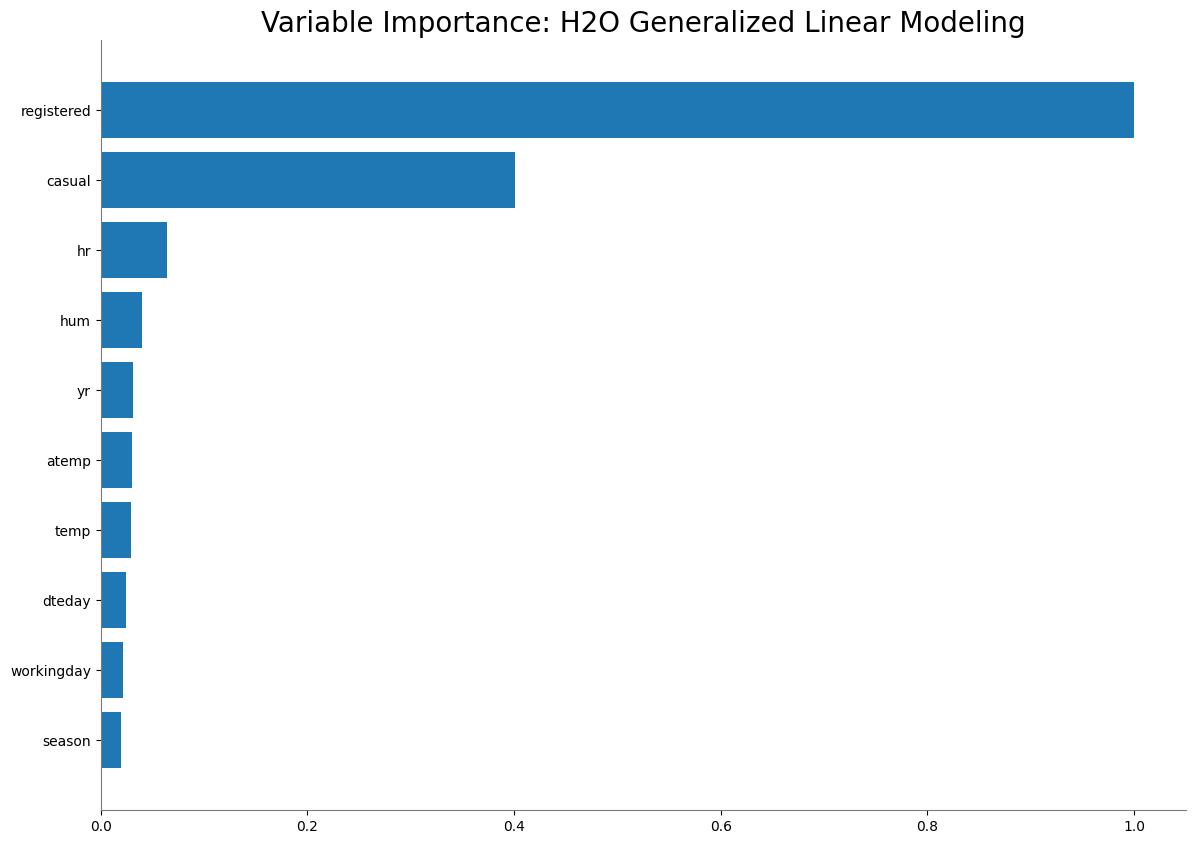

<Figure size 640x480 with 0 Axes>

In [16]:
glm.varimp_plot()

In [17]:
glm_per = glm.model_performance(test)

In [18]:
# Test metrics
print("GLM Test R^2: ", glm_per.r2())
print("GLM Test RMSE: ", glm_per.rmse())
print("GLM Test MAE: ", glm_per.mae())

GLM Test R^2:  0.9801627265491816
GLM Test RMSE:  25.86049849462335
GLM Test MAE:  18.651847146623705


In [19]:
# Test actual cnt and predicted cnt by GLM model comparison
glm_pred = glm.predict(test)
test_cnt_pred = test['cnt'].cbind(glm_pred)
test_cnt_pred

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


cnt    predict
-----  ---------
   36    39.1436
  106   106.589
   28    41.0492
   39    55.6457
    8    11.1764
   20    21.0802
    9    29.5589
    8    28.302
   30    29.267
   88    83.0128
[3419 rows x 2 columns]

**2. H2OAutoML model on Hourly Data**

In [20]:
# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60,
                seed = 42)
%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 1.39 s, sys: 116 ms, total: 1.51 s
Wall time: 1min 1s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240827_54505


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  4/8
# GBM base models (used / total)      1/4
# XGBoost base models (used / total)  1/2
# GLM base models (used / total)      1/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4.161086611065754
RMSE: 2.0398741654979
MAE: 1.6032845068364745
RMSLE: NaN
Mean Residual Deviance: 4.161086611065754
R^2: 0.9998709697163144
Null degrees of freedom: 10017
Residual degrees of freedom: 10013
Null deviance: 323074718.69046116
Residual deviance: 41685.76566965672
AIC: 42725.278871177376

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 6.433603429019585
RMSE: 2.536454893945403
MAE: 1.9804832166126949
RMSLE: NaN
Mean Residual Deviance: 6.433603429019585
R^2: 0.9998032564394039
Null degrees of freedom: 13959
Residual degrees of freedom: 13956
Null deviance: 456526680.18677366
Residual deviance: 89813.1038691134
AIC: 65613.78951752467

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     13130        307.66       13235.4       13123.3       13375.8       13309.7       12605.8
loglikelihood           0            0            0             0             0             0             0
mae                     1.98056      0.025419     1.95674       1.96485       1.97557       2.02225       1.98337
mean_residual_deviance  6.43379      0.169249     6.3198        6.29917       6.40331       6.72097       6.42569
mse                     6.43379      0.169249     6.3198        6.29917       6.40331       6.72097       6.42569
null_deviance           9.13053e+07  1.37165e+06  9.1251e+07    8.94572e+07   9.13675e+07   9.11278e+07   9.33232e+07
r2                      0.999803     8.00115e-06  0.999804      0.999803      0.9998        0.999793      0.999815
residual_deviance       17962.6      611.881      17853.4       17656.6       18230.2       18845.6       17227.3
rmse                    2.53632      0.0331461    2.51392       2.50982       2.53048       2.59248       2.53489
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse          mse        mae       rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ---------  -----------  ---------  ----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_2_AutoML_1_20240827_54505    2.0929       4.38021    1.63058  nan                          4.38021                 701                   0.035198  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240827_54505       2.0929       4.38021    1.63058  nan                          4.38021                 878                   0.02478   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240827_54505    2.1033       4.42385    1.63721  nan                          4.42385                 768                   0.034548  StackedEnsemble
GLM_1_AutoML_1_20240827_54505                             3.27695     10.7384     2.34951    0.123061                  10.7384                  381                   0.001245  GLM
GBM_1_AutoML_1_20240827_54505                             6.95975     48.4381     3.53913    0.115654                  48.4381                 2538                   0.023951  GBM
XGBoost_1_AutoML_1_20240827_54505                        13.8801     192.658      8.42879    0.052214                 192.658                  2875                   0.002629  XGBoost
DRF_1_AutoML_1_20240827_54505                            17.6718     312.293      9.59599    0.154377                 312.293                   351                   0.001925  DRF
GBM_2_AutoML_1_20240827_54505                            89.2099    7958.41      69.4085     1.18001                 7958.41                    255                   0.00437   GBM
GBM_3_AutoML_1_20240827_54505                           110.061    12113.5       85.779      1.28367                12113.5                     213                   0.002769  GBM
GBM_4_AutoML_1_20240827_54505                           133.943    17940.7      104.605      1.39171                17940.7                     210                   0.002899  GBM
XGBoost_2_AutoML_1_20240827_54505                       185.841    34537        132.669      1.12522                34537                       603                   0.001508  XGBoost
XGBoost_3_AutoML_1_20240827_54505                       186.771    34883.3      132.802      1.14127                34883.3                     295                   0.001319  XGBoost
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

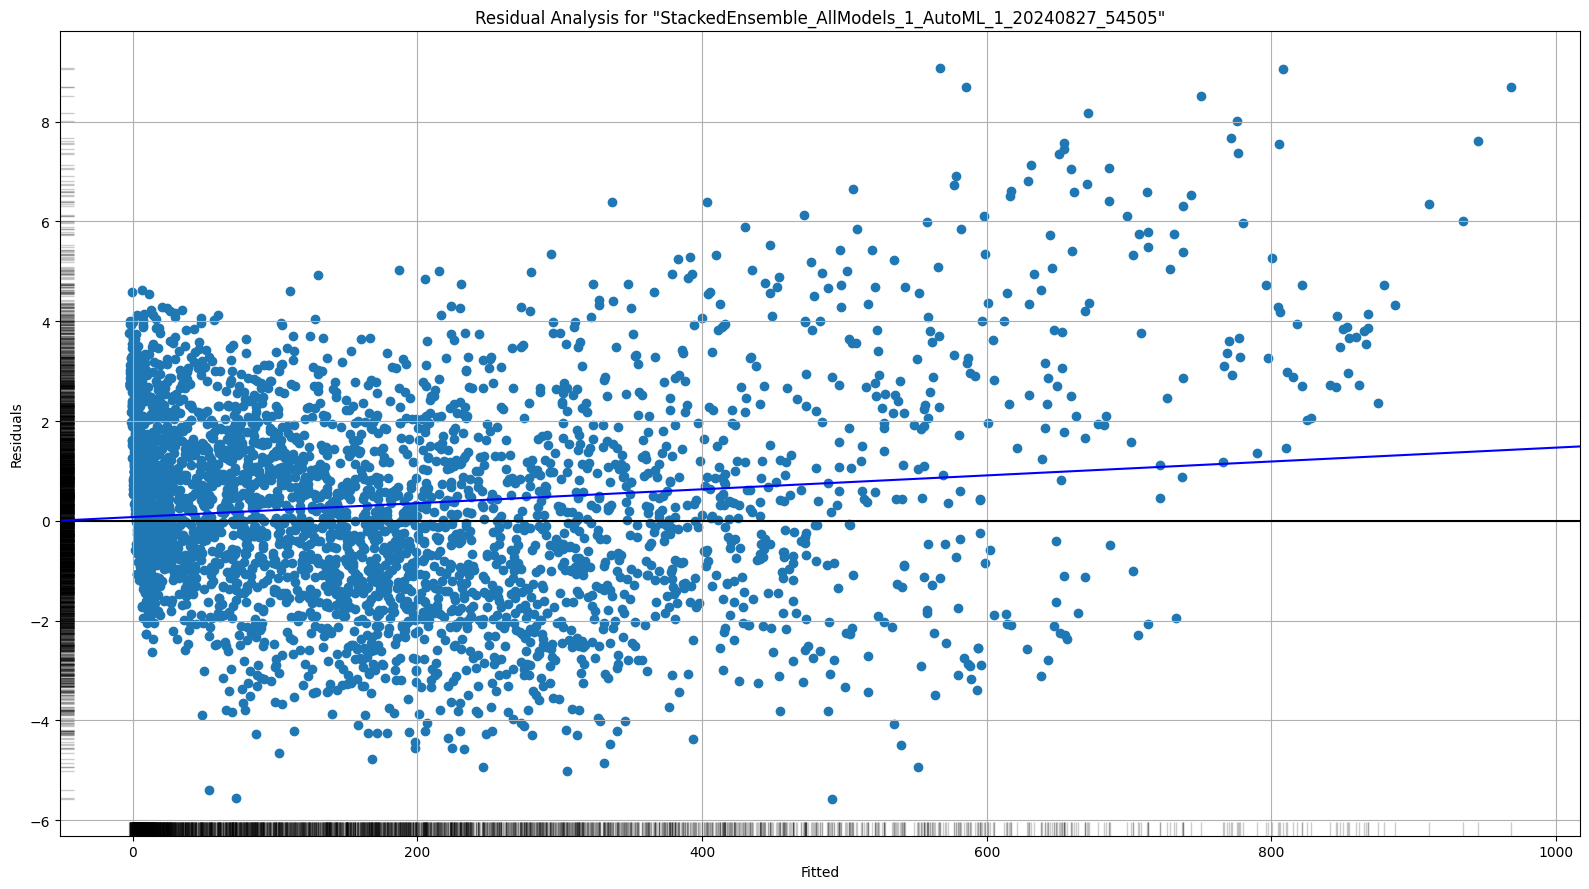

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

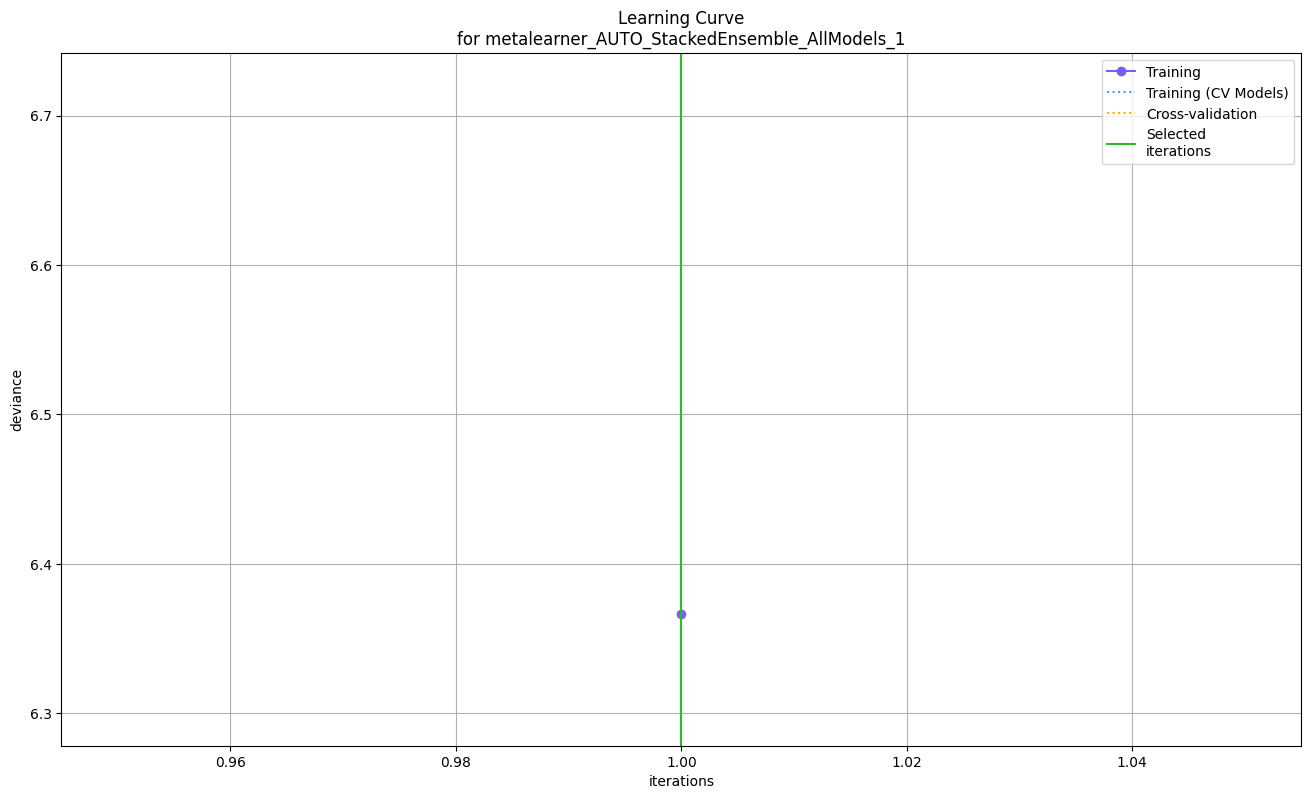

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

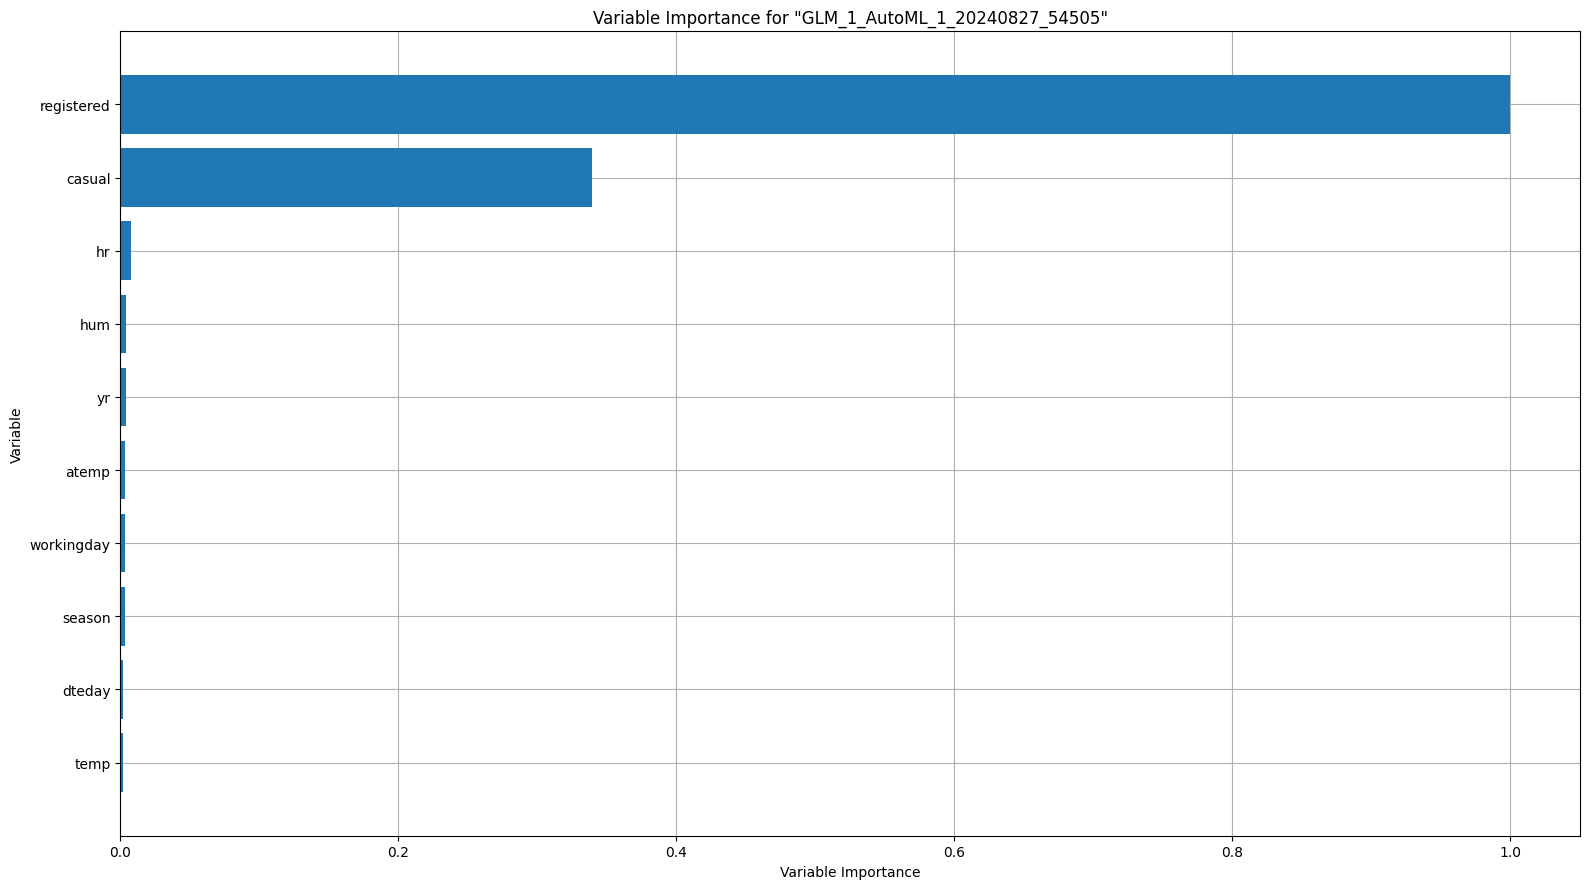

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

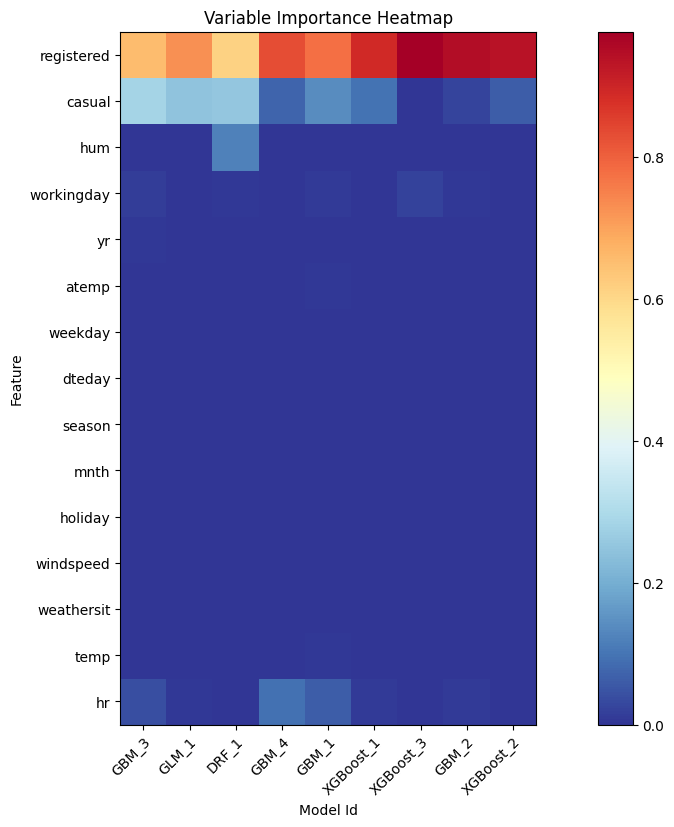

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

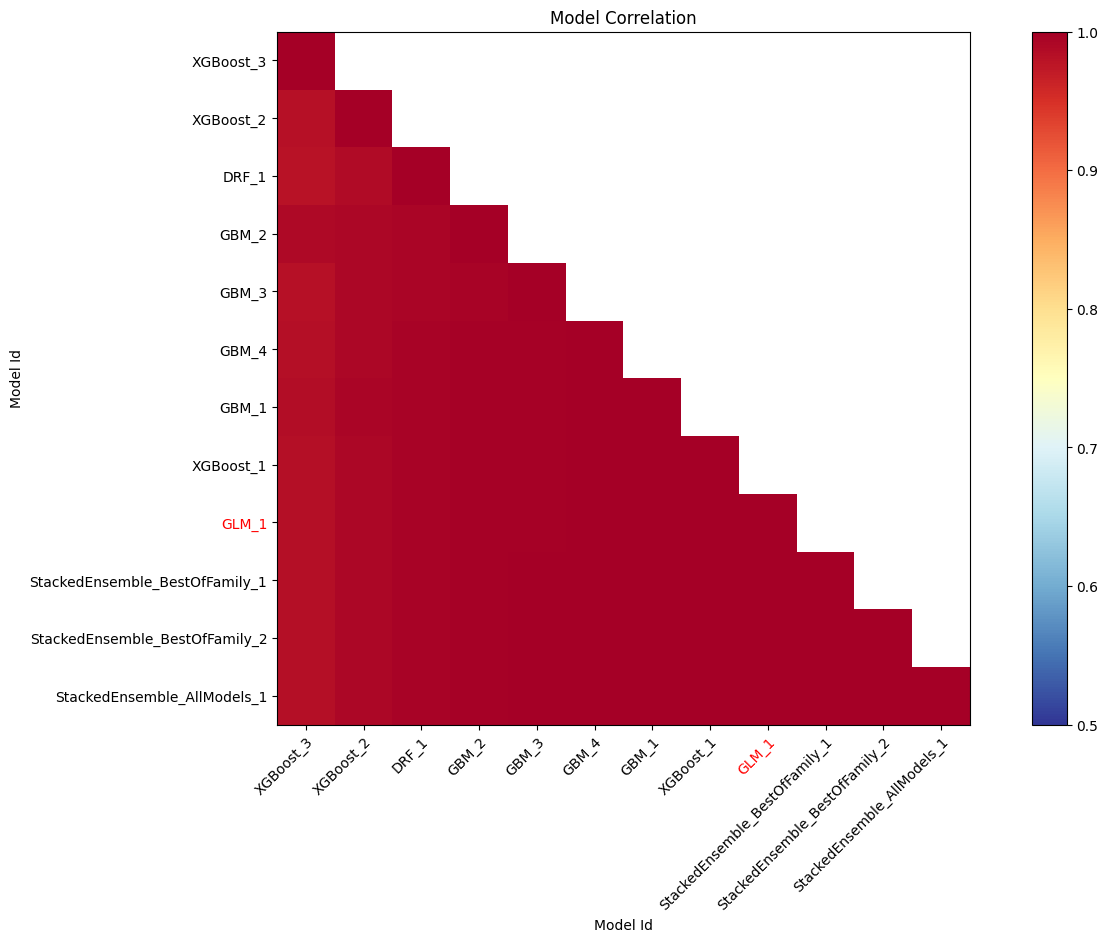

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

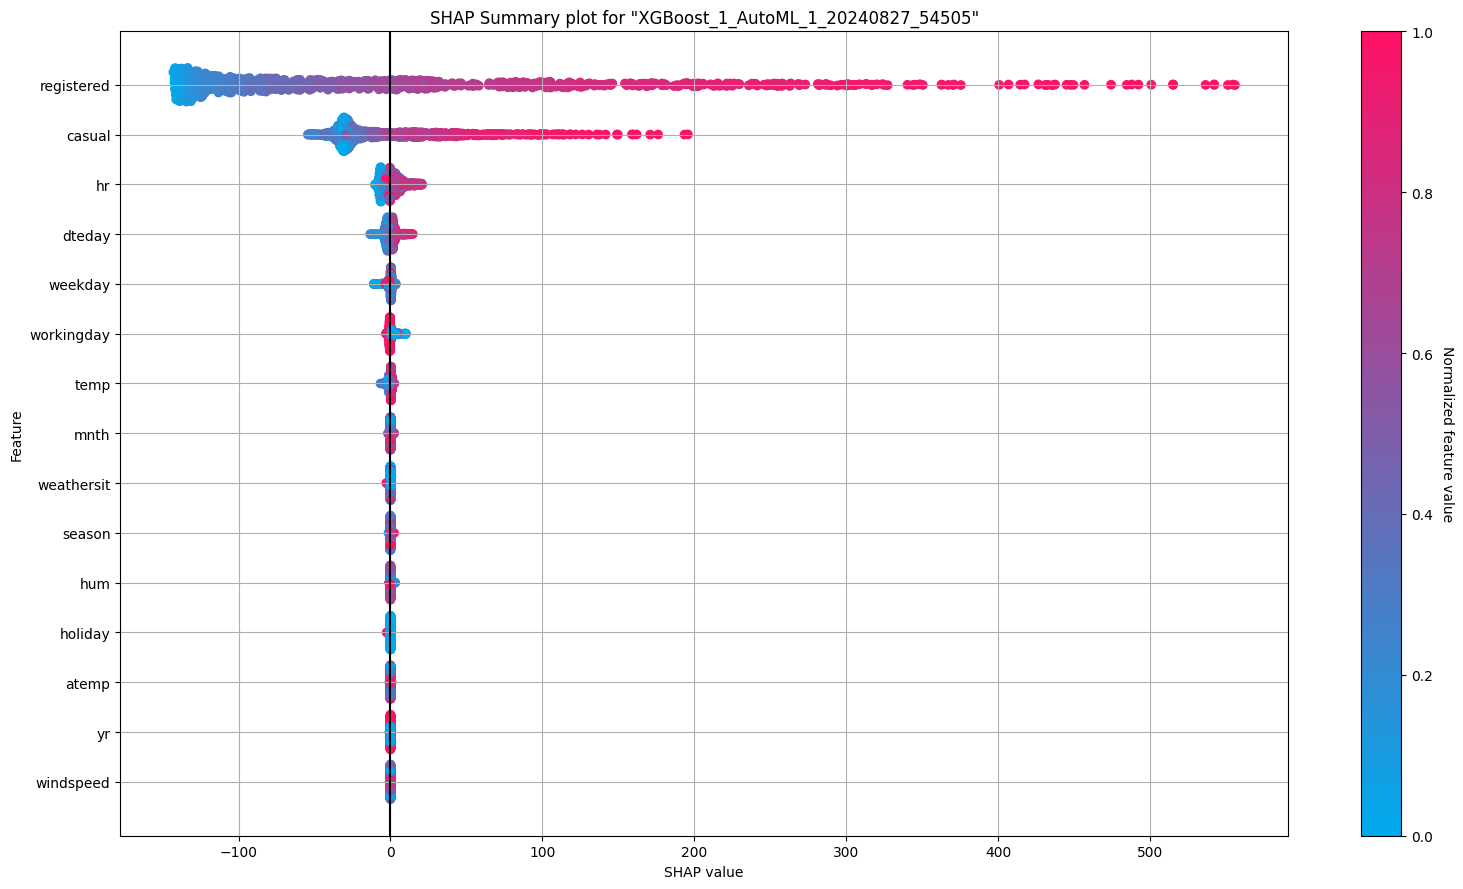

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

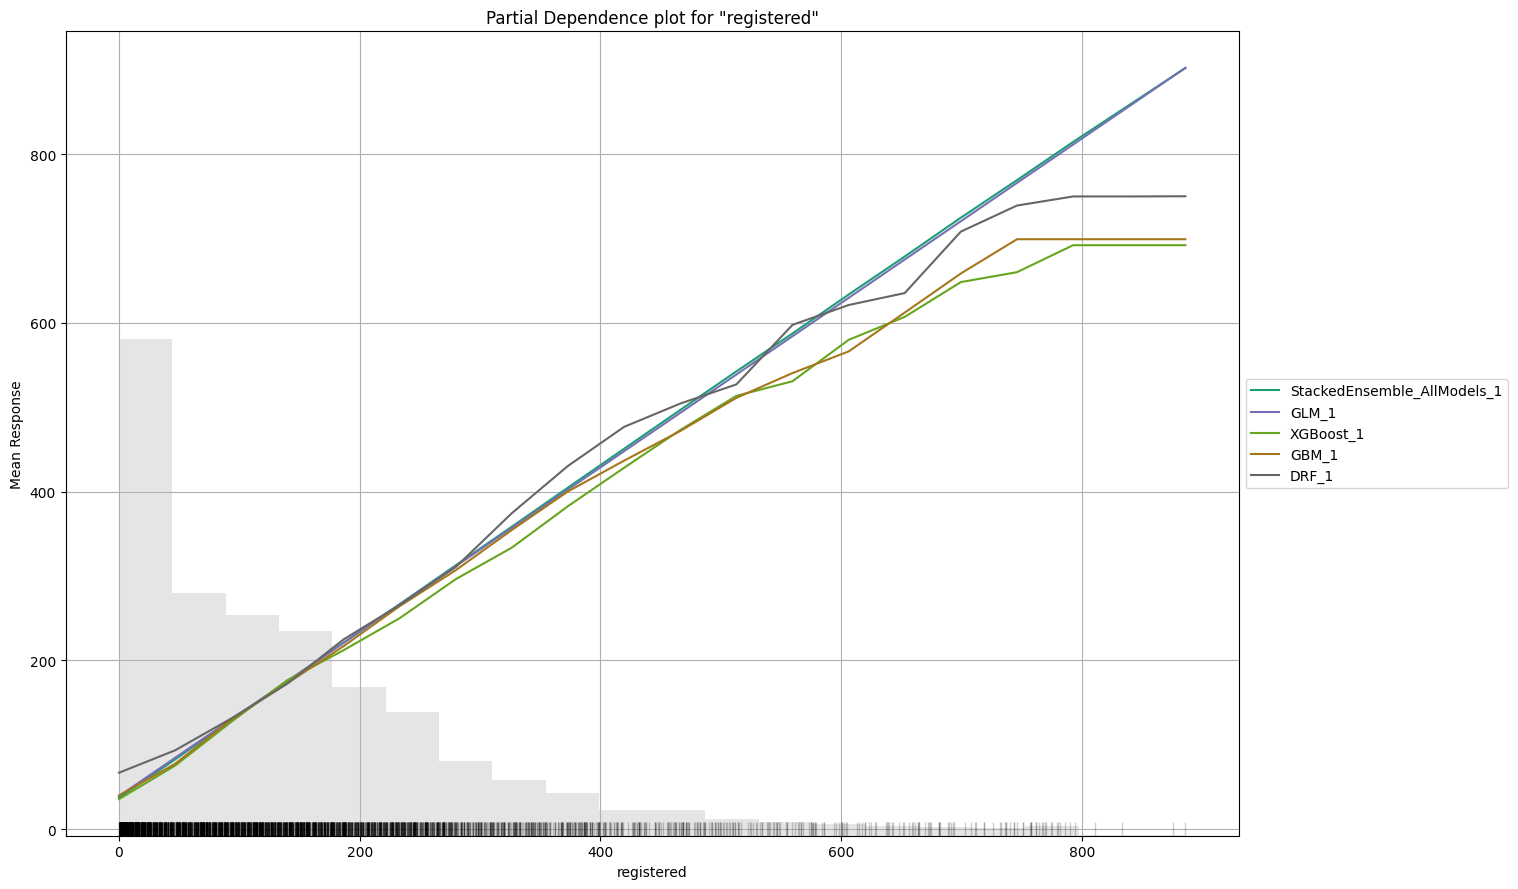

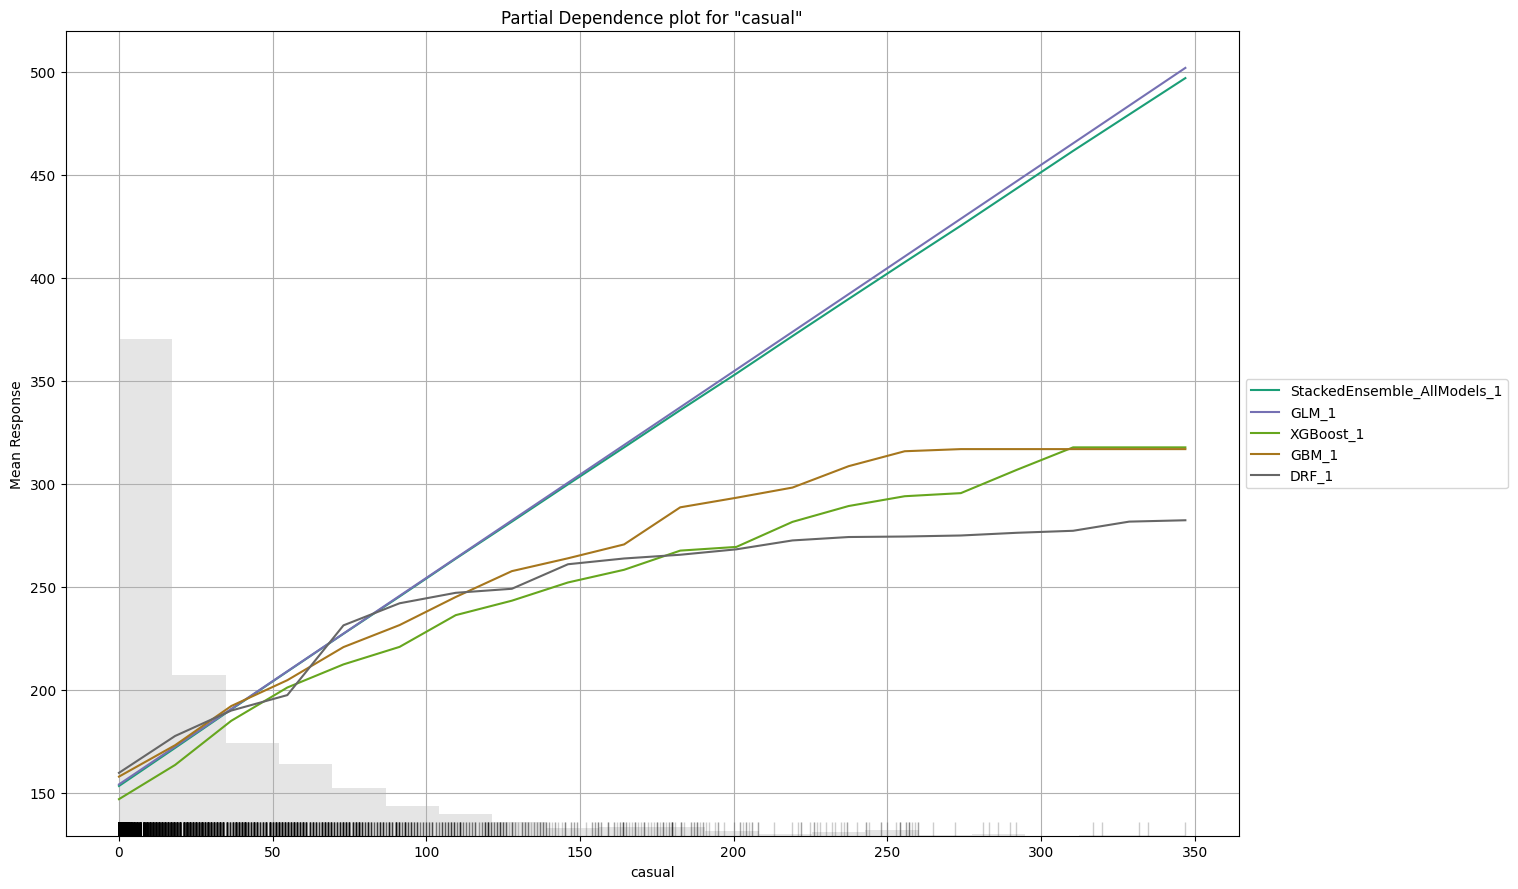

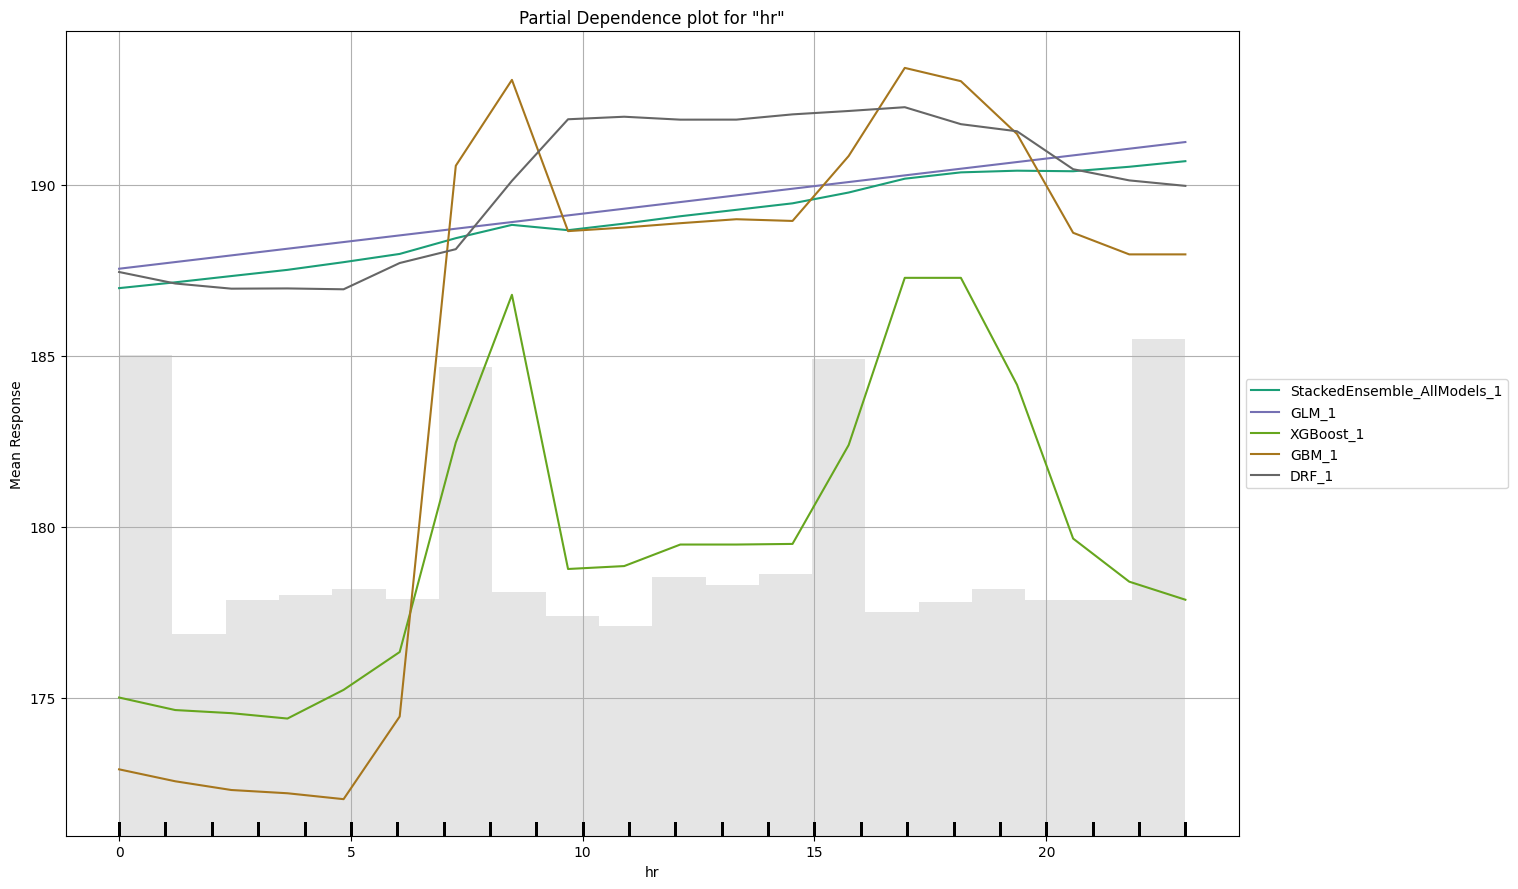

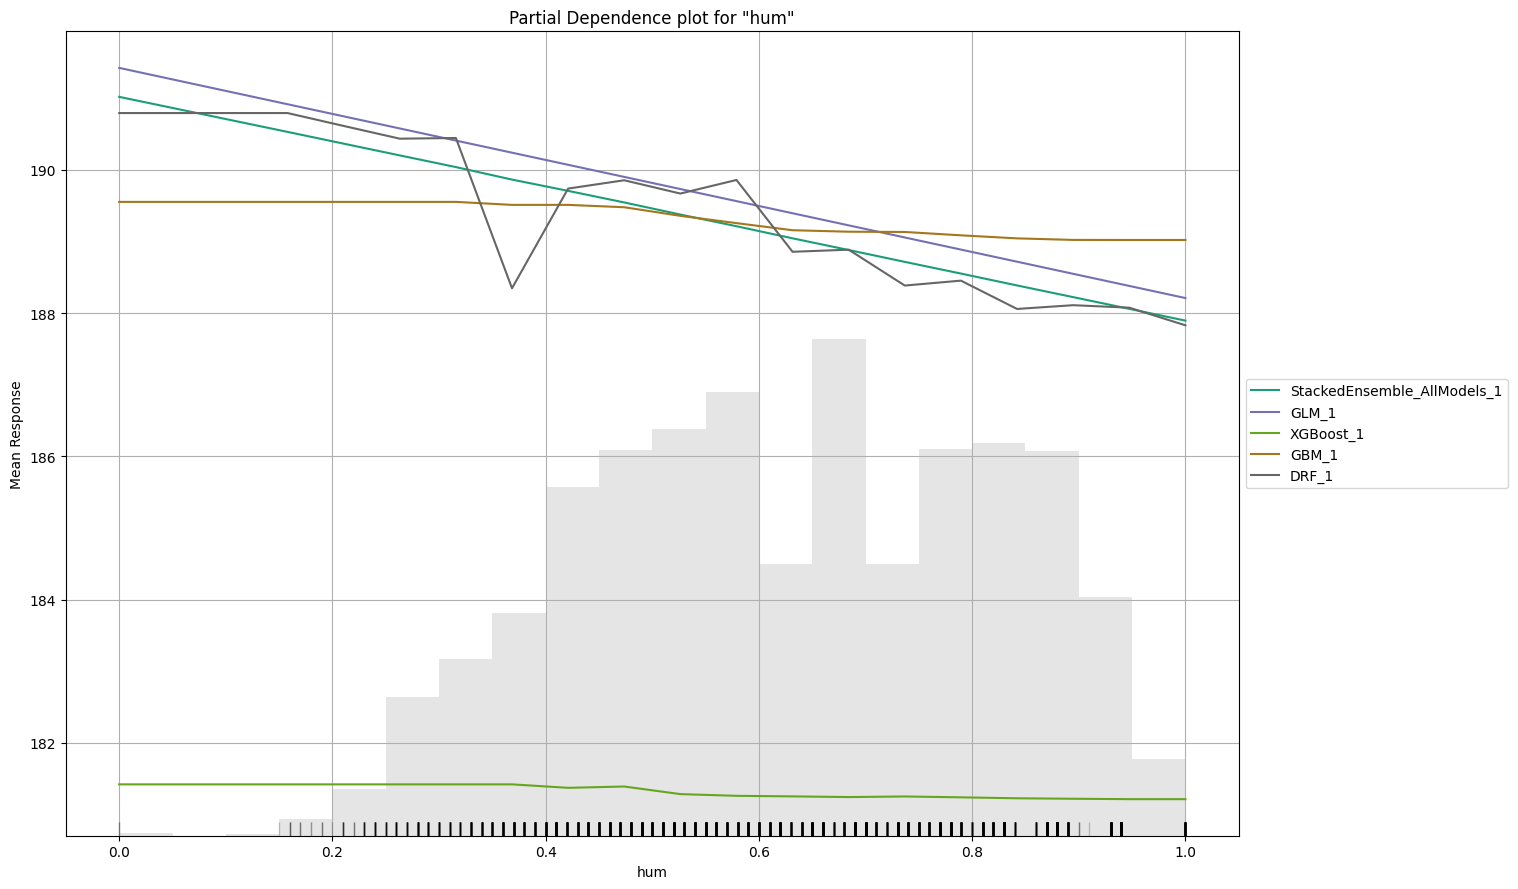

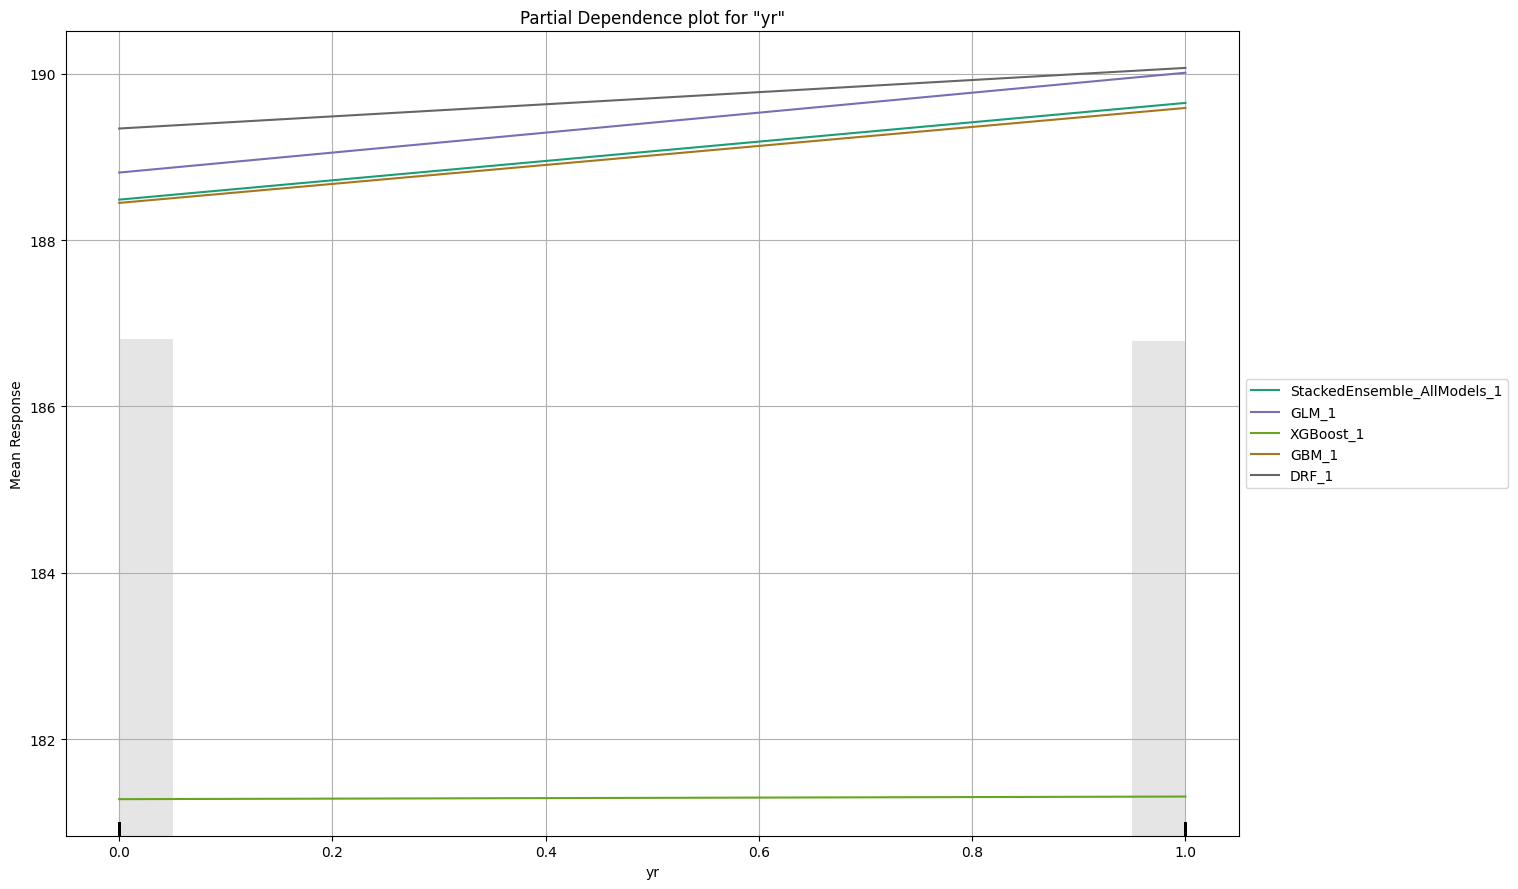

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

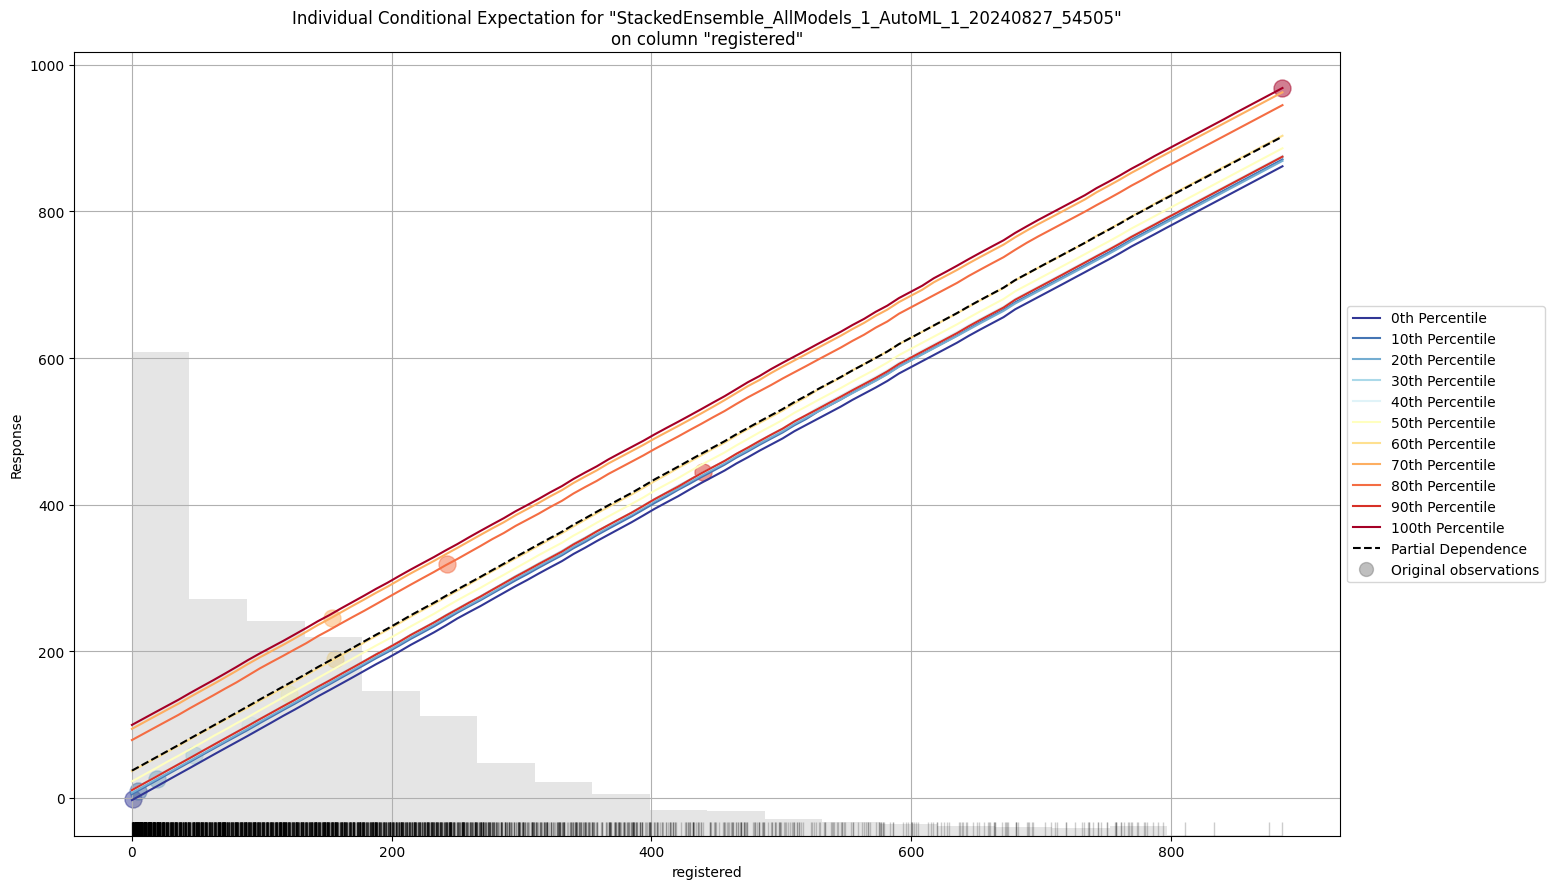

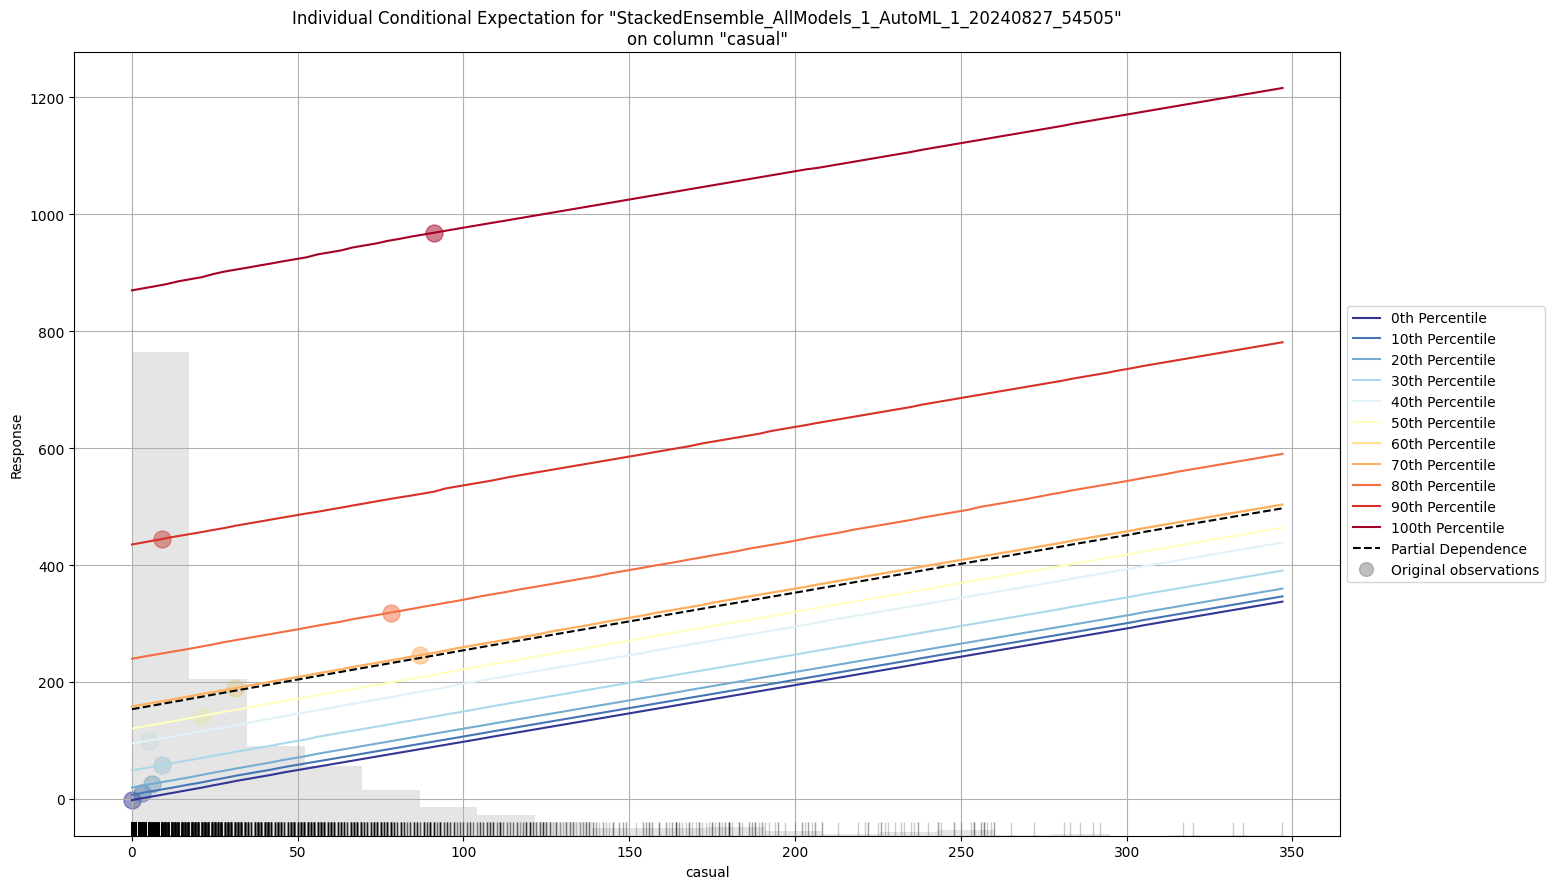

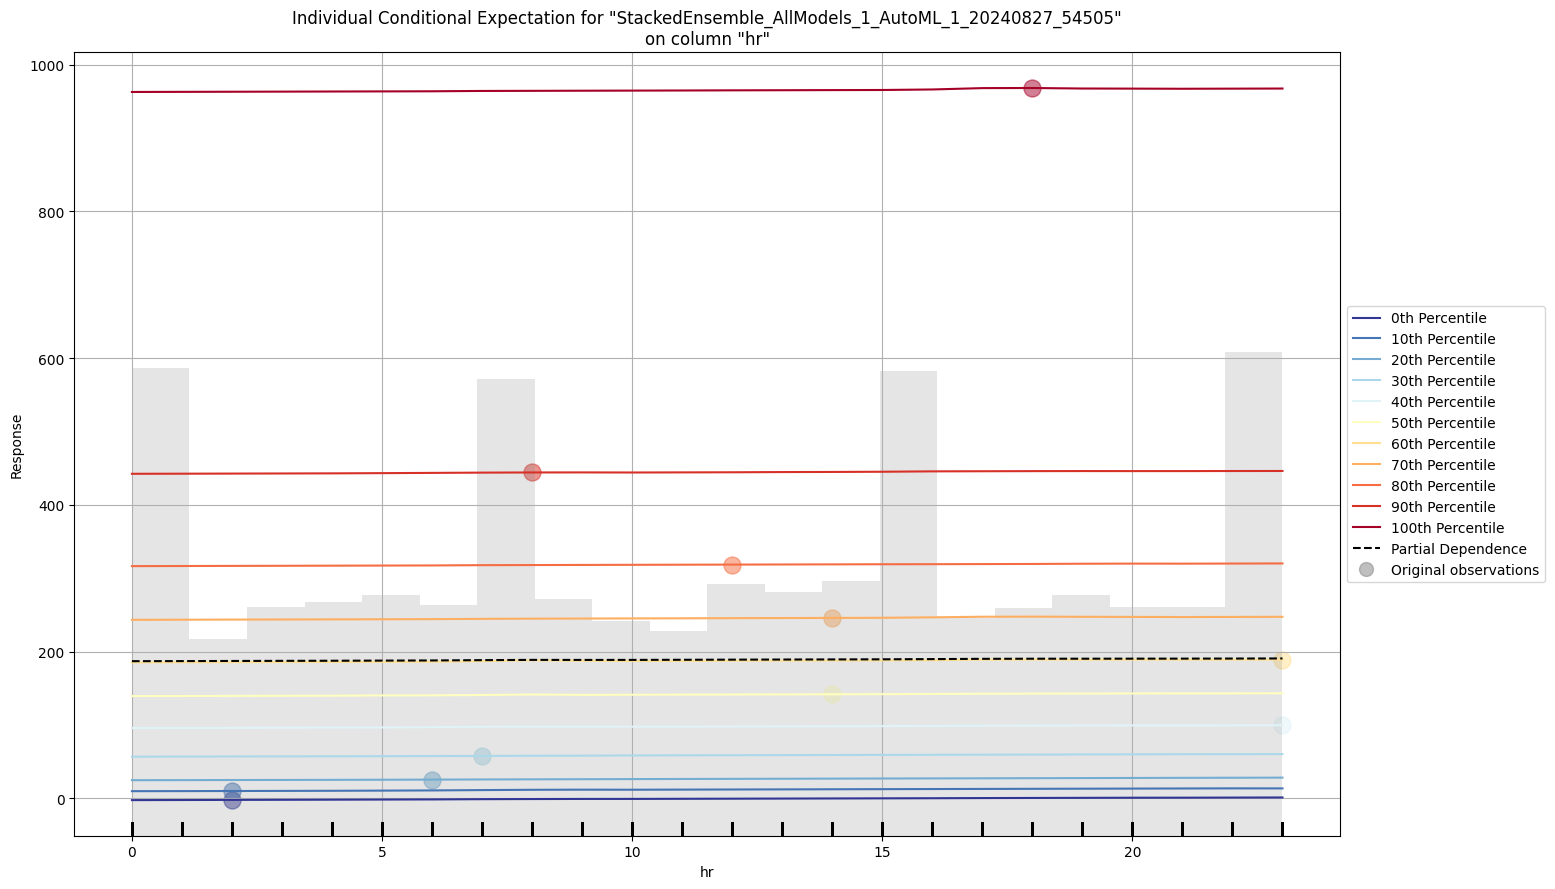

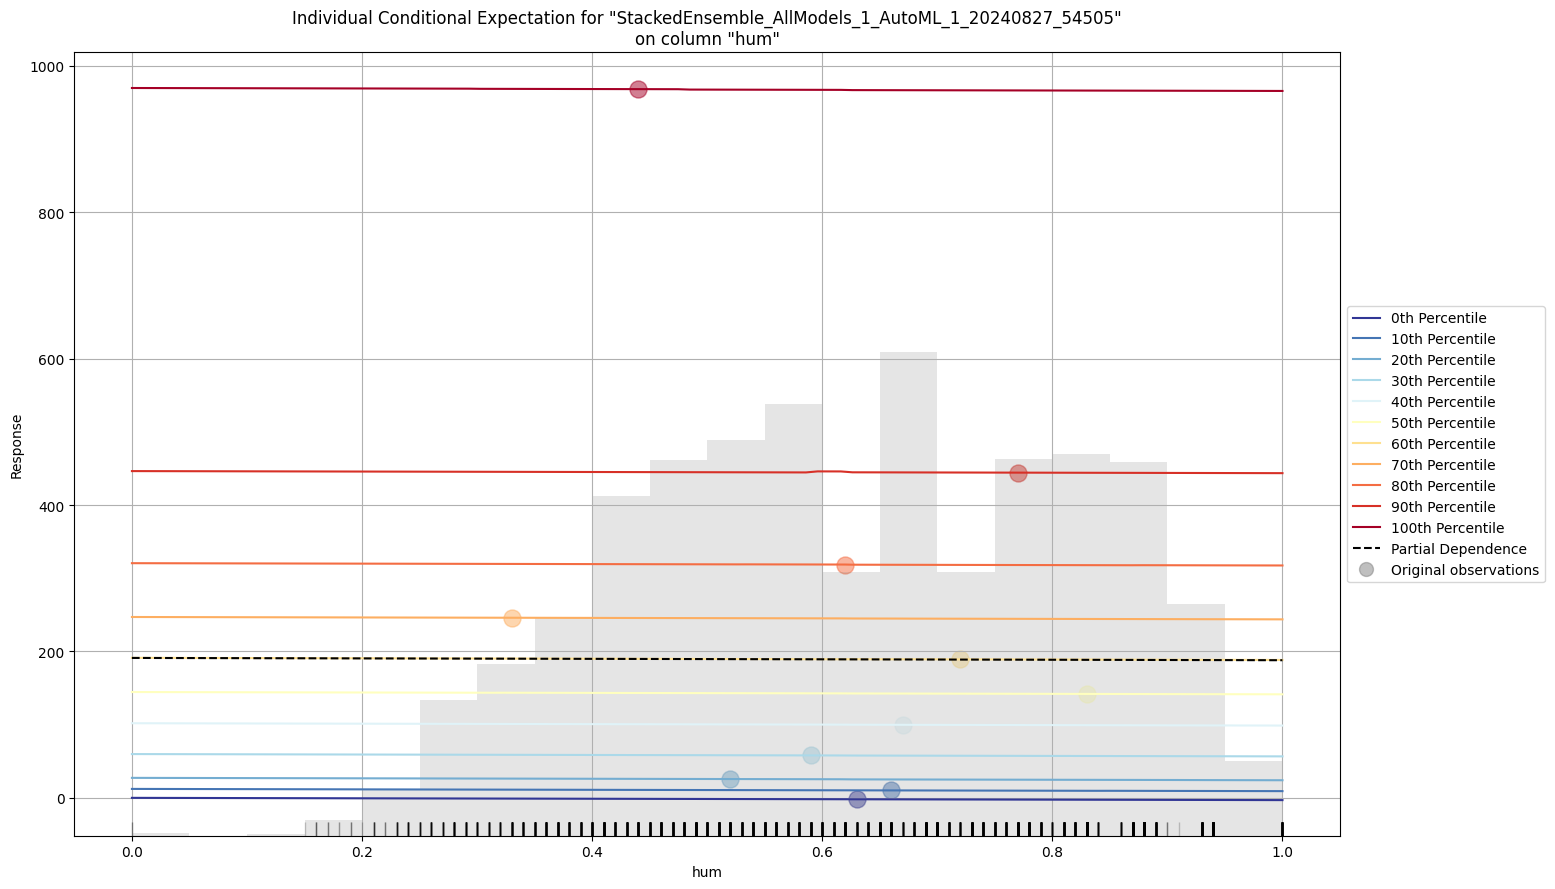

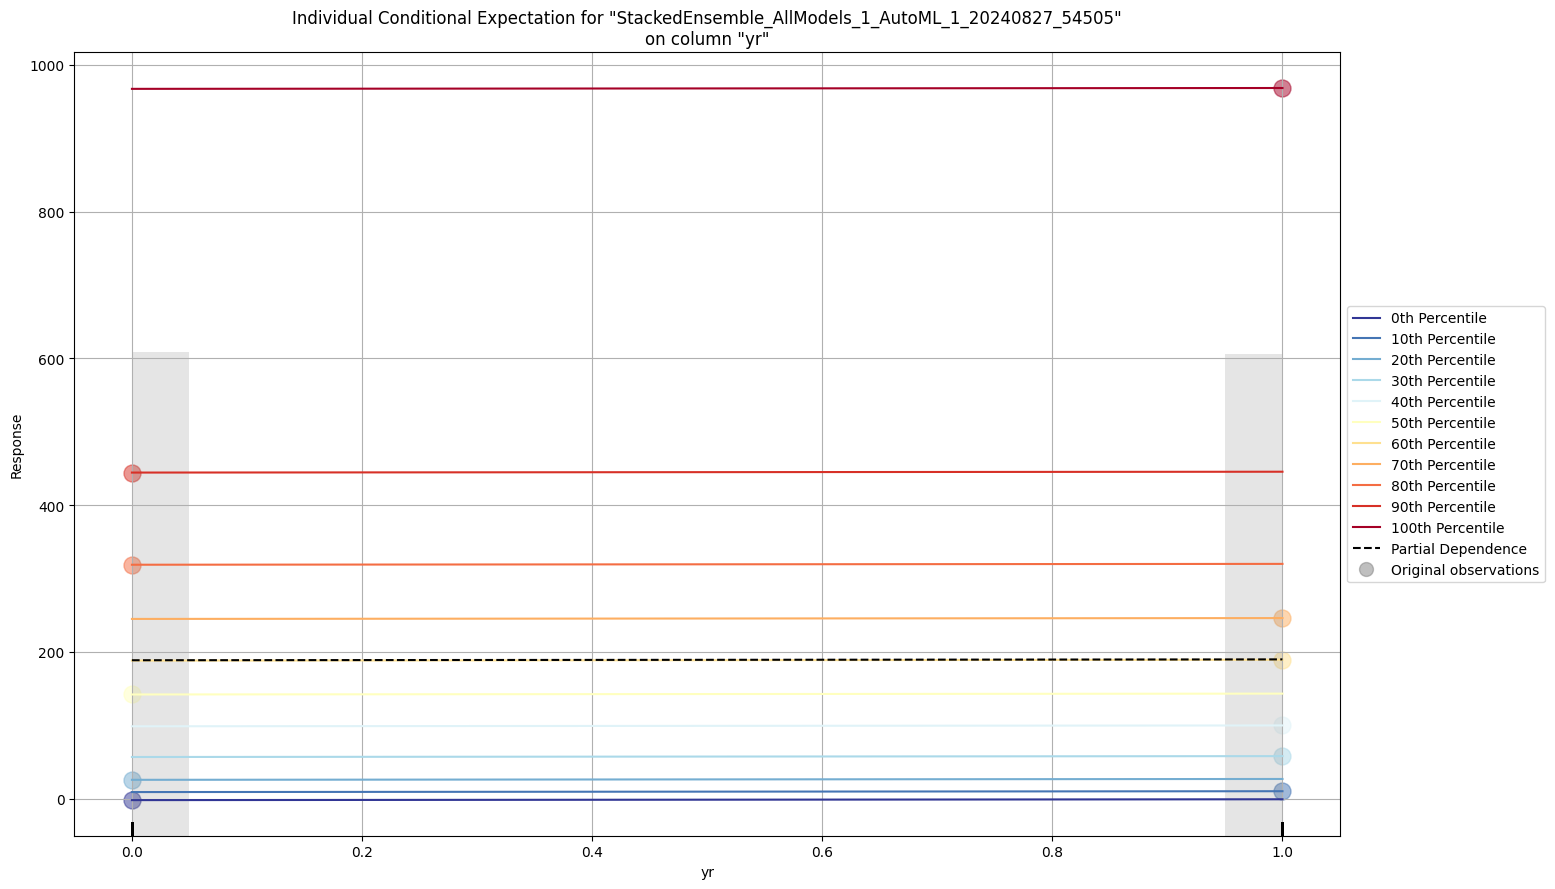

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

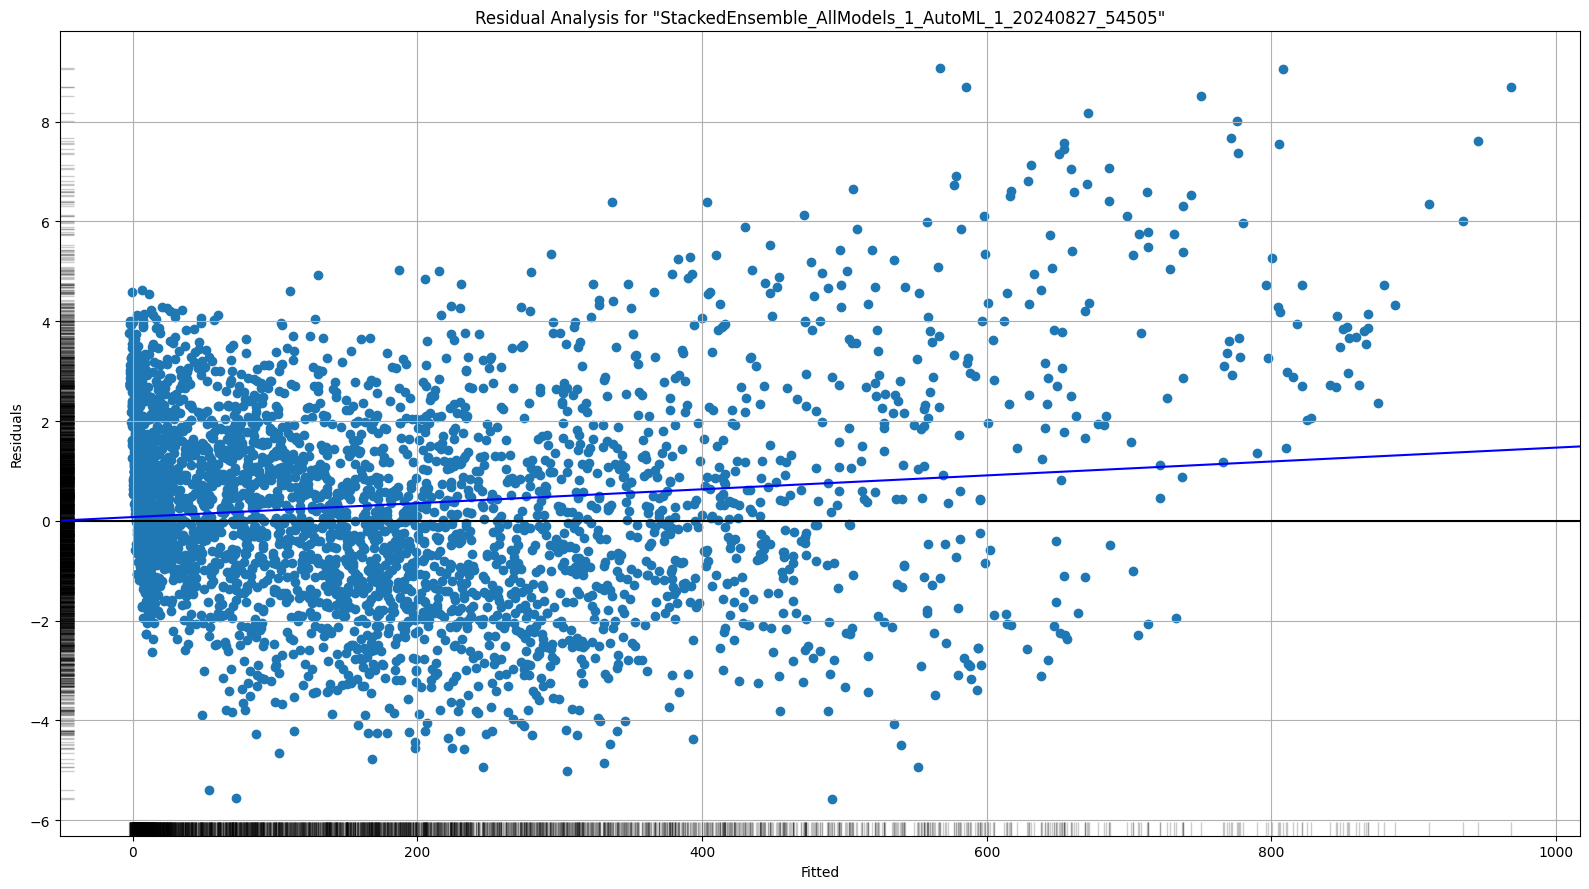

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

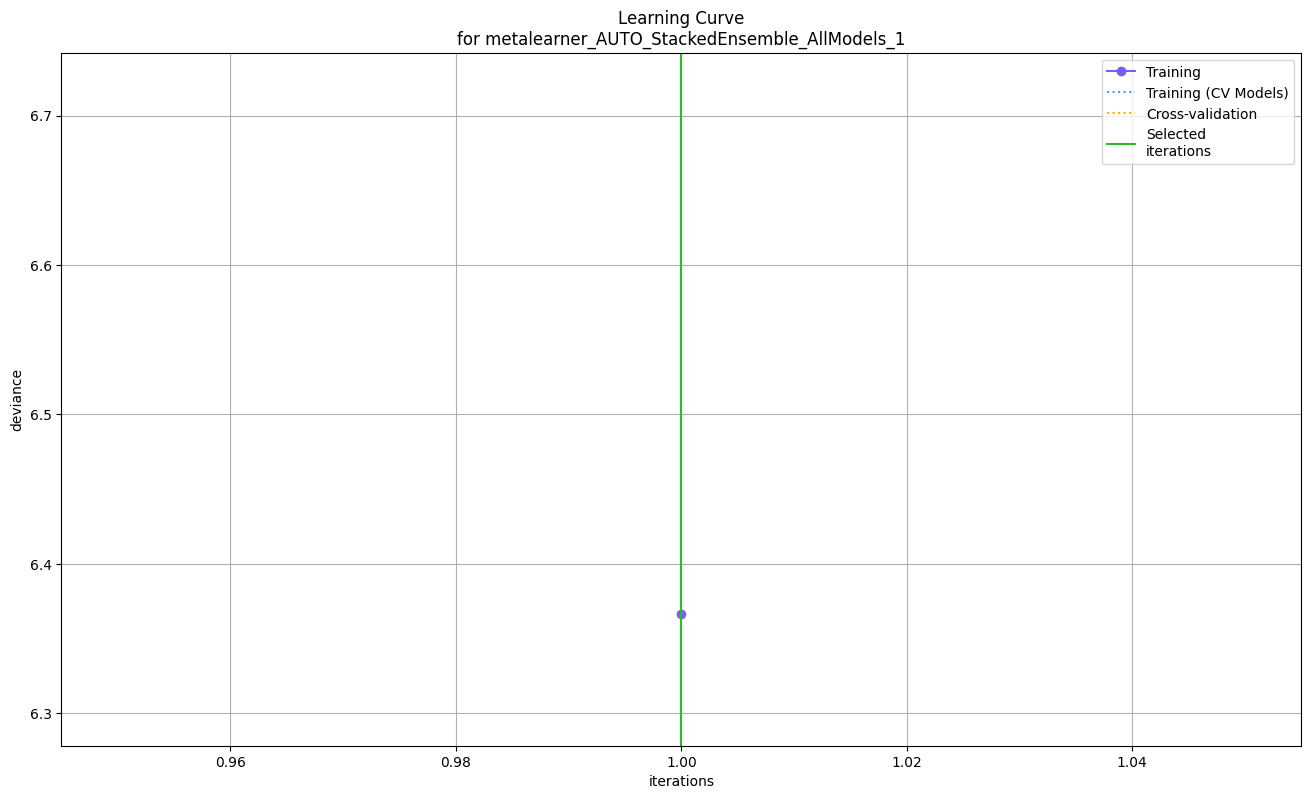

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

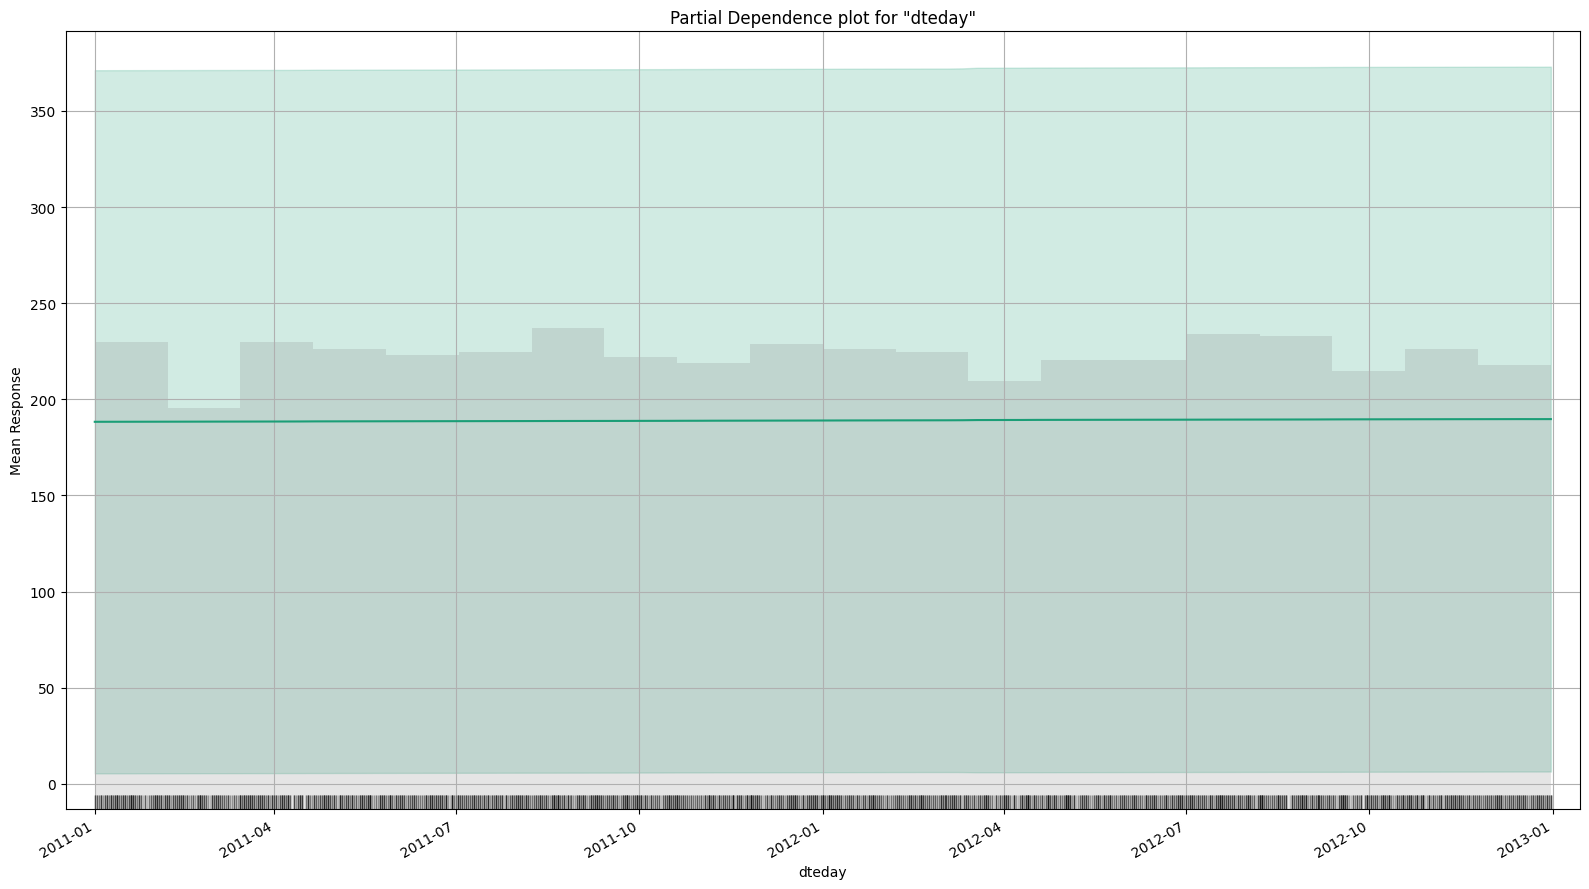

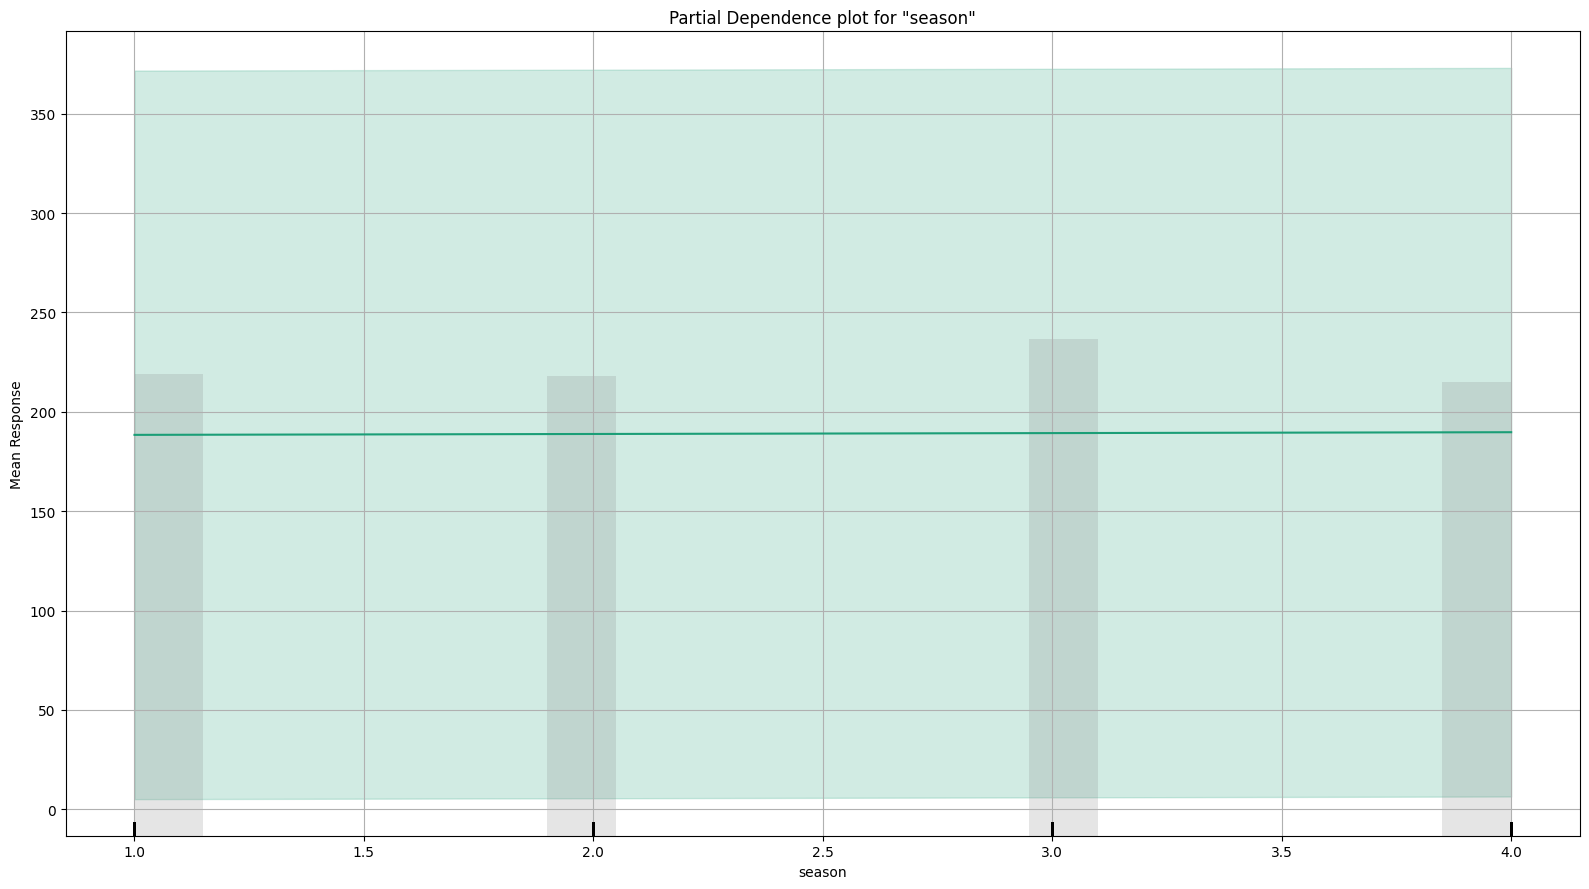

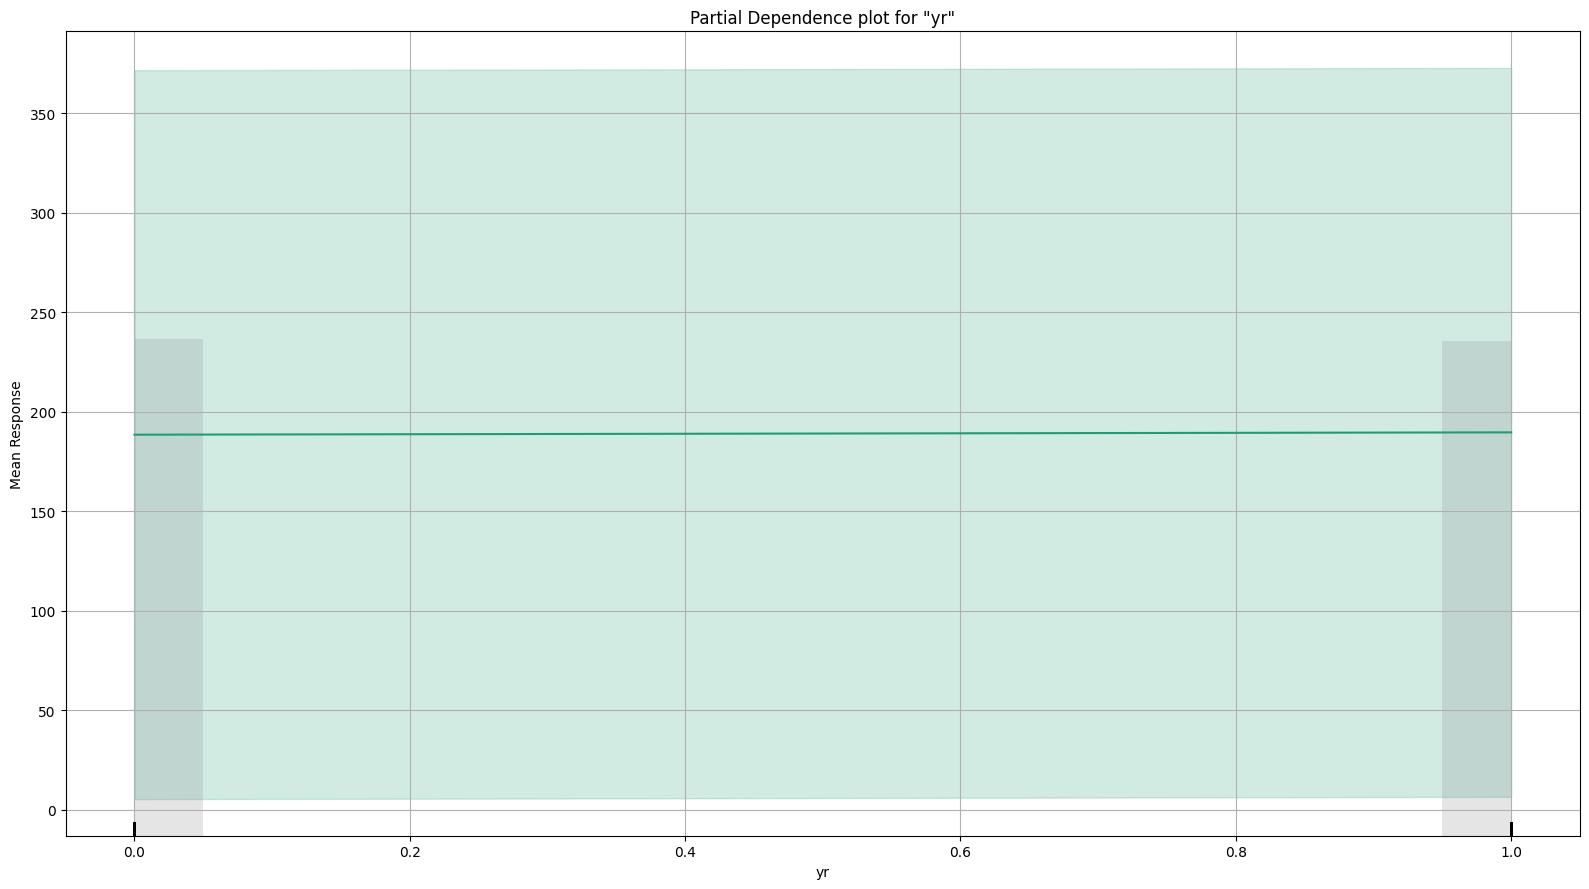

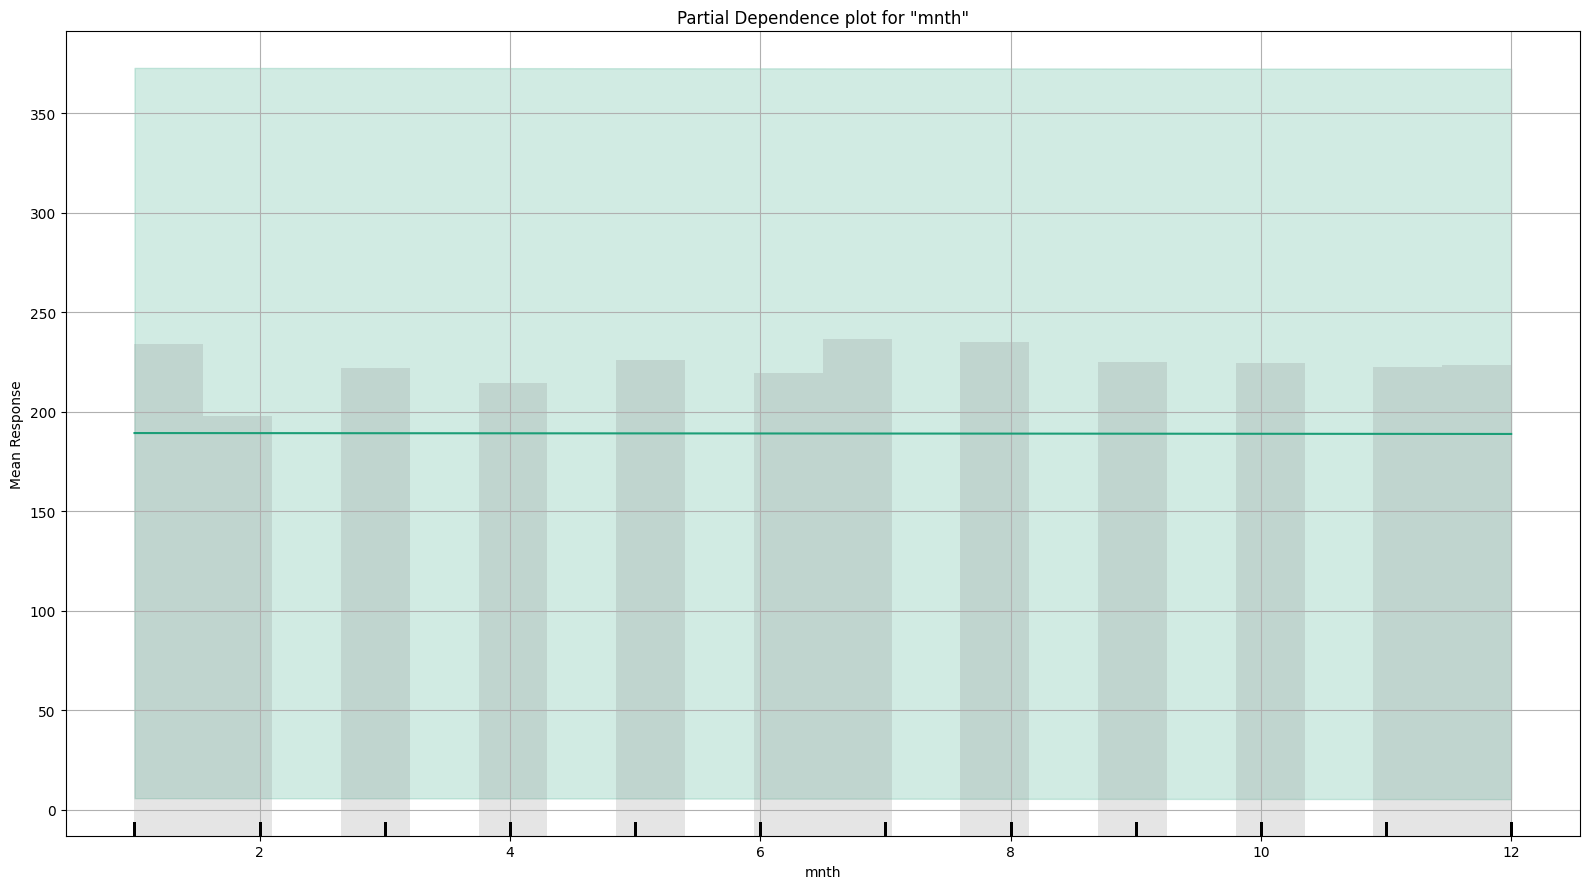

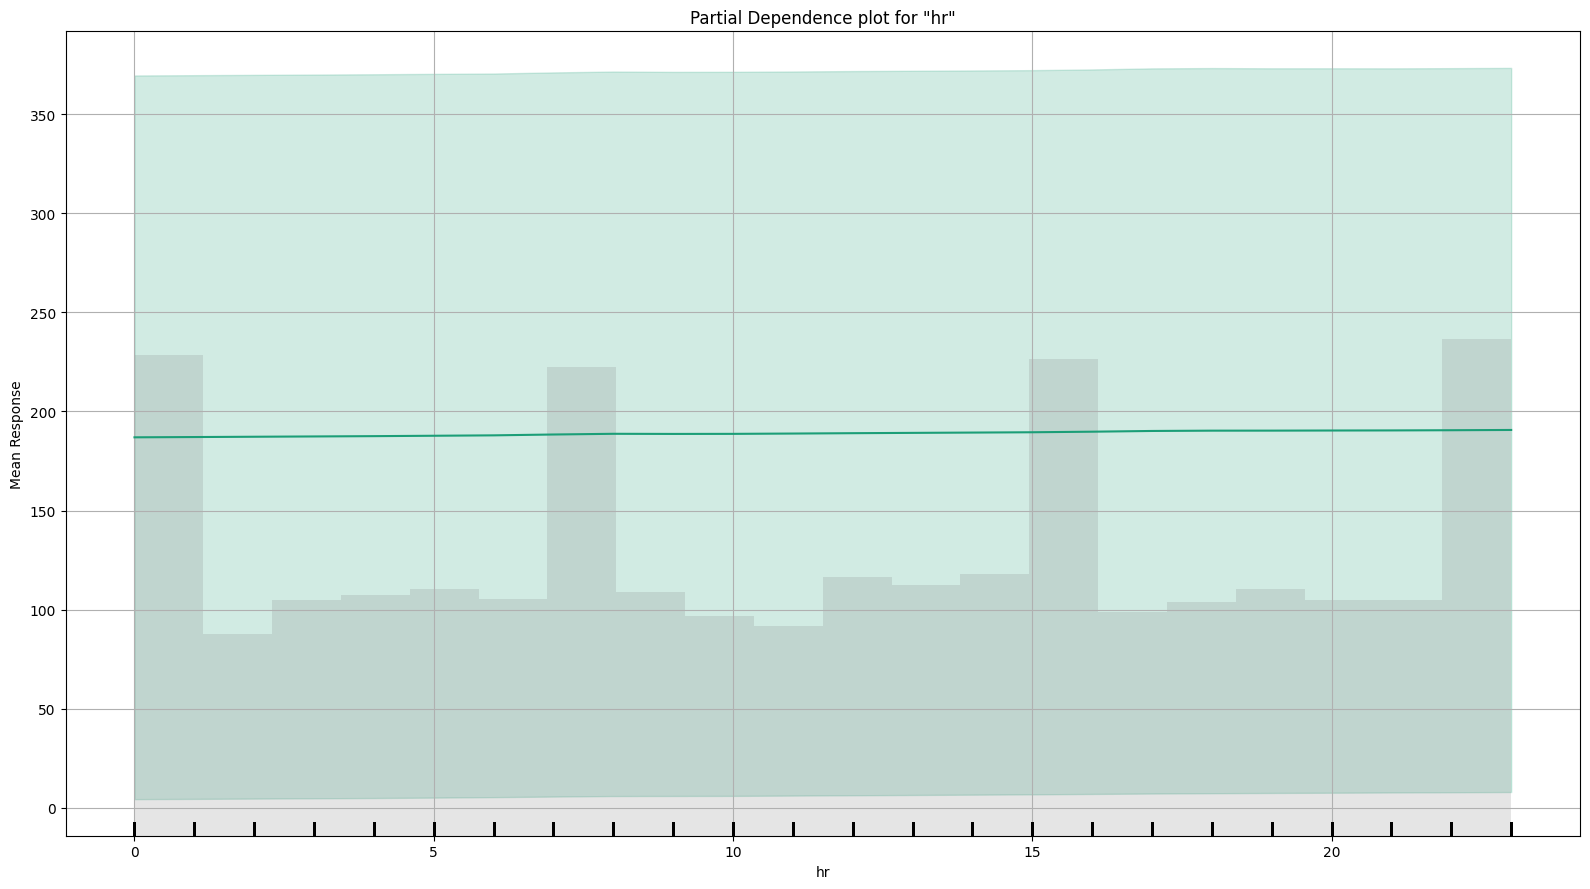

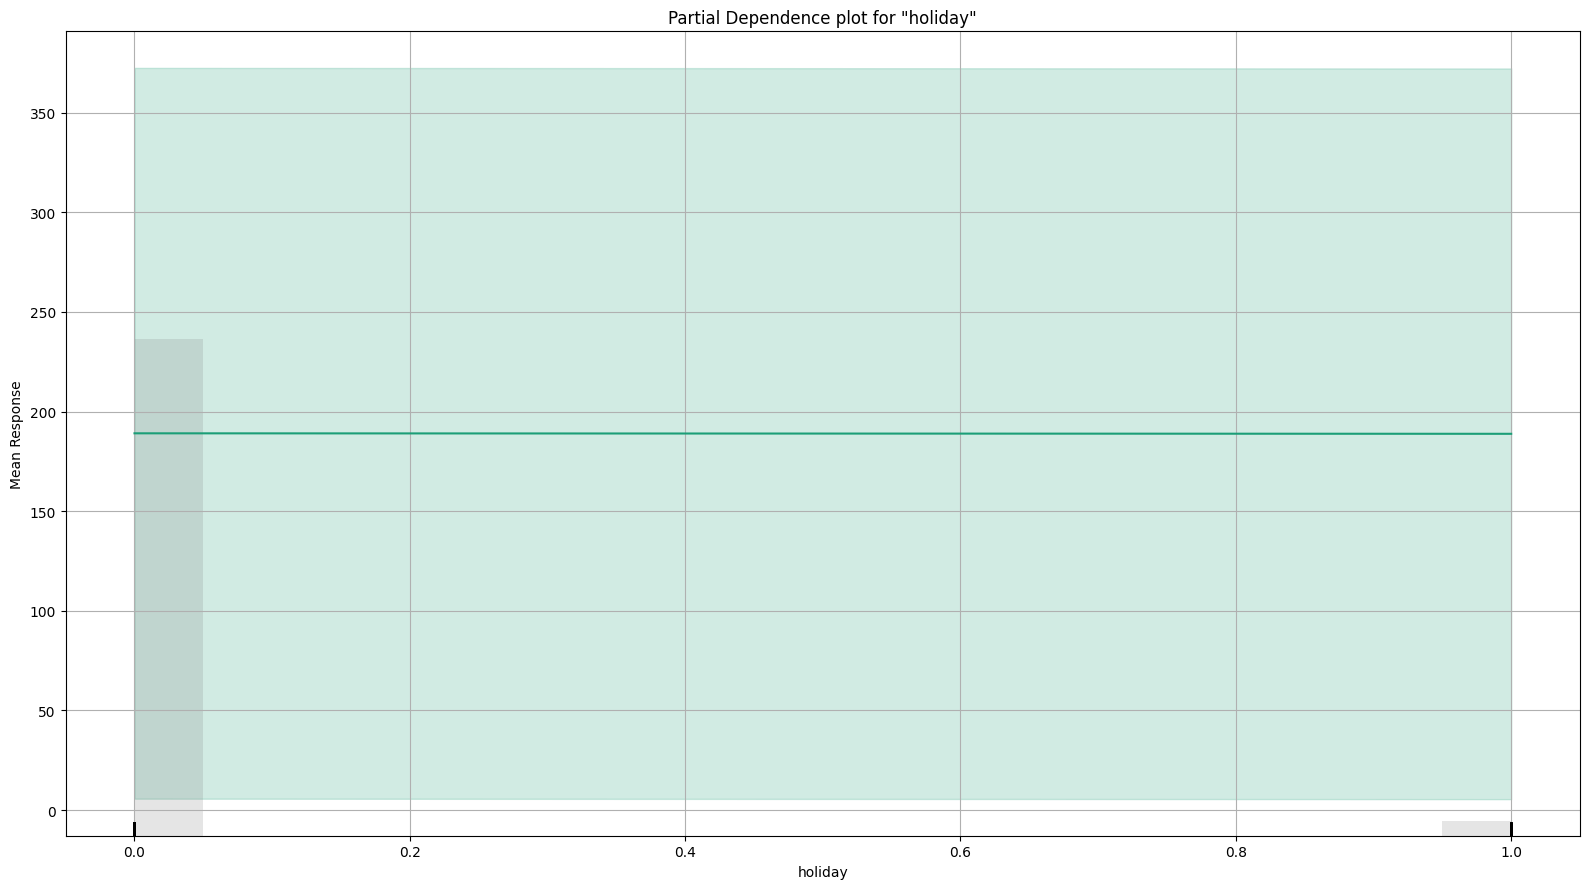

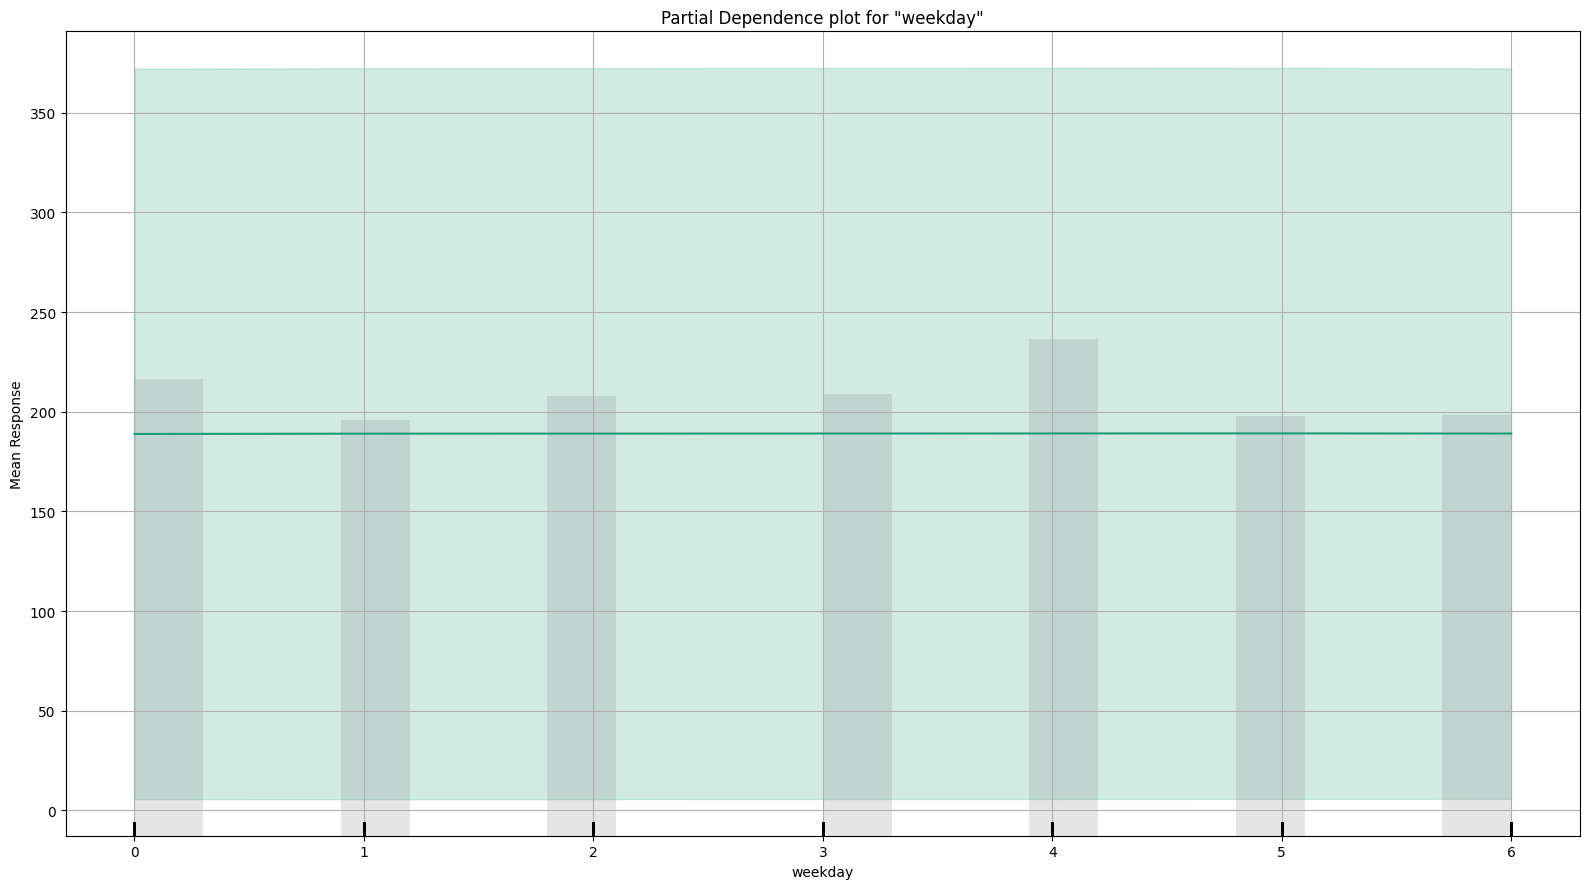

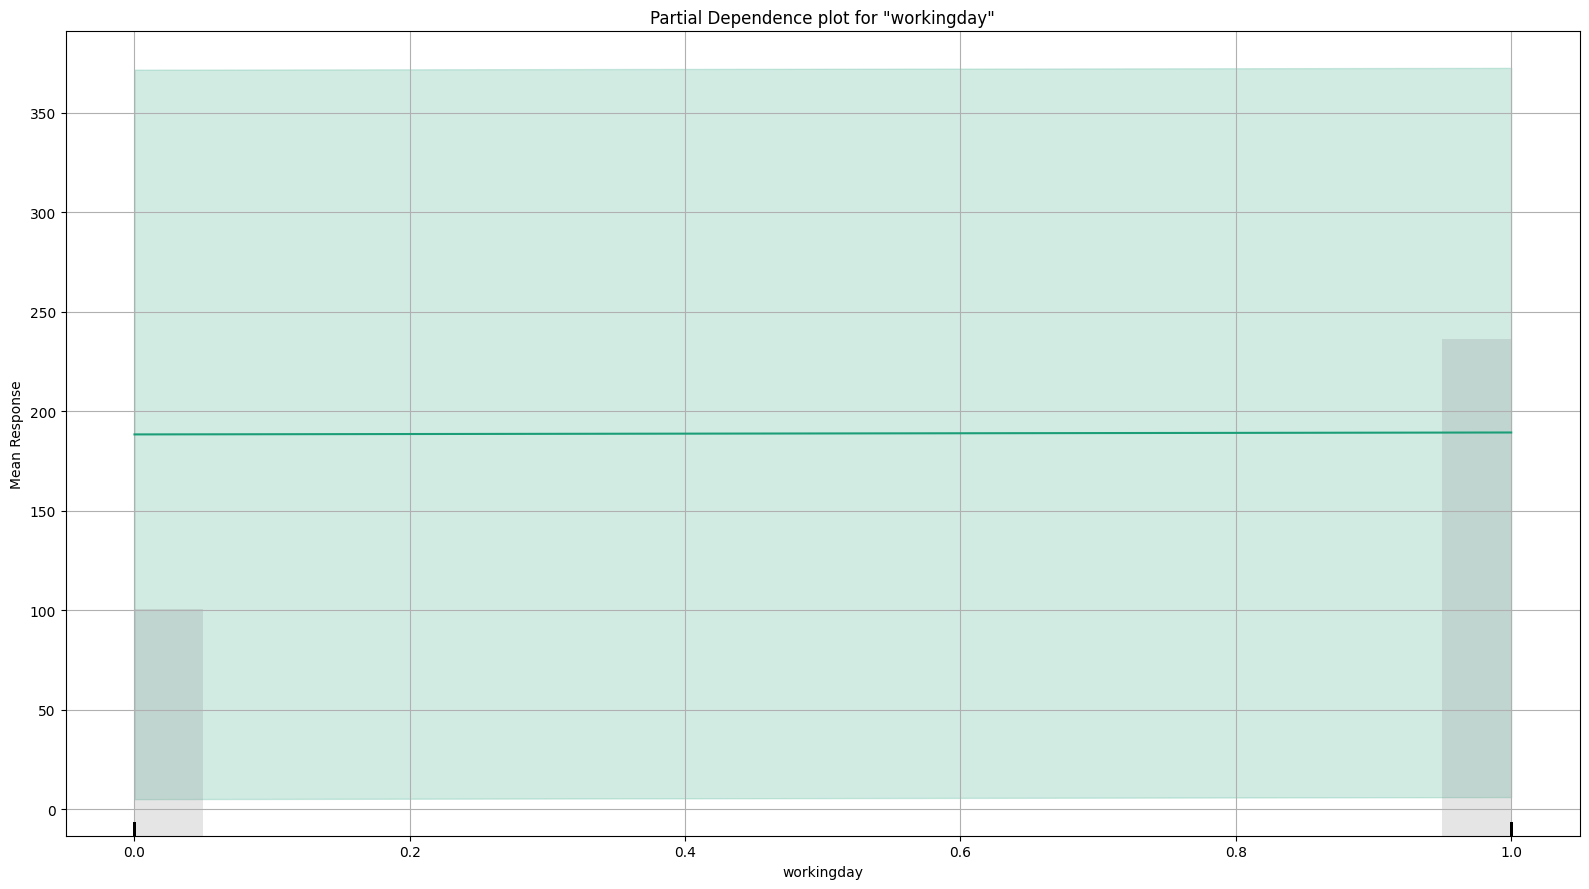

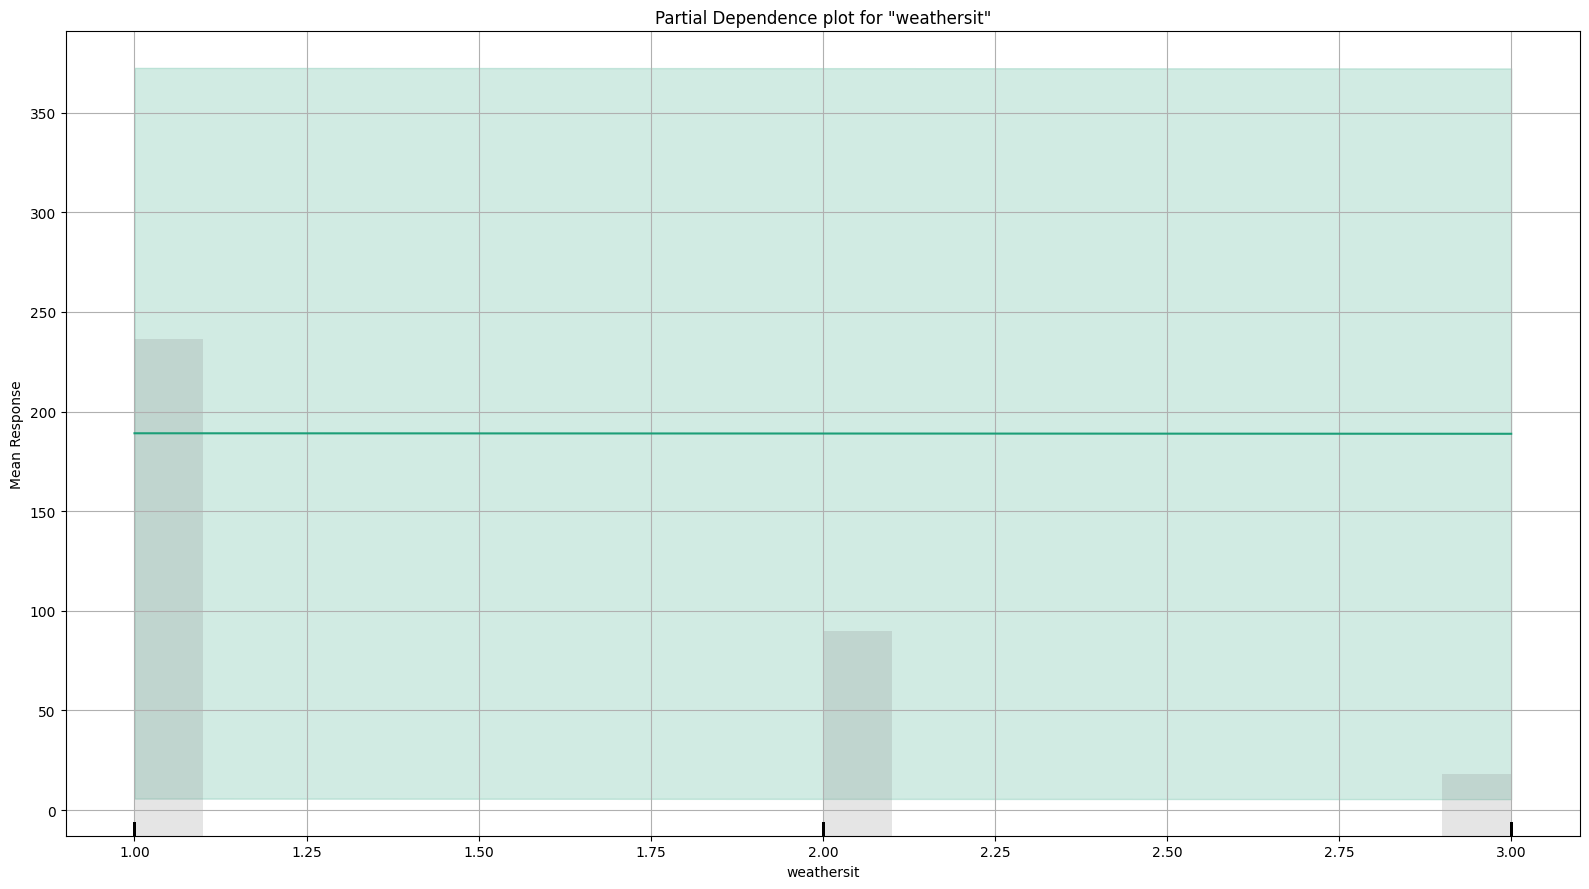

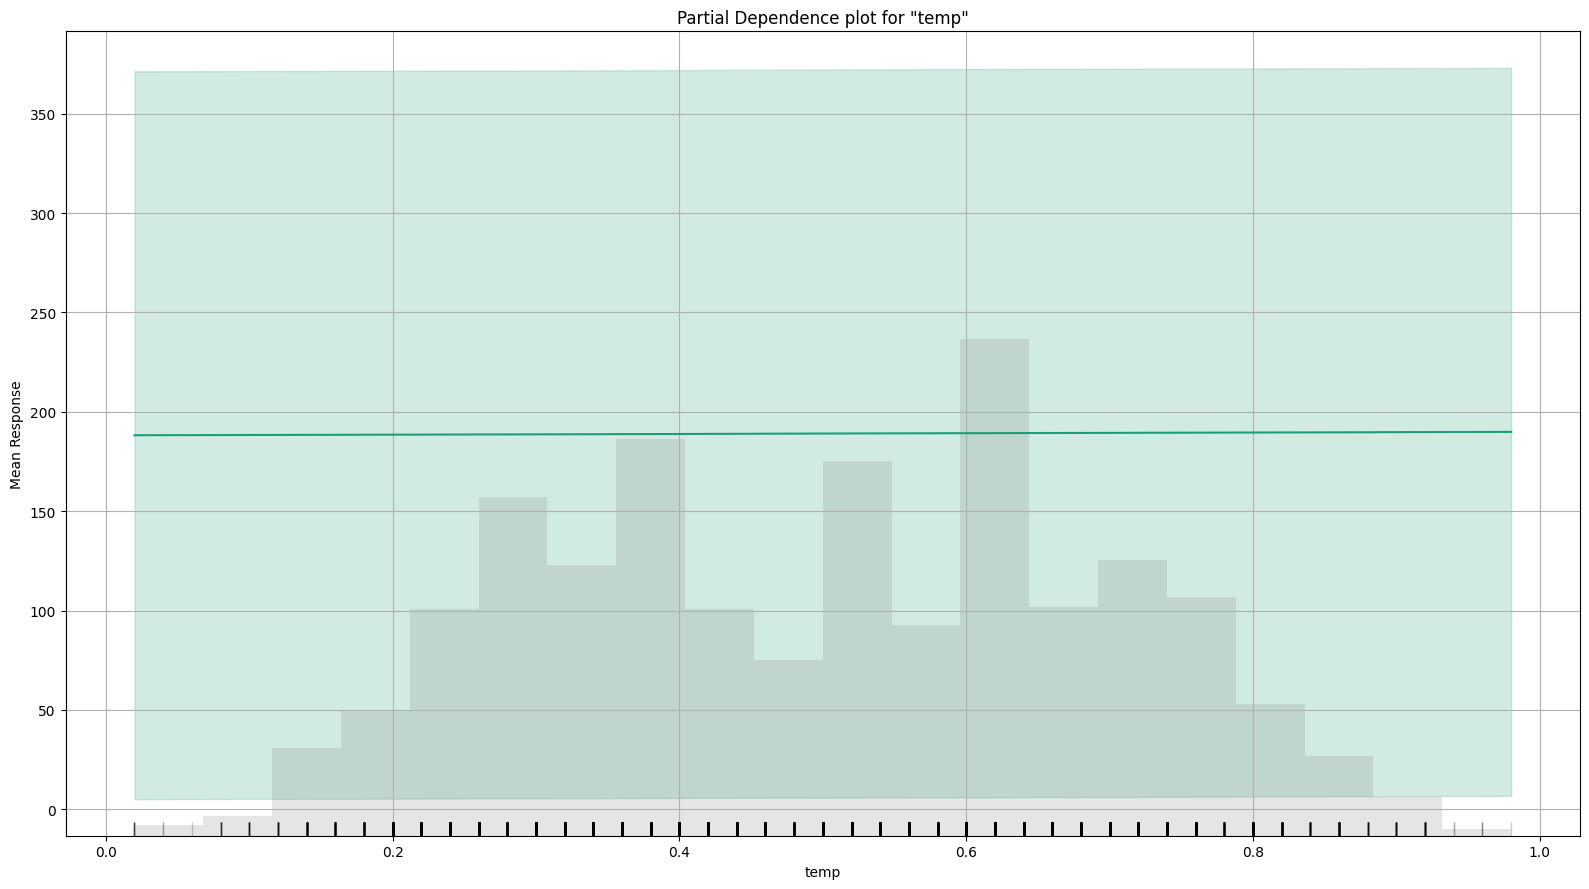

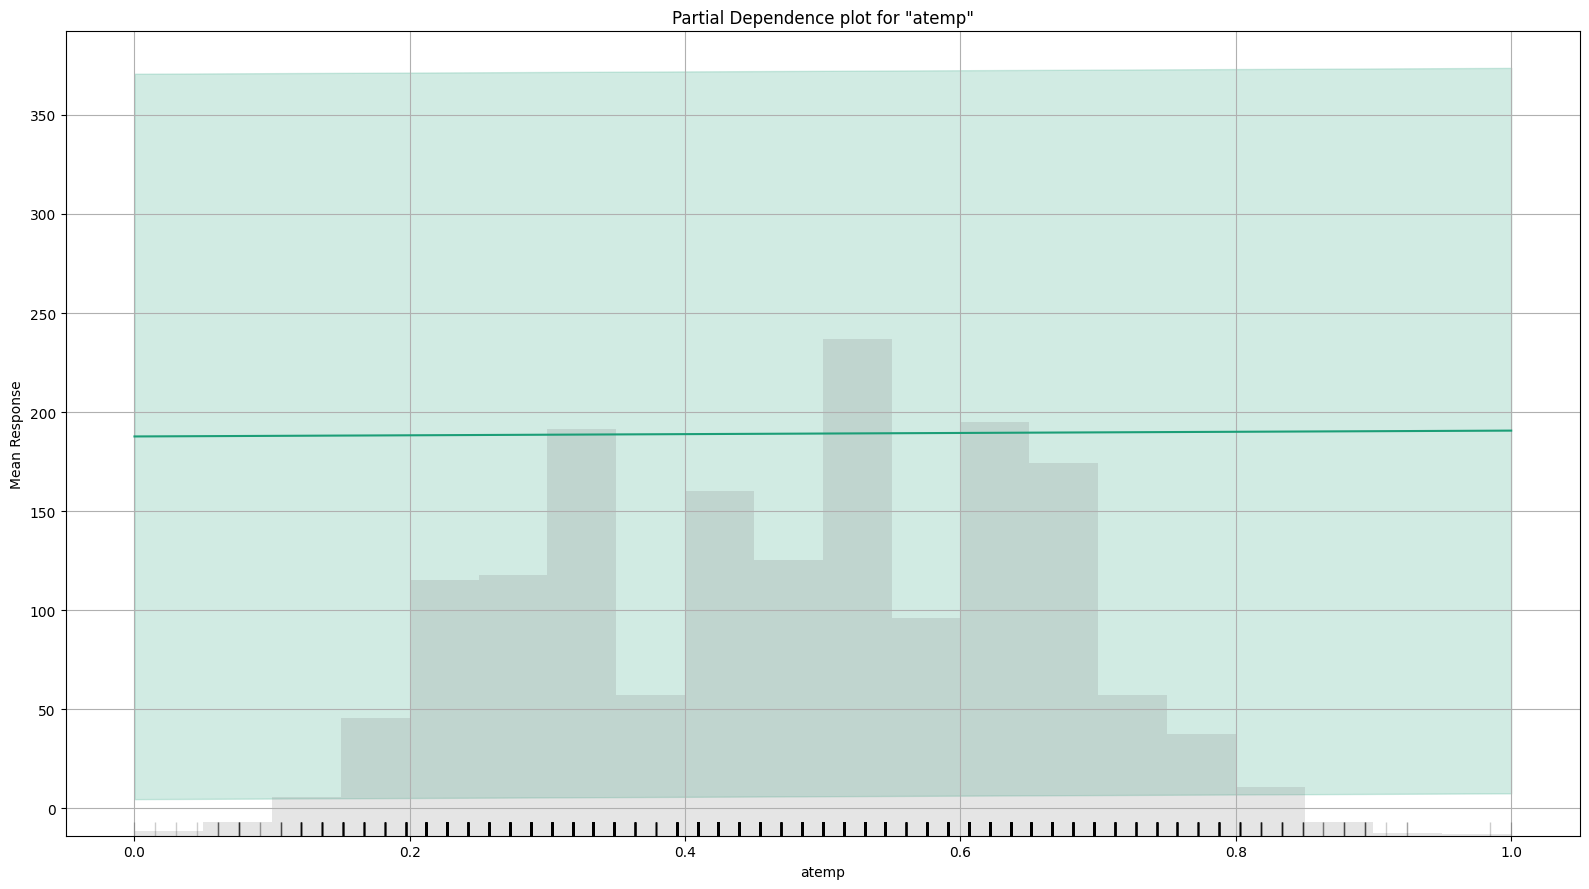

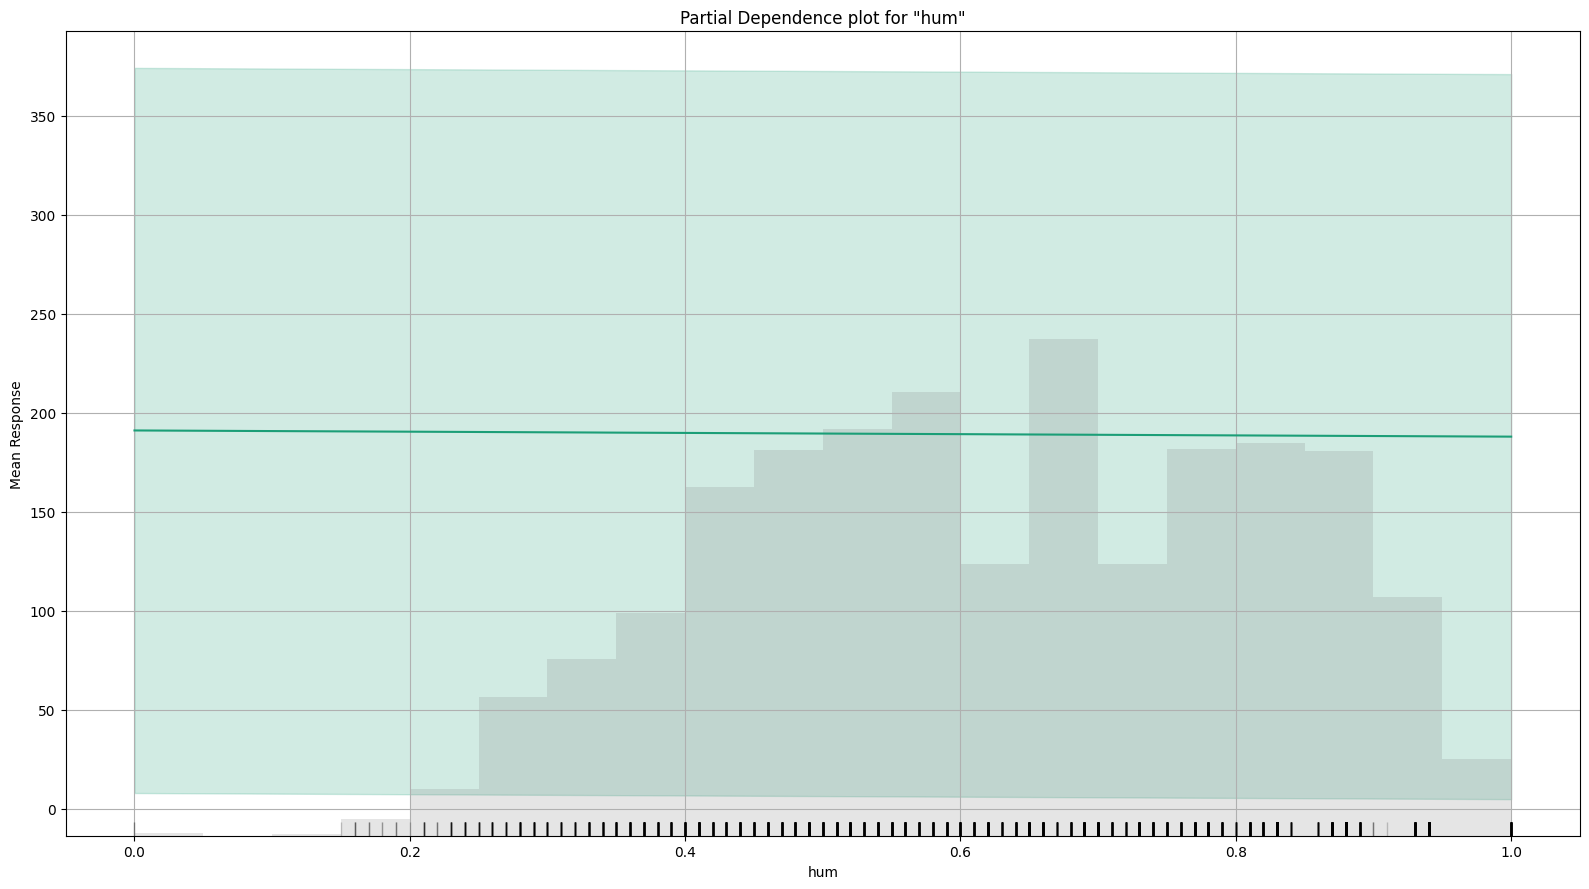

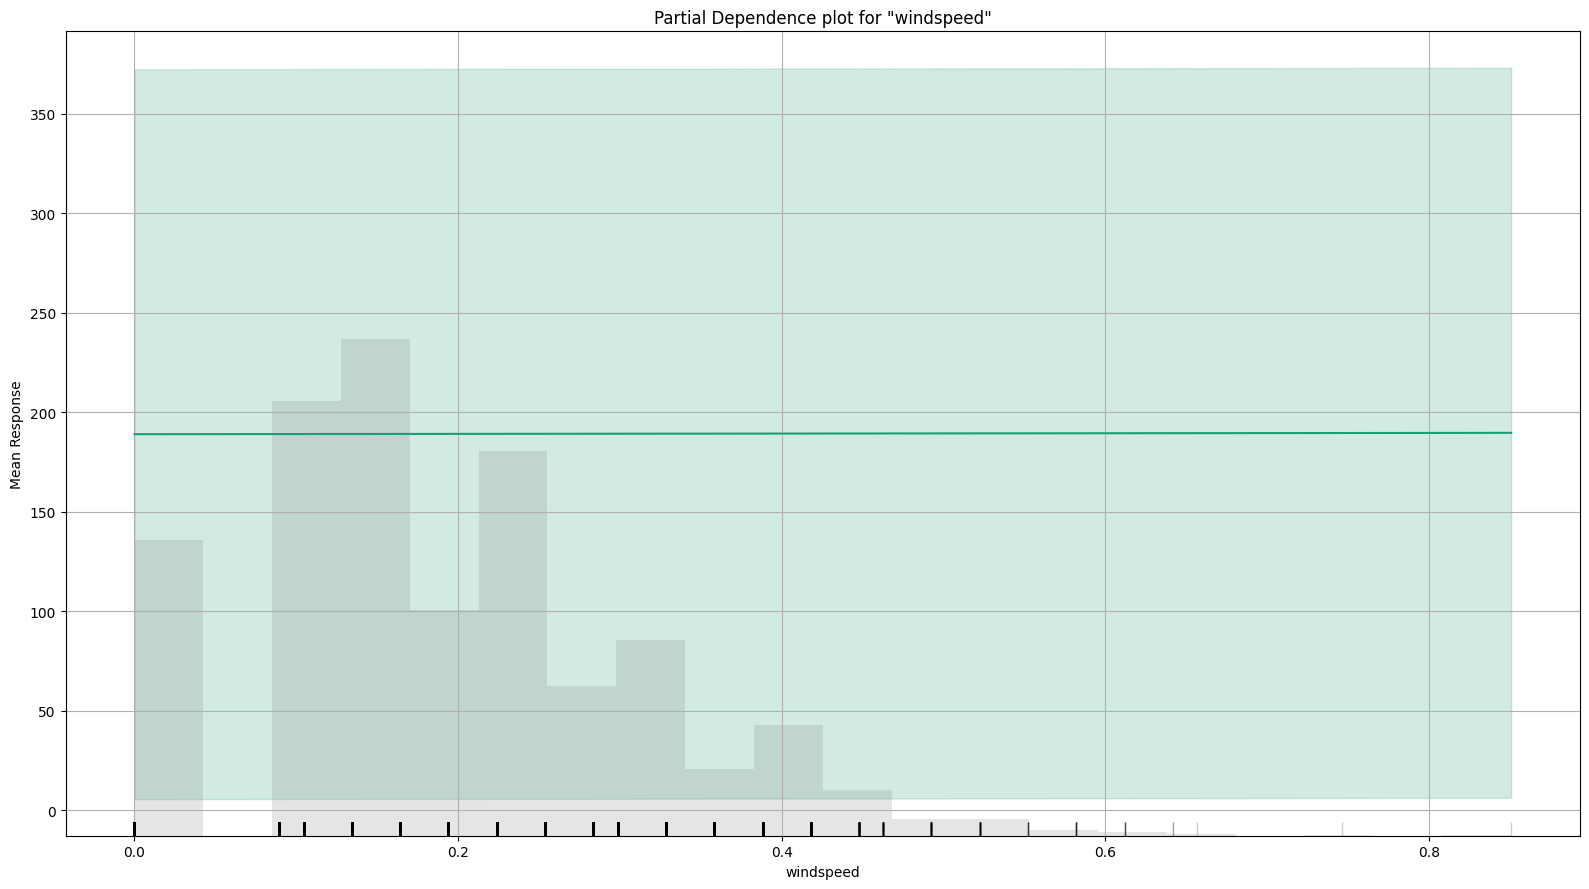

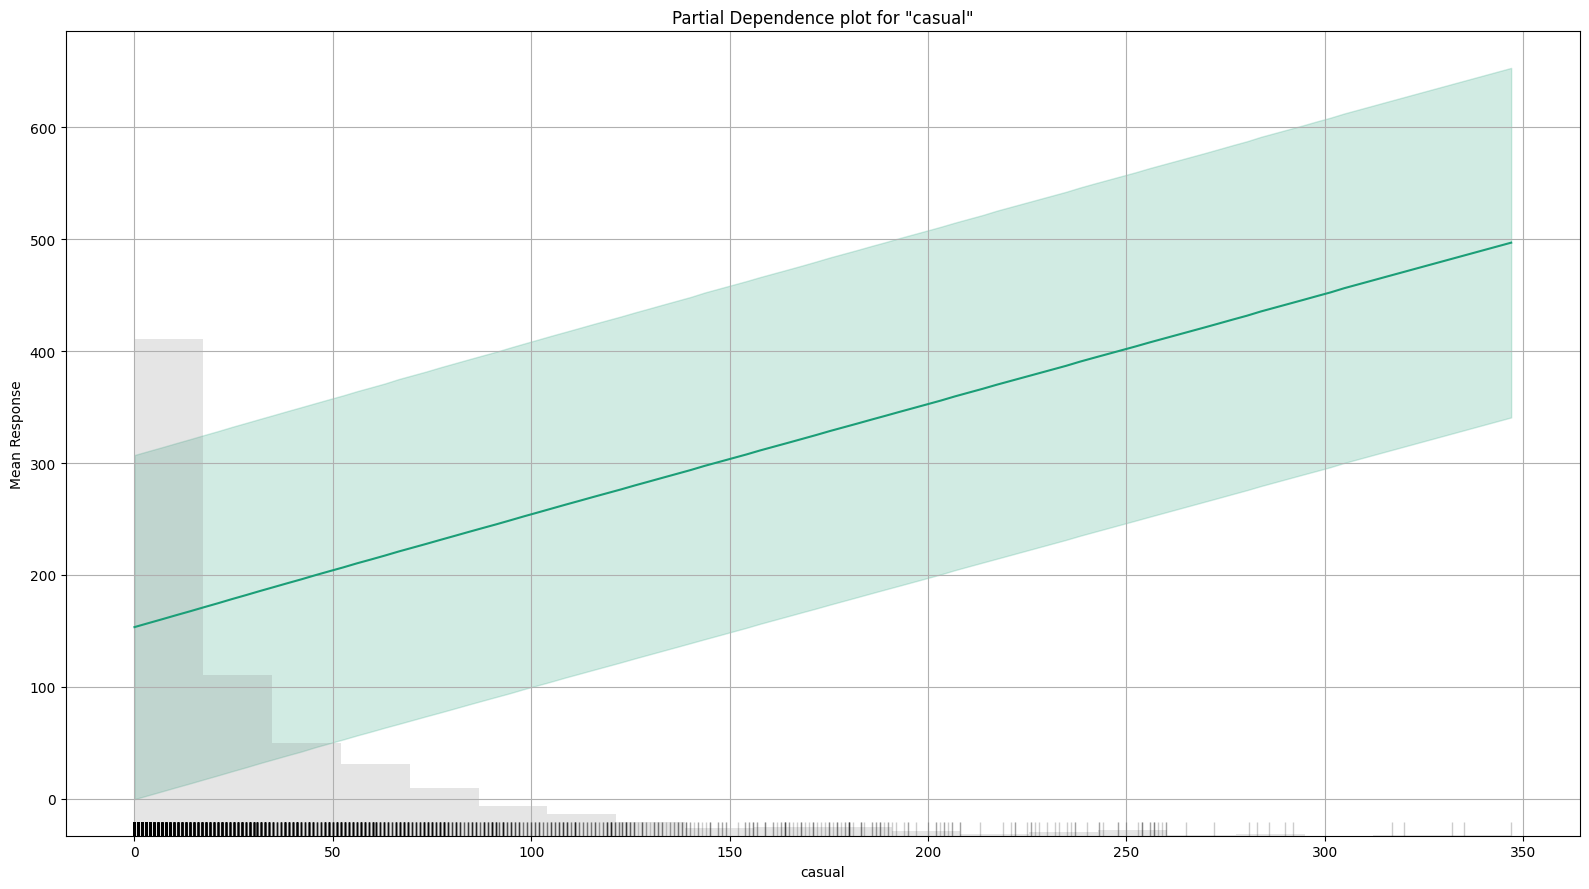

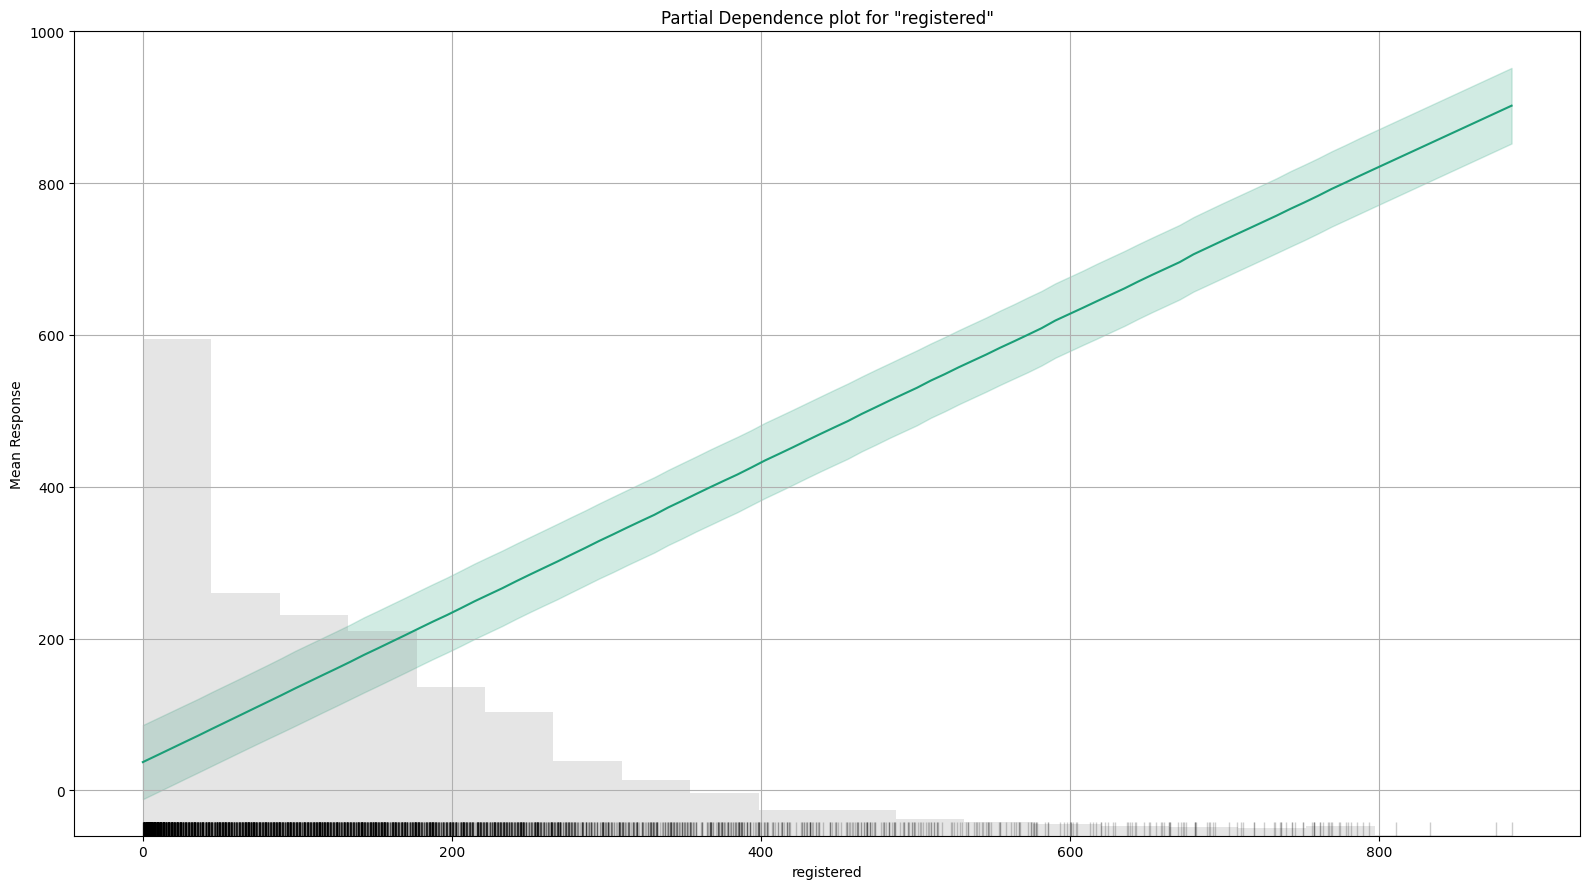

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

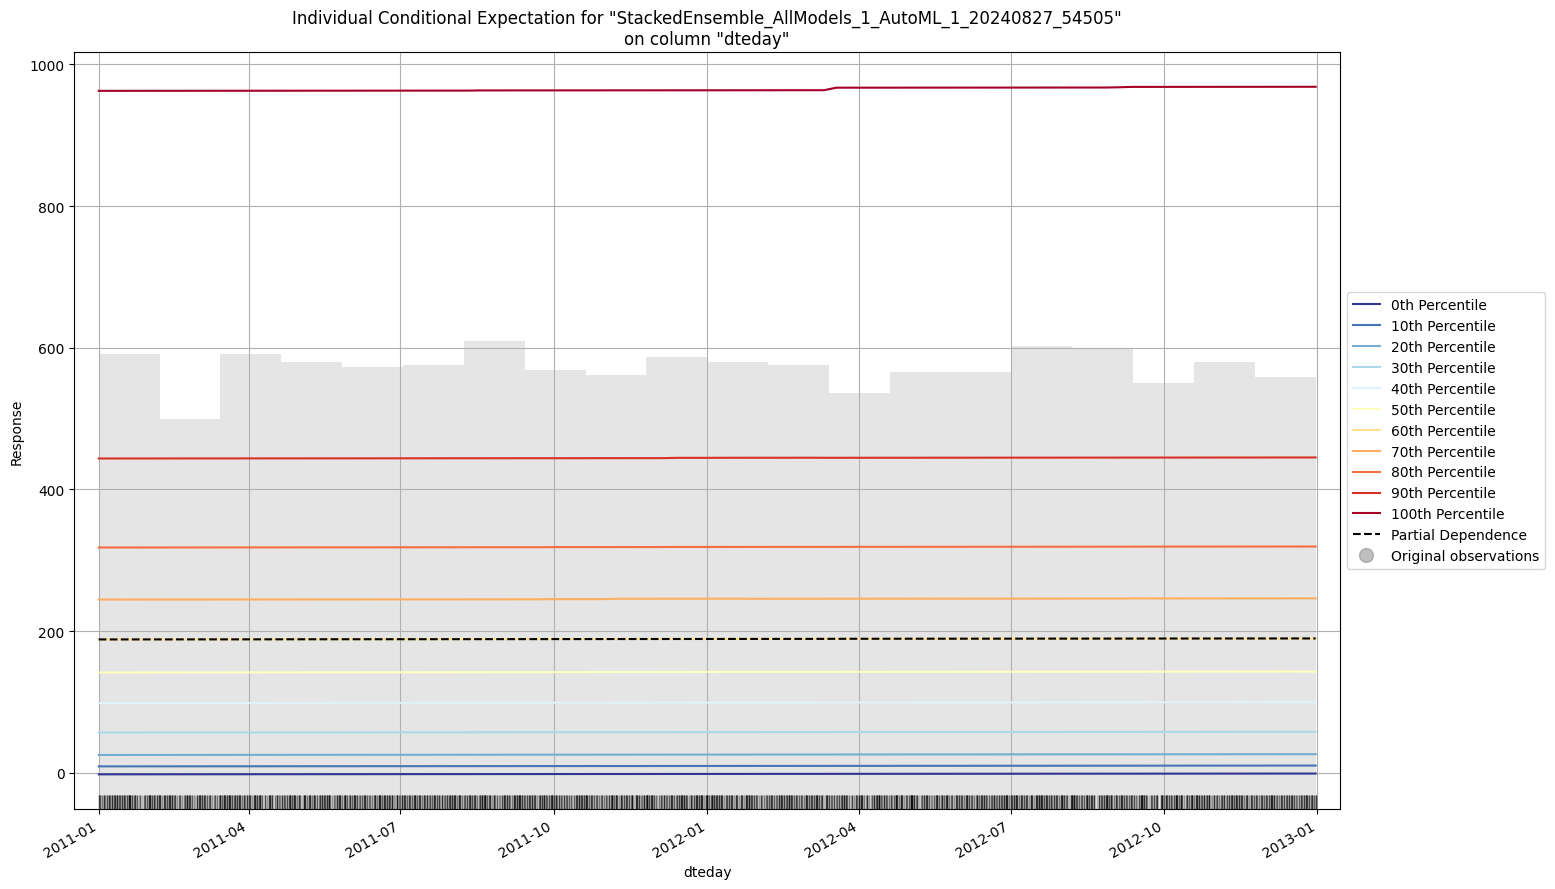

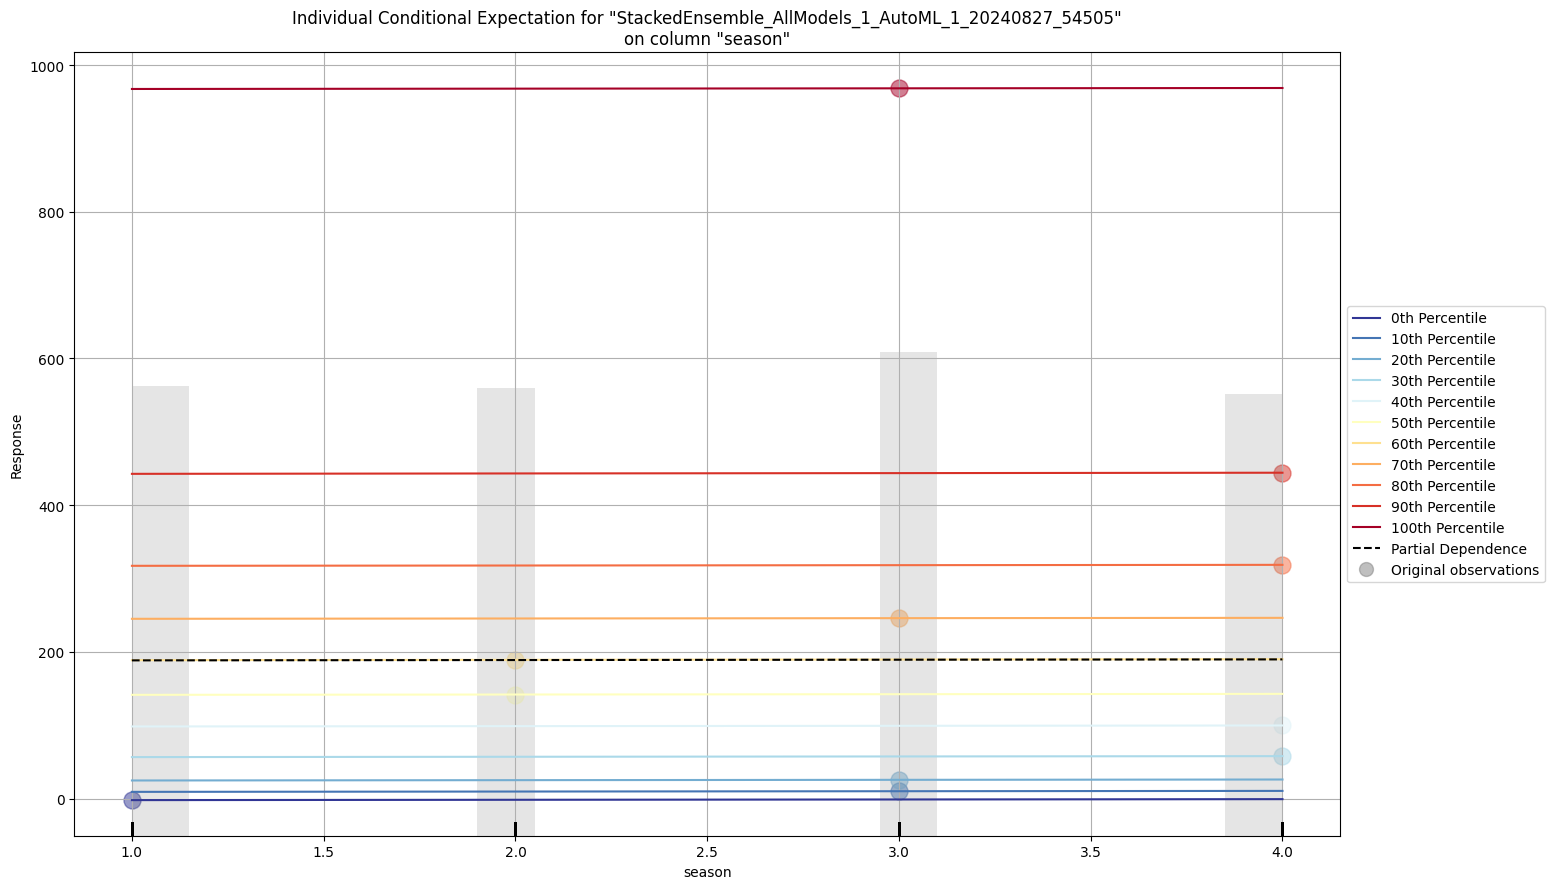

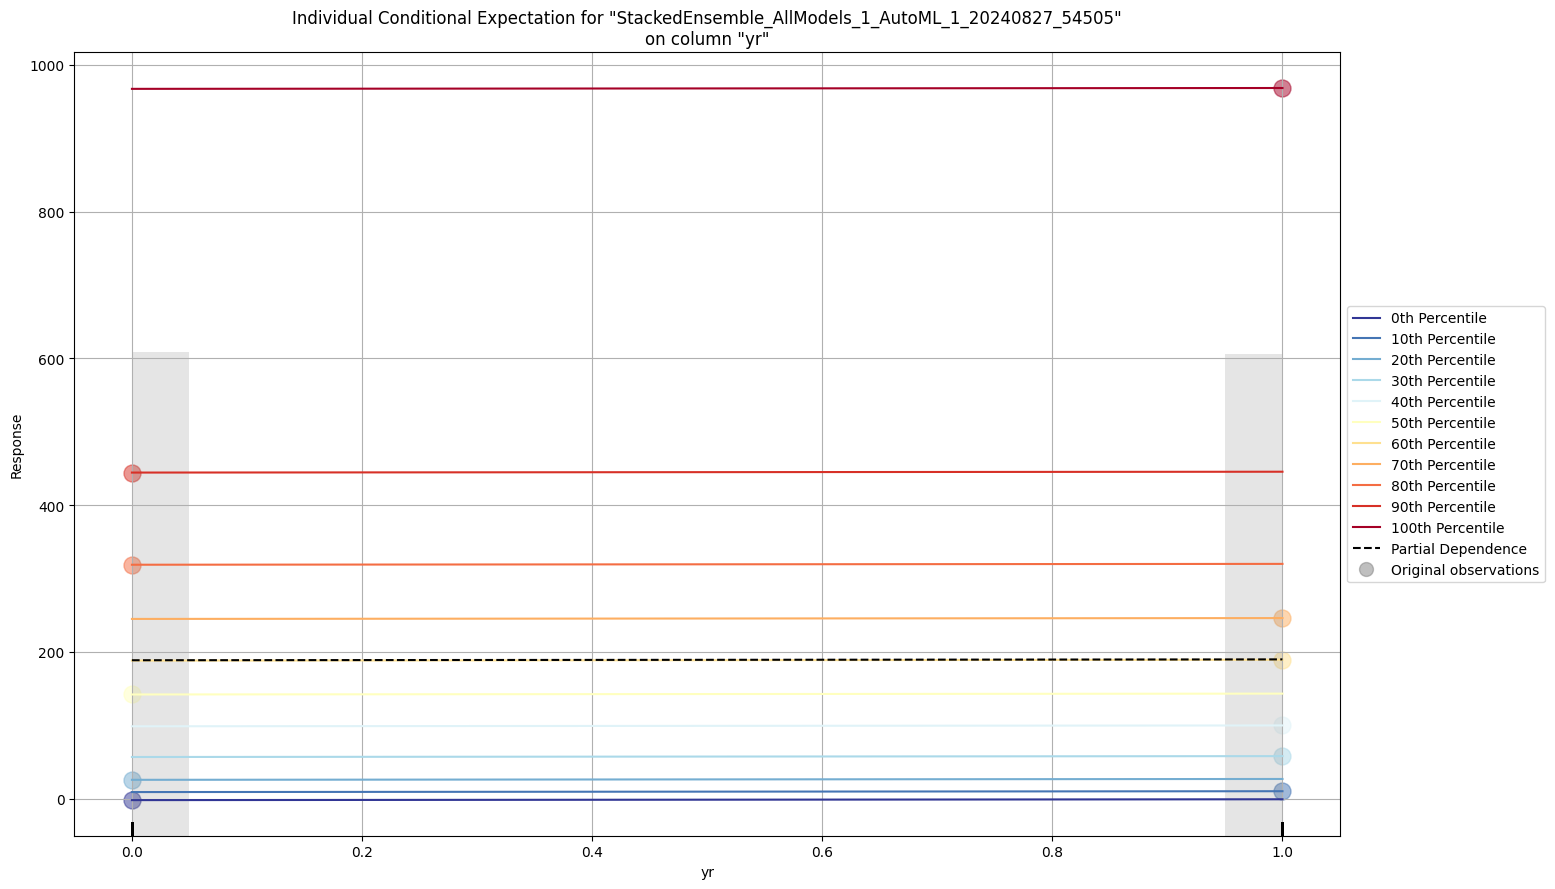

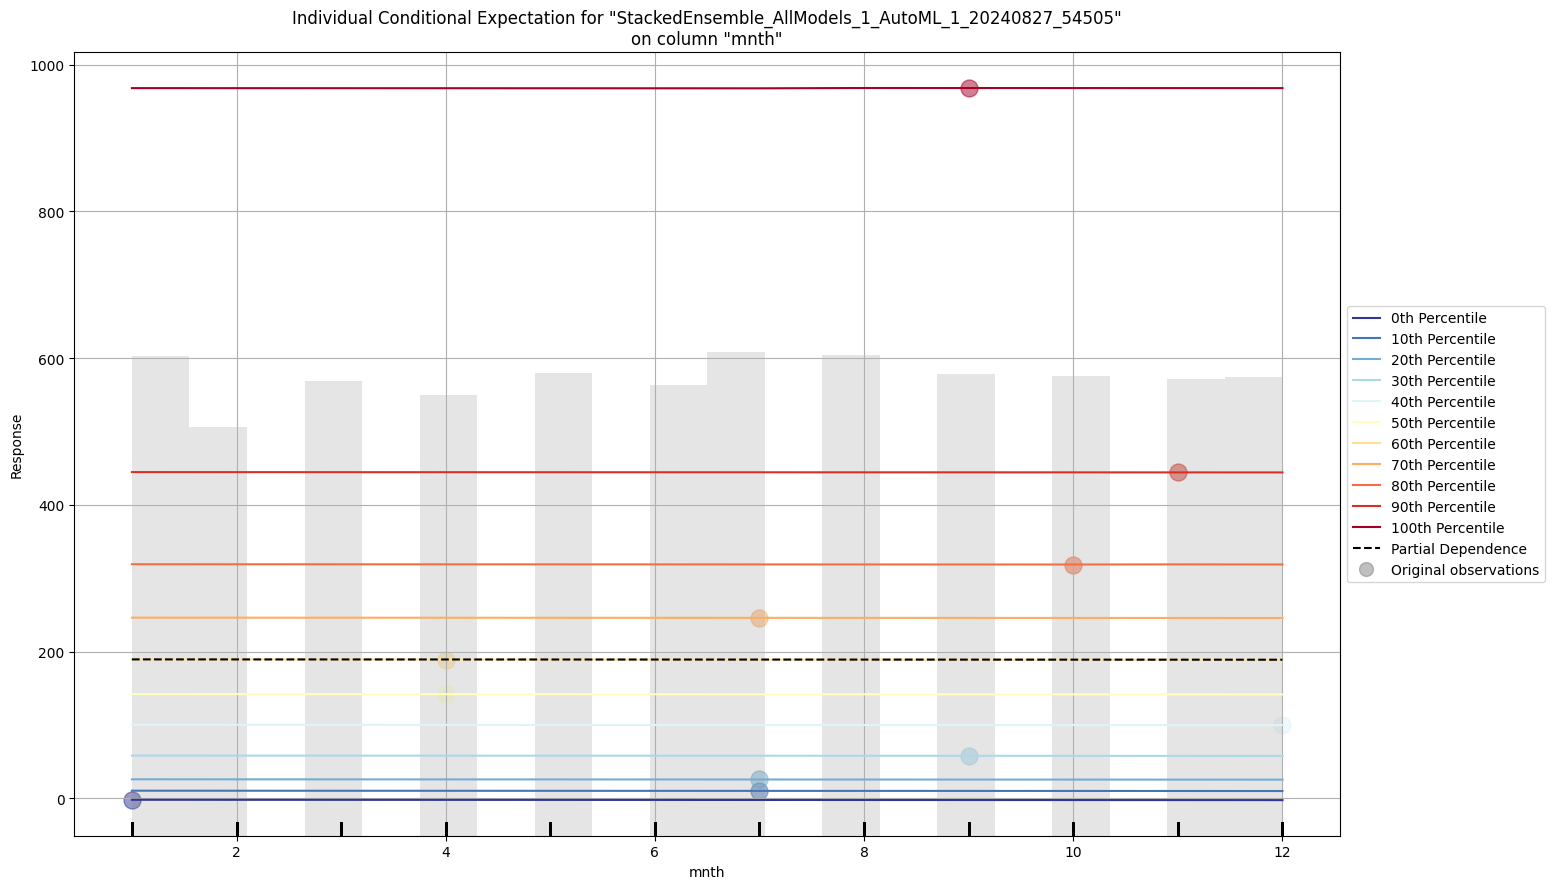

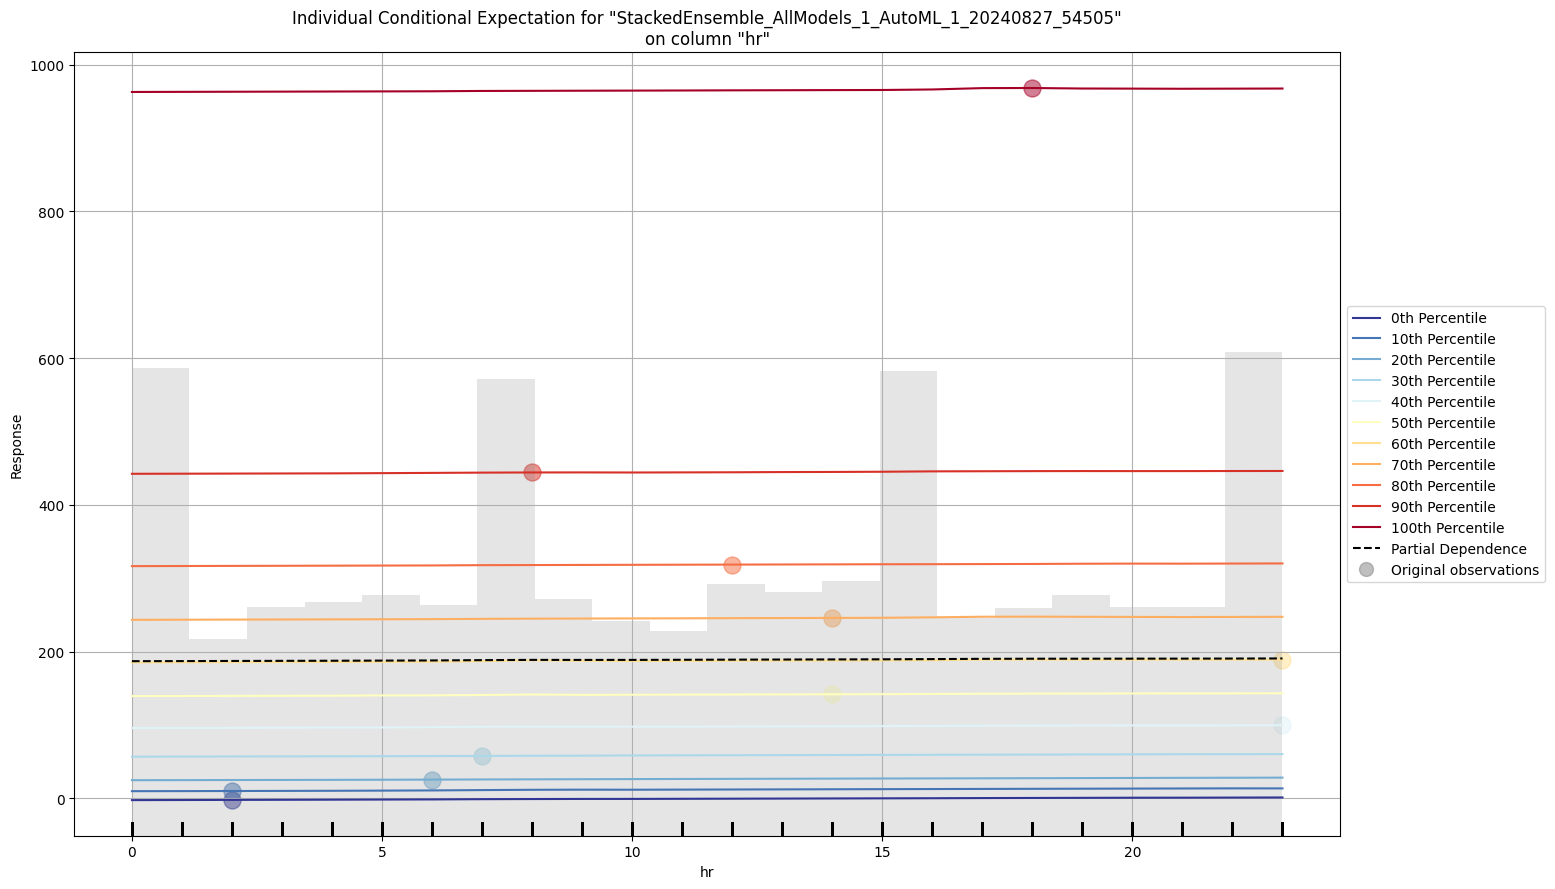

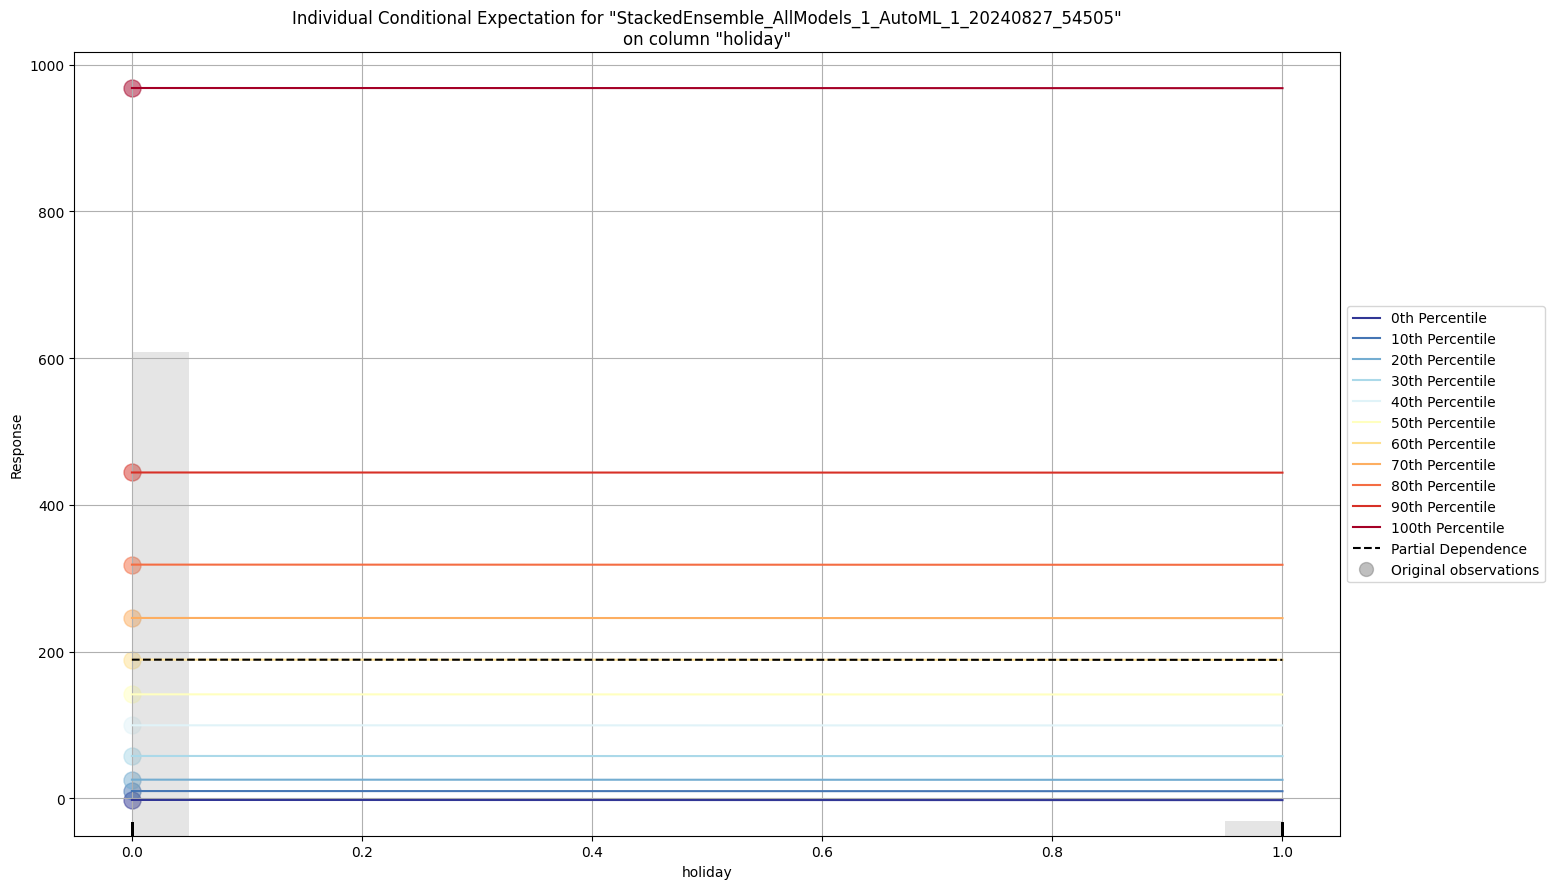

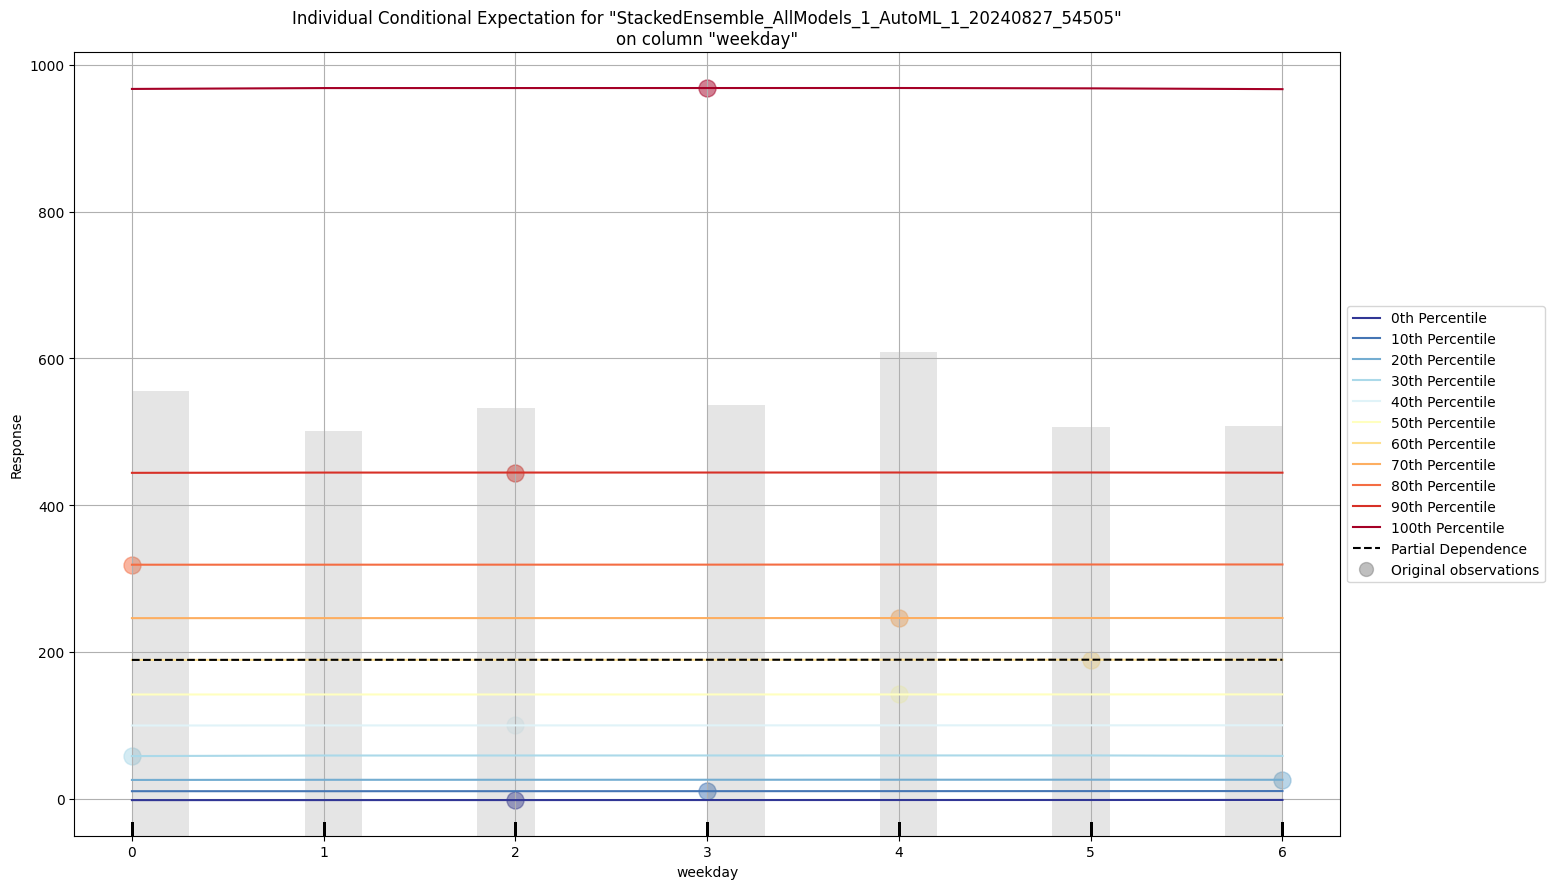

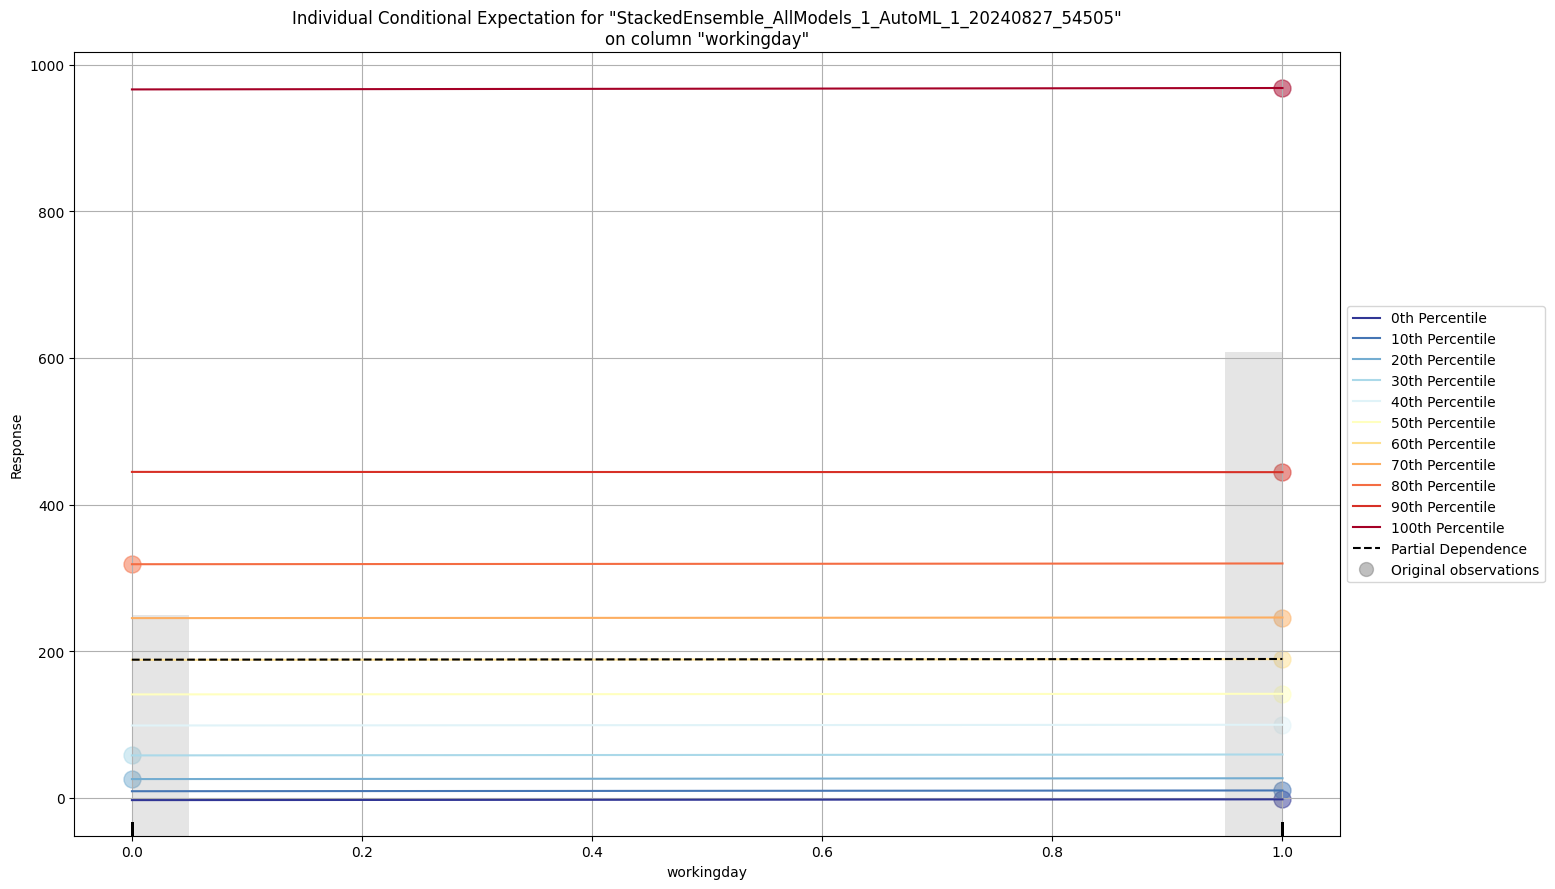

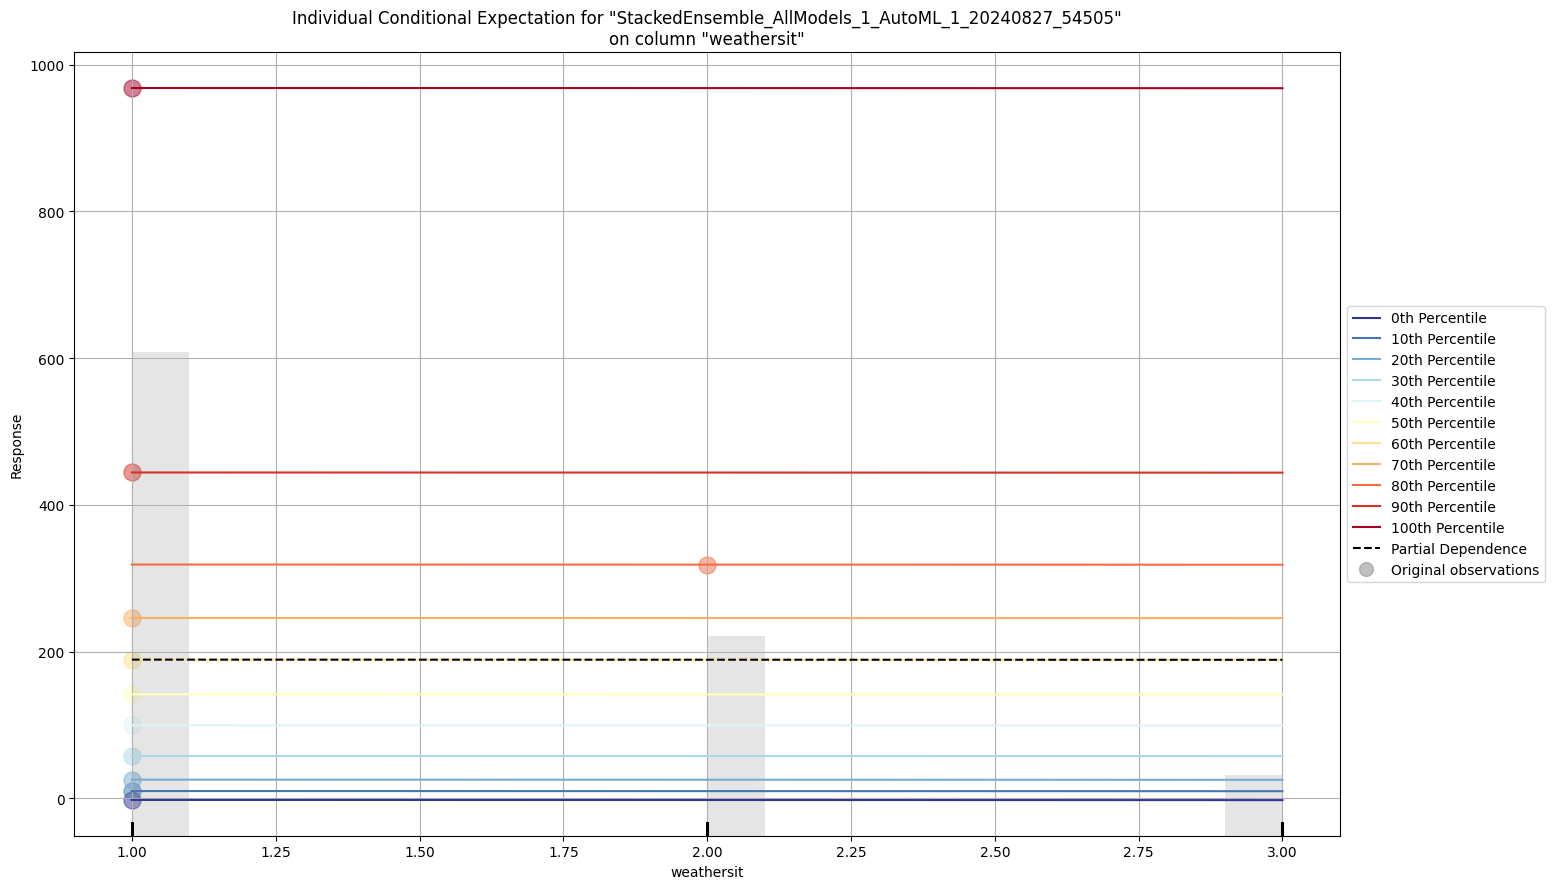

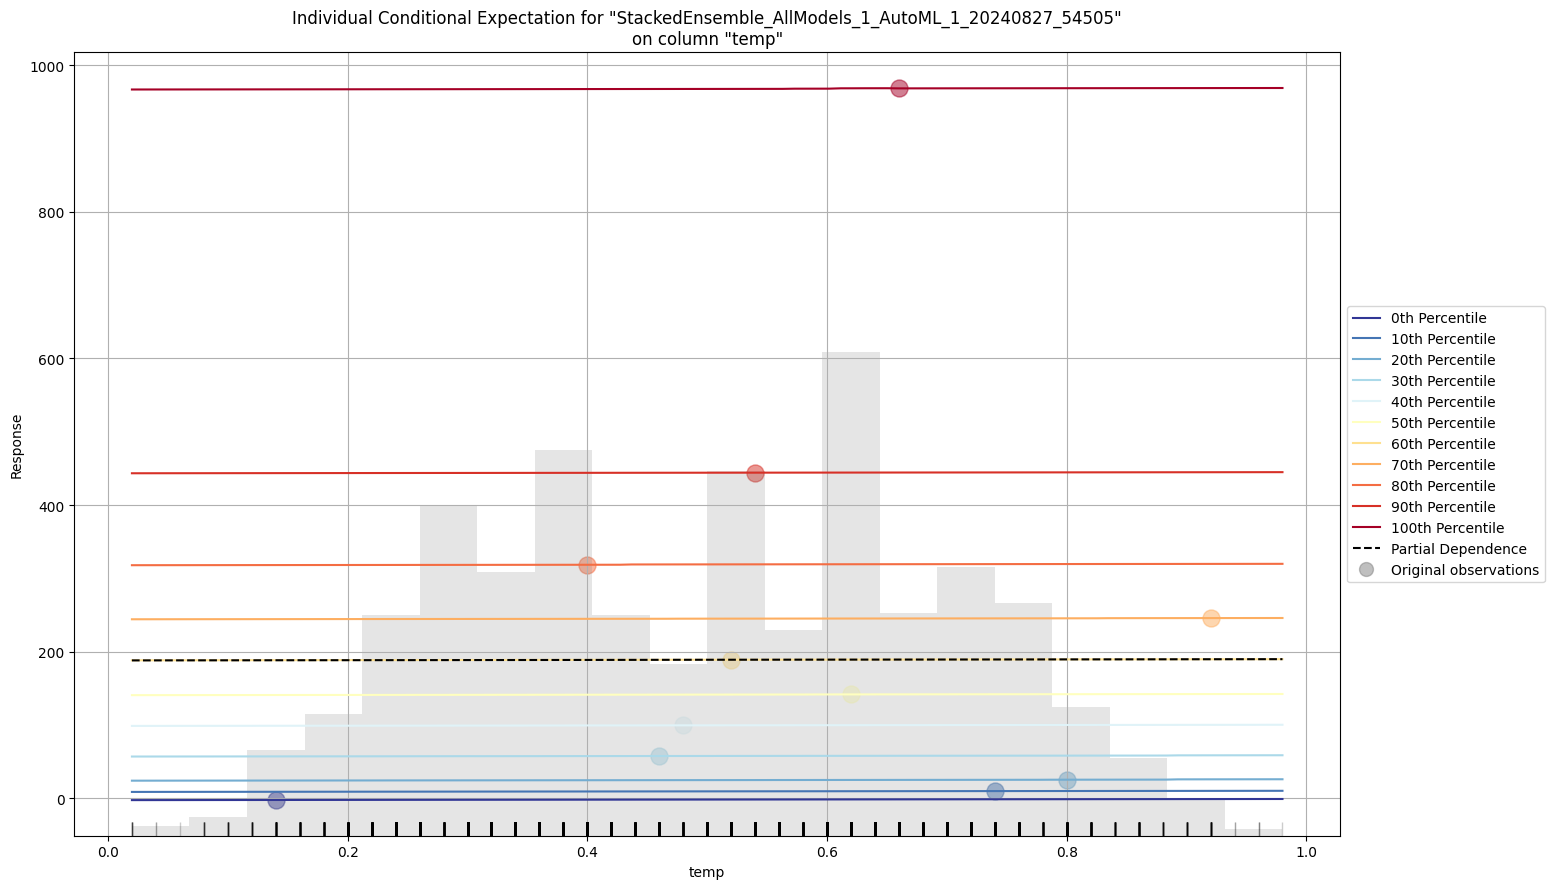

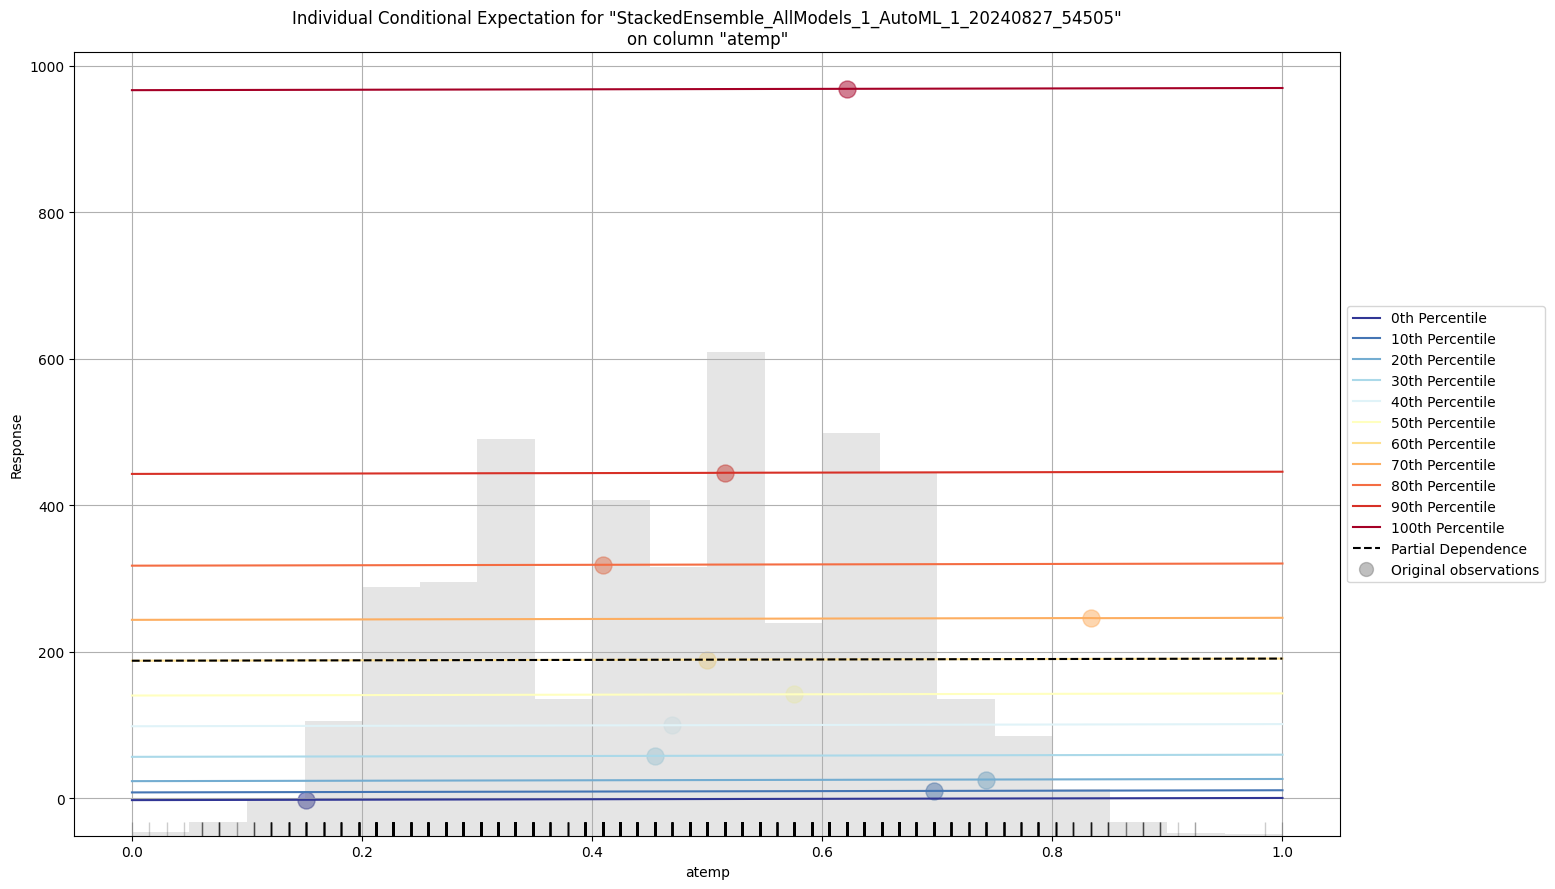

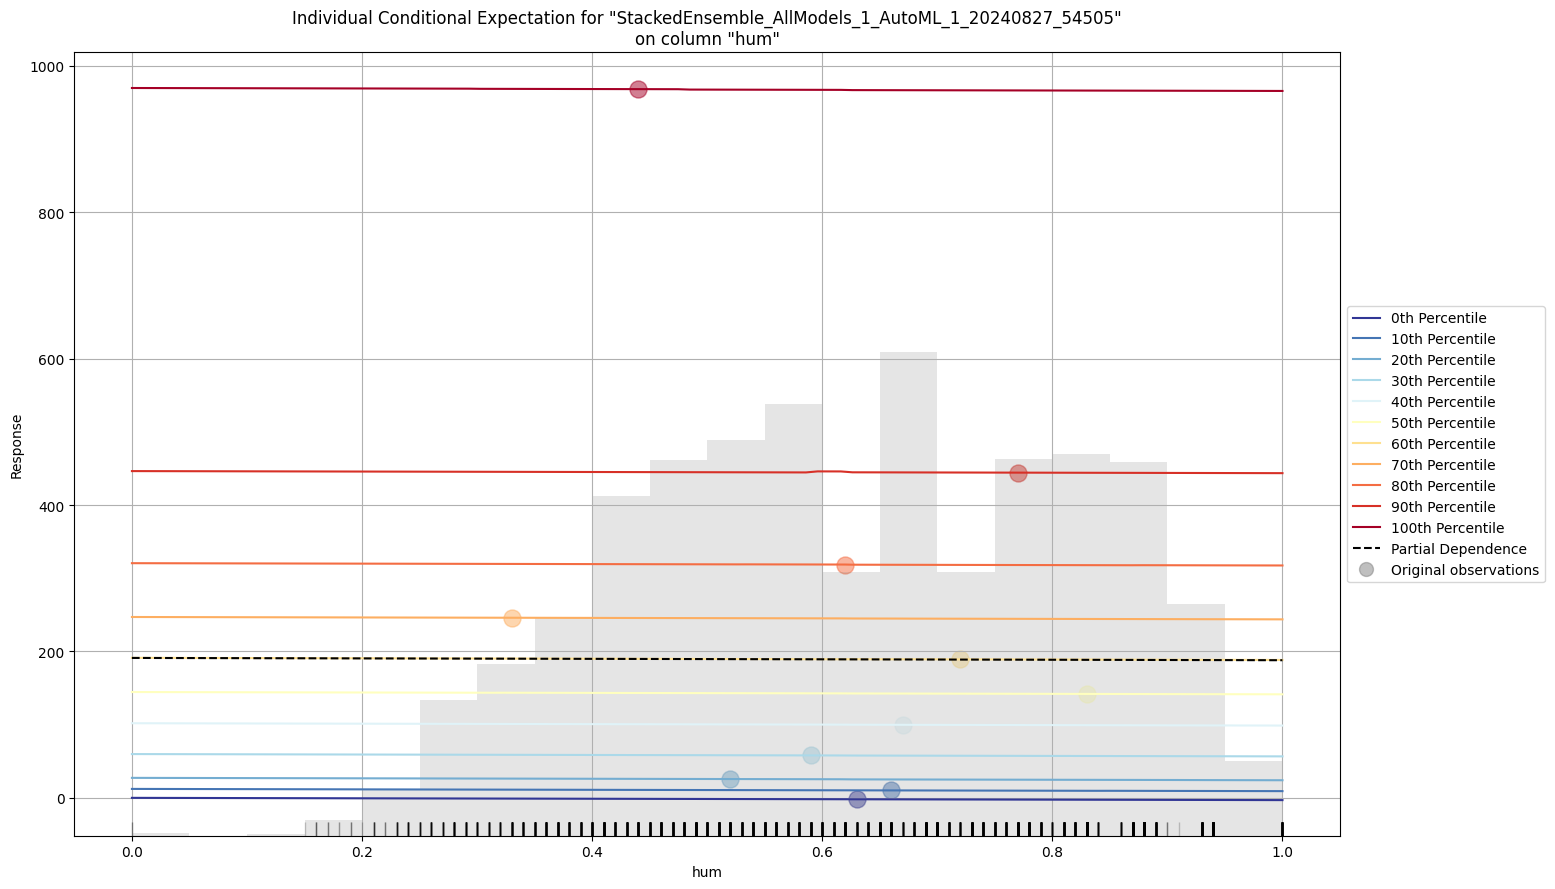

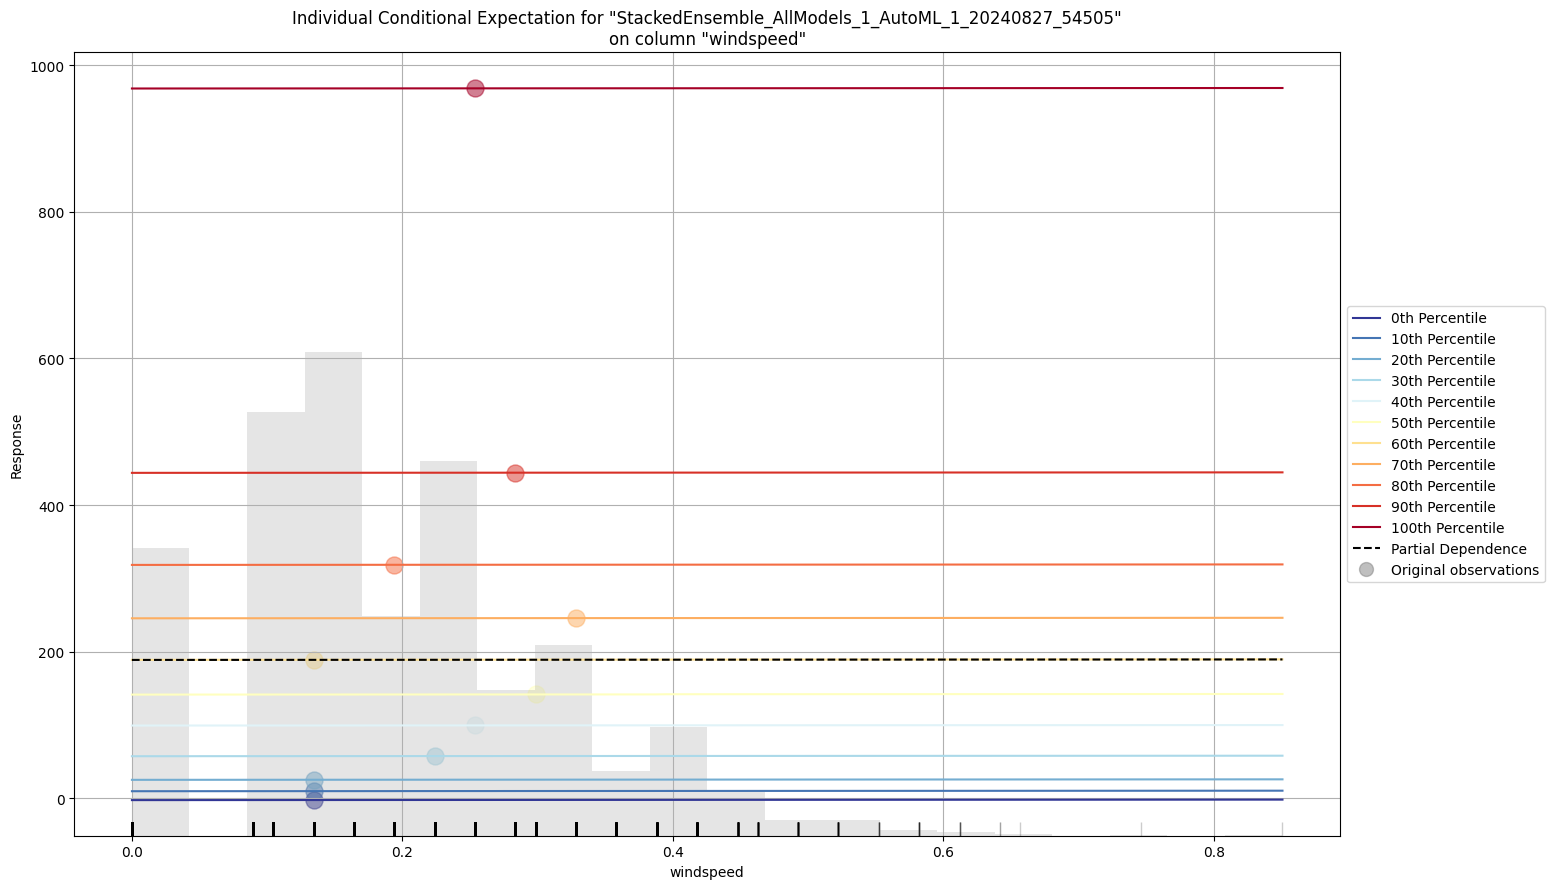

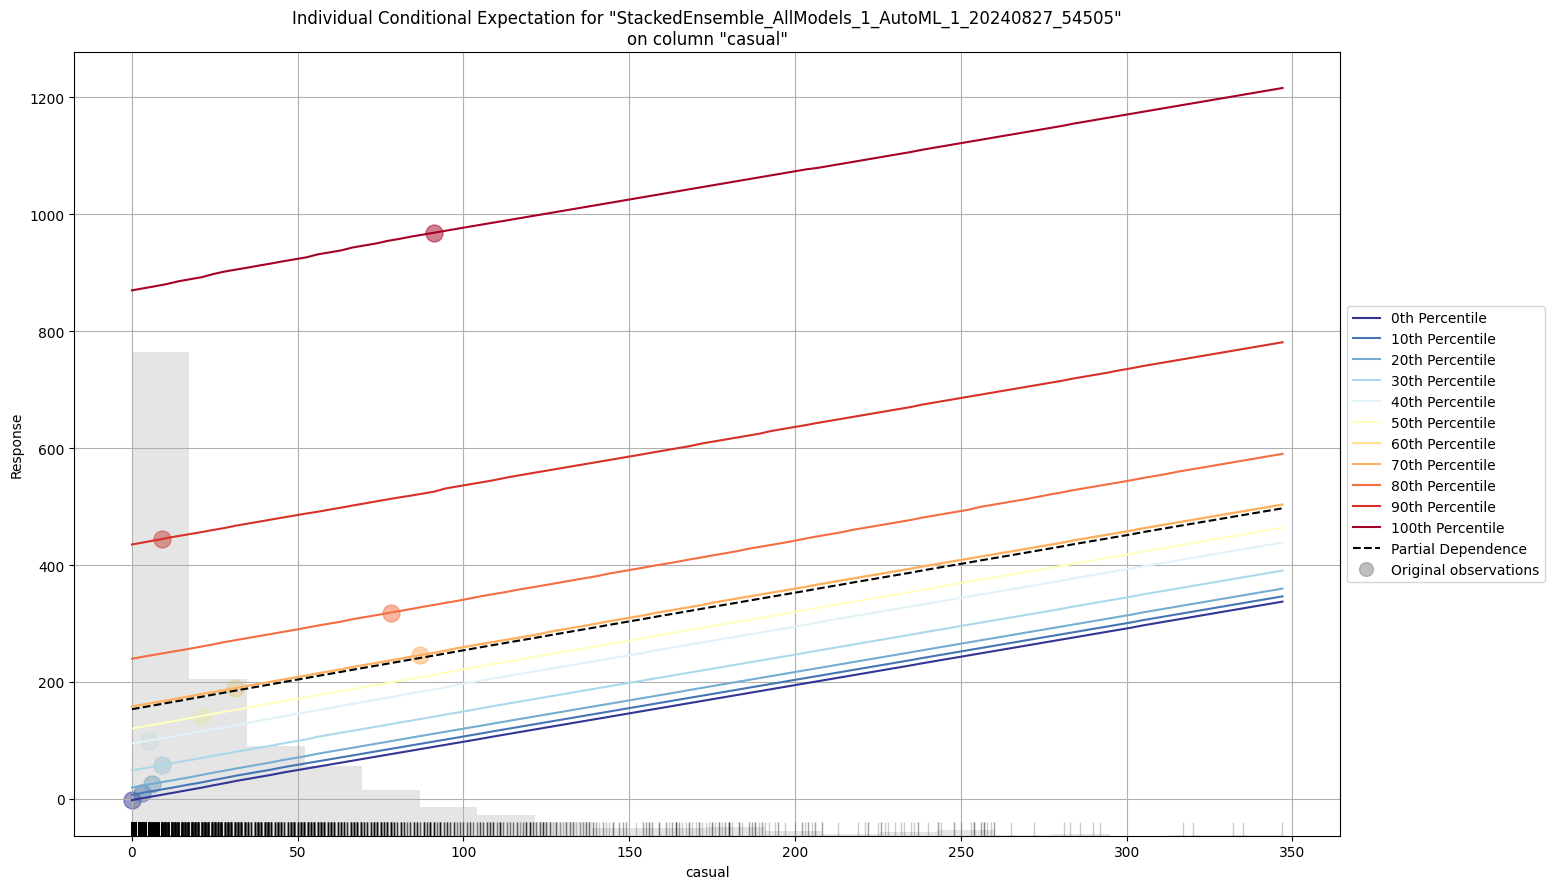

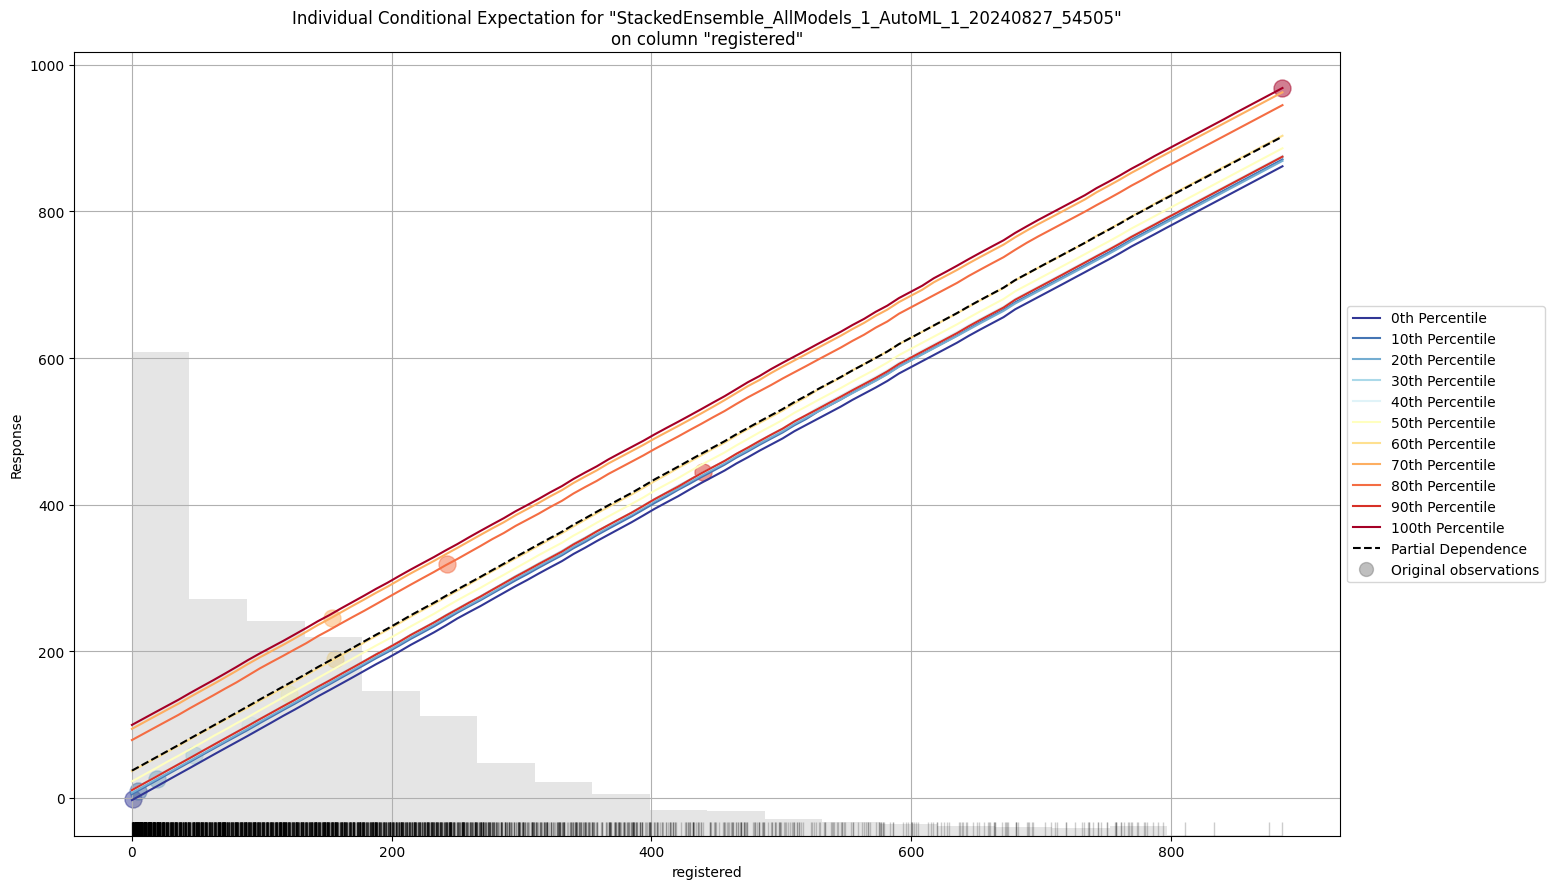

In [21]:
# Explain leader model & compare all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)

**3. Interpretation on Hourly data**
1. Stacked Ensemble model gave good result
2. Registered users are using bike more than casual users on hourly basis
3. Hour and DateDay are also influencing bike rental user counts
4. Weekday, Workingday, Holiday seems to be having no significant effect on total users count
5. Residual analysis shows all are behaving random nature except some of them
6. Environmental conditions like Seaseon, temp, windspeed, humidity etc also doesn't seem to have any considerable effect on Bike rental users count
7. Parameters tuning is necessary for better results

**4. H2OGradientBoostingEstimator on Day data**

In [23]:
# Importing the day data
day_data = h2o.import_file('day.csv')
day_data.head(2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


instant  dteday                 season    yr    mnth    holiday    weekday    workingday    weathersit      temp     atemp       hum    windspeed    casual    registered    cnt
---------  -------------------  --------  ----  ------  ---------  ---------  ------------  ------------  --------  --------  --------  -----------  --------  ------------  -----
        1  2011-01-01 00:00:00         1     0       1          0          6             0             2  0.344167  0.363625  0.805833     0.160446       331           654    985
        2  2011-01-02 00:00:00         1     0       1          0          0             0             2  0.363478  0.353739  0.696087     0.248539       131           670    801
[2 rows x 16 columns]

In [24]:
train_d, test_d = day_data.split_frame([0.8], seed = 42)
y_d='cnt'
ignore = ['instant', 'cnt']
x_d= list(set(train_d.names)-set(ignore))

In [25]:
# Build and train the model:
gbm = H2OGradientBoostingEstimator(seed=42,
                                   model_id='gbm',
                                   nfolds = 5,
                                   keep_cross_validation_predictions=True)
%time gbm.train(x=x_d, y=y_d, training_frame=train_d)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
CPU times: user 362 ms, sys: 35.2 ms, total: 397 ms
Wall time: 4.06 s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          17415                  5            5            5             13            28            22.98

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3283.610588556987
RMSE: 57.30279738858293
MAE: 37.22619496681042
RMSLE: 0.1269930664692556
Mean Residual Deviance: 3283.610588556987

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 20901.12909696614
RMSE: 144.57222795878238
MAE: 90.82482250148307
RMSLE: 0.15007091394662064
Mean Residual Deviance: 20901.12909696614

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0           nan           nan           nan           nan           nan
loglikelihood           nan       0           nan           nan           nan           nan           nan
mae                     90.7711   13.9496     76.3535       95.7506       106.167       99.8531       75.7314
mean_residual_deviance  20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
mse                     20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
r2                      0.994531  0.00186763  0.996771      0.993438      0.992302      0.994024      0.996118
residual_deviance       20832.1   6845.91     11831.9       25759.8       27777.1       23257.1       15534.4
rmse                    142.616   24.8212     108.774       160.499       166.665       152.503       124.637
rmsle                   0.100703  0.127362    0.0444382     0.0566247     0.0399218     0.0344632     0.328065

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-08-27 05:56:10  2.843 sec   0.0                1969.2548518794397  1625.3134392017555  3877964.671650714
     2024-08-27 05:56:10  2.850 sec   1.0                1776.9548491970675  1465.0698487597488  3157568.536084973
     2024-08-27 05:56:10  2.856 sec   2.0                1603.2771294285496  1320.4448123713714  2570497.5537486505
     2024-08-27 05:56:10  2.863 sec   3.0                1447.019807659973   1190.9929804281305  2093866.3237603053
     2024-08-27 05:56:10  2.877 sec   4.0                1306.2844918124574  1073.791692194947   1706379.17354973
     2024-08-27 05:56:10  2.886 sec   5.0                1178.8926993547275  968.4318665714363   1389787.9965918758
     2024-08-27 05:56:10  2.894 sec   6.0                1064.7453891422158  873.650870020716    1133682.7436996084
     2024-08-27 05:56:11  2.912 sec   7.0                961.4909603803281   788.4039063346241   924464.8668930858
     2024-08-27 05:56:11  2.923 sec   8.0                869.0590805305934   712.7018035941562   755263.6854526803
     2024-08-27 05:56:11  2.931 sec   9.0                785.4642162518289   642.9335053177806   616954.0350120999
---  ---                  ---         ---                ---                 ---                 ---
     2024-08-27 05:56:11  3.443 sec   41.0               68.75318768192476   45.19711203219779   4727.000816425971
     2024-08-27 05:56:11  3.451 sec   42.0               66.84344741165881   43.706366738992095  4468.046461875197
     2024-08-27 05:56:11  3.462 

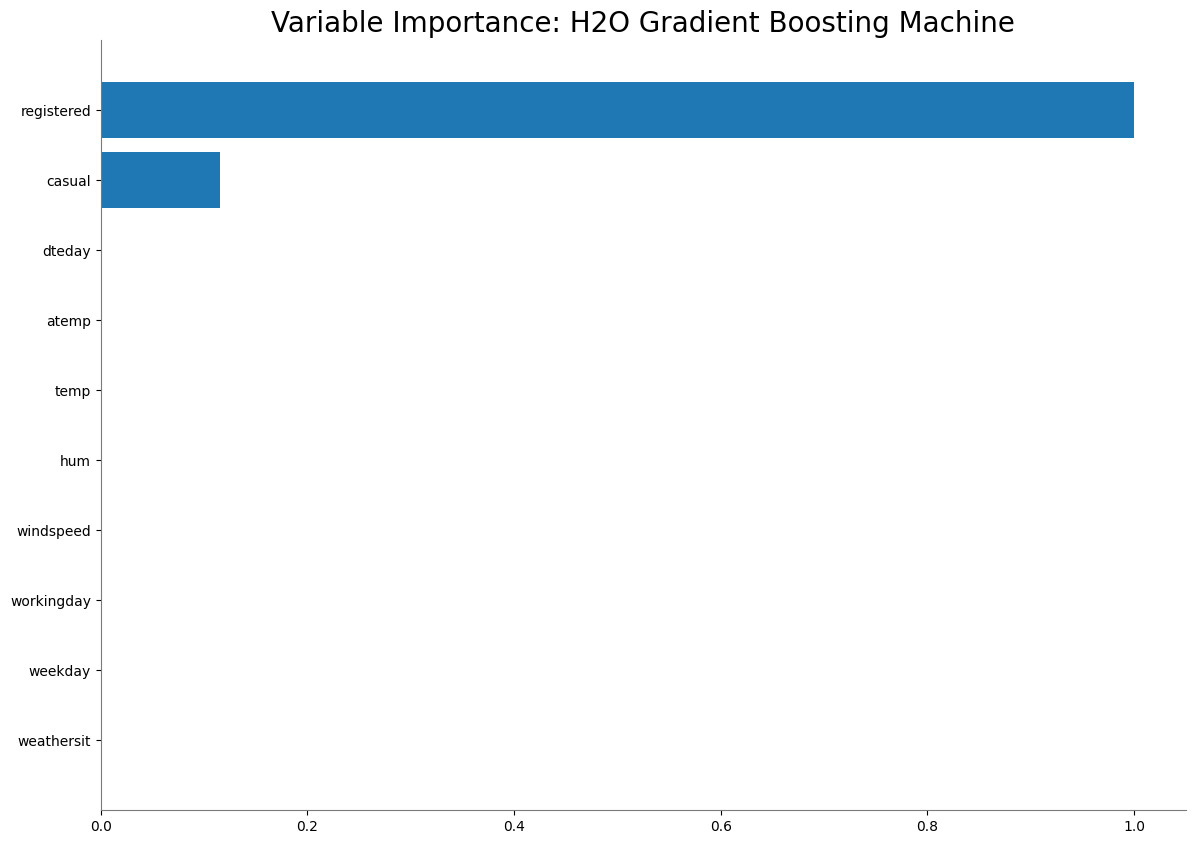

<Figure size 640x480 with 0 Axes>

In [26]:
#variable importance plot
gbm.varimp_plot()

In [27]:
# performance evaluation on test set
gbm_per = gbm.model_performance(test_d)
gbm_per

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 13730.719248661599
RMSE: 117.17815175476015
MAE: 75.4038032452297
RMSLE: 0.024027338498679957
Mean Residual Deviance: 13730.719248661599

In [28]:
# GBM predictions comparison with actual test cnt values for day data set
gbm_pred = gbm.predict(test_d)
test_gbm_pred = test_d['cnt'].cbind(gbm_pred)
test_gbm_pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


cnt    predict
-----  ---------
 1263    1310.68
 1248    1286.53
  986    1028.47
 1416    1447.94
 1360    1392.68
 1526    1579.88
 1815    1875.73
 2115    2145.35
 1107    1119.85
 1807    1873.97
[154 rows x 2 columns]

In [29]:
# Extract feature interactions:
gbm.feature_interaction()

[Interaction Depth 0: 
    interaction    gain         fscore    wfscore    average_wfscore    average_gain    expected_gain    gain_rank    fscore_rank    wfscore_rank    avg_wfscore_rank    avg_gain_rank    expected_gain_rank    average_rank    average_tree_index    average_tree_depth
--  -------------  -----------  --------  ---------  -----------------  --------------  ---------------  -----------  -------------  --------------  ------------------  ---------------  --------------------  --------------  --------------------  --------------------
    weekday        173155       9         0.963605   0.107067           19239.5         25065.8          9            8              9               10                  11               9                     9.33333         33.5556               3.77778
    registered     3.36872e+09  482       136.619    0.283441           6.98905e+06     1.6423e+09       1            1              1               1                   1                1    

**5. H2OAutoML for day data**

In [30]:
# Build and train model
aml = H2OAutoML(max_runtime_secs=60,
                seed = 42)
%time aml.train(x=x_d, y=y_d, training_frame=train_d)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 1.76 s, sys: 124 ms, total: 1.88 s
Wall time: 1min 1s


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_2_20240827_55815


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2828.986523111618
RMSE: 53.18821789749698
MAE: 32.78435314534174
RMSLE: 0.12376904867942154
Mean Residual Deviance: 2828.986523111618
R^2: 0.9992704970873529
Null degrees of freedom: 576
Residual degrees of freedom: 573
Null deviance: 2237585615.542462
Residual deviance: 1632325.2238354038
AIC: 6233.262854220025

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 15571.28938789769
RMSE: 124.78497260446744
MAE: 77.60985067498285
RMSLE: 0.15142141693474492
Mean Residual Deviance: 15571.28938789769
R^2: 0.9959846747698015
Null degrees of freedom: 576
Residual degrees of freedom: 573
Null deviance: 2244848046.2657537
Residual deviance: 8984633.976816967
AIC: 7217.342277857014

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     1448.88      87.1644      1395.15       1590.96       1400.47       1474.62       1383.22
loglikelihood           0            0            0             0             0             0             0
mae                     77.3576      8.87403      73.9433       92.7093       76.9136       72.4518       70.7698
mean_residual_deviance  15452        3901.68      13760.1       22369.2       12928.7       14388         13814
mse                     15452        3901.68      13760.1       22369.2       12928.7       14388         13814
null_deviance           4.4897e+08   5.58918e+07  4.10993e+08   5.45218e+08   4.15917e+08   4.50128e+08   4.22592e+08
r2                      0.996023     0.000634413  0.996238      0.994917      0.996487      0.996109      0.996366
residual_deviance       1.79693e+06  540522       1.54113e+06   2.75141e+06   1.46094e+06   1.69779e+06   1.53336e+06
rmse                    123.611      14.6782      117.304       149.563       113.704       119.95        117.533
rmsle                   0.0948845    0.134956     0.336046      0.0412294     0.0292168     0.0402858     0.0276444

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [31]:
# Checking the leaderboard
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id                                                    rmse               mse        mae       rmsle    mean_residual_deviance
------------------------------------------------------  --------  ----------------  ---------  ----------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_2_20240827_55815   124.785   15571.3            77.6099    0.151421           15571.3
StackedEnsemble_AllModels_3_AutoML_2_20240827_55815      125.027   15631.8            77.3285    0.148657           15631.8
StackedEnsemble_BestOfFamily_3_AutoML_2_20240827_55815   134.148   17995.7            87.1062    0.157668           17995.7
GBM_grid_1_AutoML_2_20240827_55815_model_2               134.696   18143.1            83.5023    0.143129           18143.1
StackedEnsemble_AllModels_2_AutoML_2_20240827_55815      135.229   18287              86.4955    0.153495           18287
StackedEnsemble_BestOfFamily_2_AutoML_2_20240827_55815   135.574   18380.3            88.5433    0.15454            18380.3
StackedEnsemble_AllModels_1_AutoML_2_20240827_55815      136.15    18536.9            87.4937    0.152919           18536.9
GBM_3_AutoML_2_20240827_55815                            146.403   21433.7            94.391     0.153002           21433.7
GBM_grid_1_AutoML_2_20240827_55815_model_1               146.421   21439.1            95.7334    0.169219           21439.1
GBM_4_AutoML_2_20240827_55815                            147.901   21874.6            95.9893    0.146884           21874.6
GBM_5_AutoML_2_20240827_55815                            162.678   26464             106.791     0.169271           26464
GBM_2_AutoML_2_20240827_55815                            163.427   26708.3           108.739     0.170681           26708.3
StackedEnsemble_BestOfFamily_1_AutoML_2_20240827_55815   195.899   38376.4           143.912     0.179057           38376.4
XGBoost_1_AutoML_2_20240827_55815                        199.695   39878.1           147.838     0.177918           39878.1
XGBoost_3_AutoML_2_20240827_55815                        236.381   55876.1           167.828     0.144551           55876.1
XGBoost_grid_1_AutoML_2_20240827_55815_model_1           240.978   58070.2           170.098     0.196696           58070.2
XGBoost_2_AutoML_2_20240827_55815                        257.38    66244.6           183.739     0.224119           66244.6
XRT_1_AutoML_2_20240827_55815                            277.9     77228.2           189.021     0.212272           77228.2
DRF_1_AutoML_2_20240827_55815                            285.756   81656.6           189.934     0.225486           81656.6
XGBoost_grid_1_AutoML_2_20240827_55815_model_3           320.546  102750             194.388     0.146516          102750
XGBoost_grid_1_AutoML_2_20240827_55815_model_2           350.624  122937             245.974     0.222032          122937
DeepLearning_1_AutoML_2_20240827_55815                   419.199  175728             310.897     0.248571          175728
GBM_1_AutoML_2_20240827_55815                            428.129  183295             323.867     0.264993          183295
DeepLearning_grid_1_AutoML_2_20240827_55815_model_1      554.421  307382             431.581   nan                 307382
DeepLearning_grid_1_AutoML_2_20240827_55815_model_2      558.934  312407             408.246     0.277883          312407
DeepLearning_grid_2_AutoML_2_20240827_55815_model_1      614.396  377482             480.475     0.269222          377482
GBM_grid_1_AutoML_2_20240827_55815_model_3               617.573  381396             471.931     0.282161          381396
GBM_grid_1_AutoML_2_20240827_55815_model_4               771.441  595122             608.457     0.358913          595122
GLM_1_AutoML_2_20240827_55815                           1969.3         3.87814e+06  1625.5       0.623211               3.87814e+06
XGBoost_grid_1_AutoML_2_20240827_55815_model_4          3925.57        1.54101e+07  3509.01      1.74224                1.54101e+07
[30 rows x 6 columns]

In [32]:
# Checking the leader model performance
aml.leader.model_performance(test_d)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 9235.566171344106
RMSE: 96.10185311087454
MAE: 65.88671735751967
RMSLE: 0.023247130650514692
Mean Residual Deviance: 9235.566171344106
R^2: 0.9971618068063782
Null degrees of freedom: 153
Residual degrees of freedom: 150
Null deviance: 502171071.09785277
Residual deviance: 1422277.1903869922
AIC: 1853.1789167011718

**Explaining the AutoML model on Day data**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse               mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ----------------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
XGBoost_grid_1_AutoML_2_20240827_55815_model_4           212.437   45129.5           149.699    1.47371           45129.5                         142                   0.000451  XGBoost
XGBoost_grid_1_AutoML_2_20240827_55815_model_3           279.412   78071.2           256.122    1.98463           78071.2                         333                   0.001432  XGBoost
GBM_grid_1_AutoML_2_20240827_55815_model_2               431.707  186371             409.976    2.2821           186371                           625                   0.01377   GBM
StackedEnsemble_AllModels_3_AutoML_2_20240827_55815      461.088  212602             441.946    2.31326          212602                           157                   0.08327   StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20240827_55815   463.522  214853             442.512    2.32228          214853                           125                   0.015383  StackedEnsemble
GBM_4_AutoML_2_20240827_55815                            494.497  244528             476.106    2.35203          244528                           474                   0.012937  GBM
StackedEnsemble_AllModels_1_AutoML_2_20240827_55815      499.408  249408             477.75     2.35286          249408                           293                   0.043076  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240827_55815   504.537  254558             482.03     2.36044          254558                           138                   0.020355  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240827_55815      510.894  261012             490.727    2.36439          261012                           162                   0.044154  StackedEnsemble
GBM_grid_1_AutoML_2_20240827_55815_model_1               520.486  270906             492.081    2.29376          270906                           438                   0.020132  GBM
StackedEnsemble_BestOfFamily_3_AutoML_2_20240827_55815   528.417  279225             506.961    2.388            279225                           134                   0.031851  StackedEnsemble
GBM_3_AutoML_2_20240827_55815                            533.903  285052             512.102    2.39666          285052                           294                   0.021656  GBM
XGBoost_1_AutoML_2_20240827_55815                        552.658  305431             524.489    2.42443          305431                           673                   0.002964  XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20240827_55815   588.067  345823             562.388    2.46894          345823                           130                   0.025526  StackedEnsemble
GBM_5_AutoML_2_20240827_55815                            595.075  354114             569.589    2.40091          354114                           315                   0.012359  GBM
GBM_2_AutoML_2_20240827_55815                            657.619  432462             635.364    2.50365          432462                           361                   0.010104  GBM
XGBoost_3_AutoML_2_20240827_55815                        812.601  660321             709.515    2.48165          660321                           370                   0.00495   XGBoost
XGBoost_grid_1_AutoML_2_20240827_55815_model_1           887.738  788079             840.839    2.64149          788079                          1636                   0.003008  XGBoost
XGBoost_2_AutoML_2_20240827_55815                       1065.46        1.13521e+06   984.56   nan                     1.13521e+06                 411                   0.002537  XGBoost
XRT_1_AutoML_2_20240827_55815                           1

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

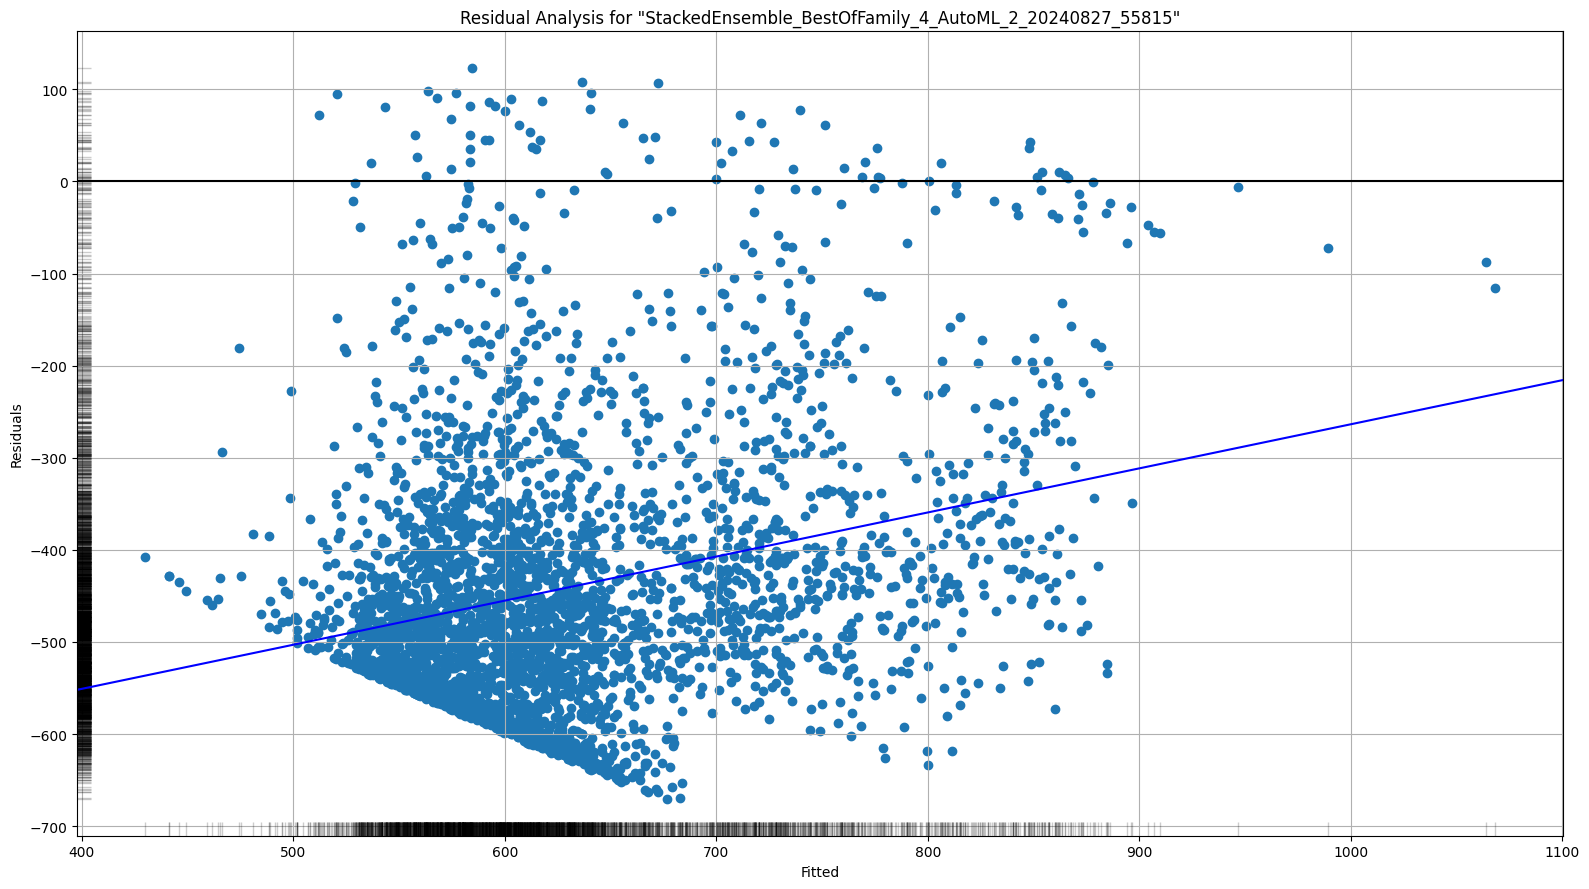

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

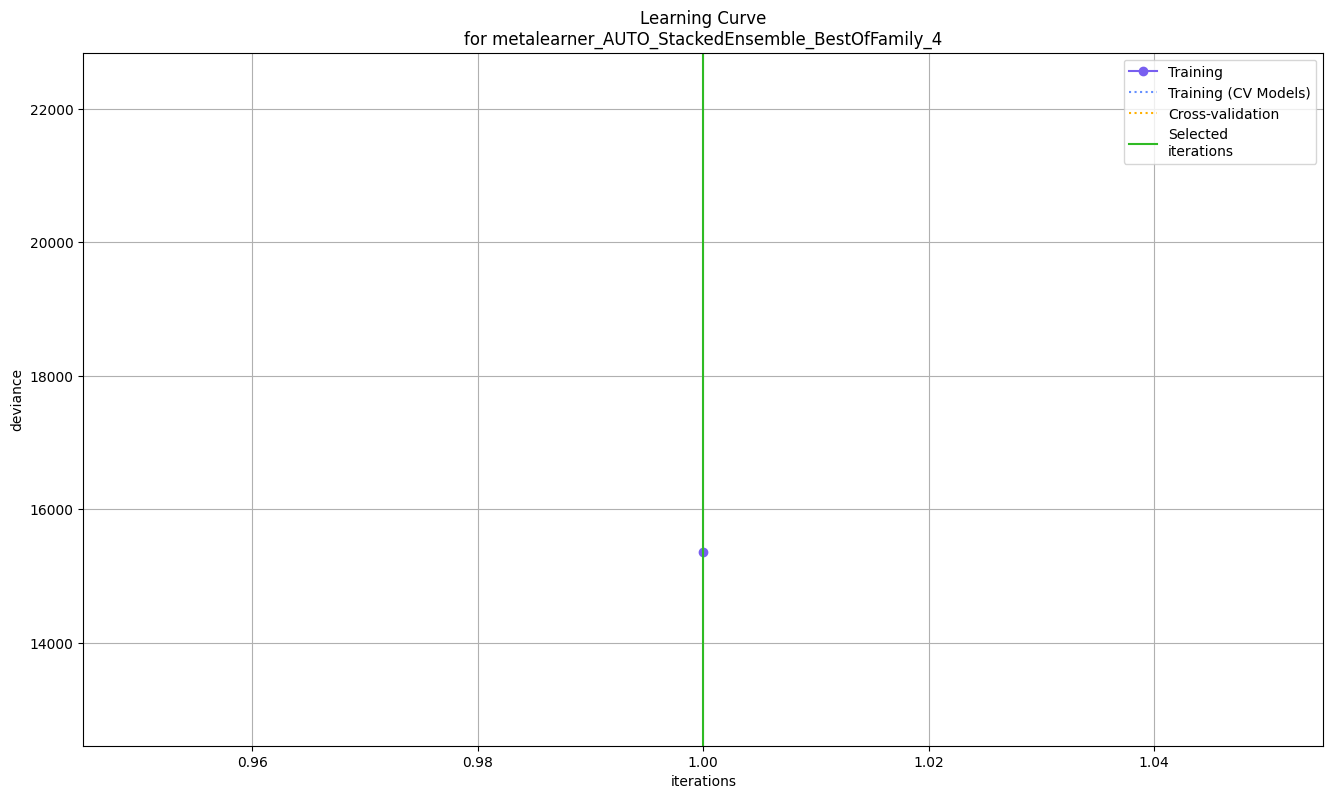

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

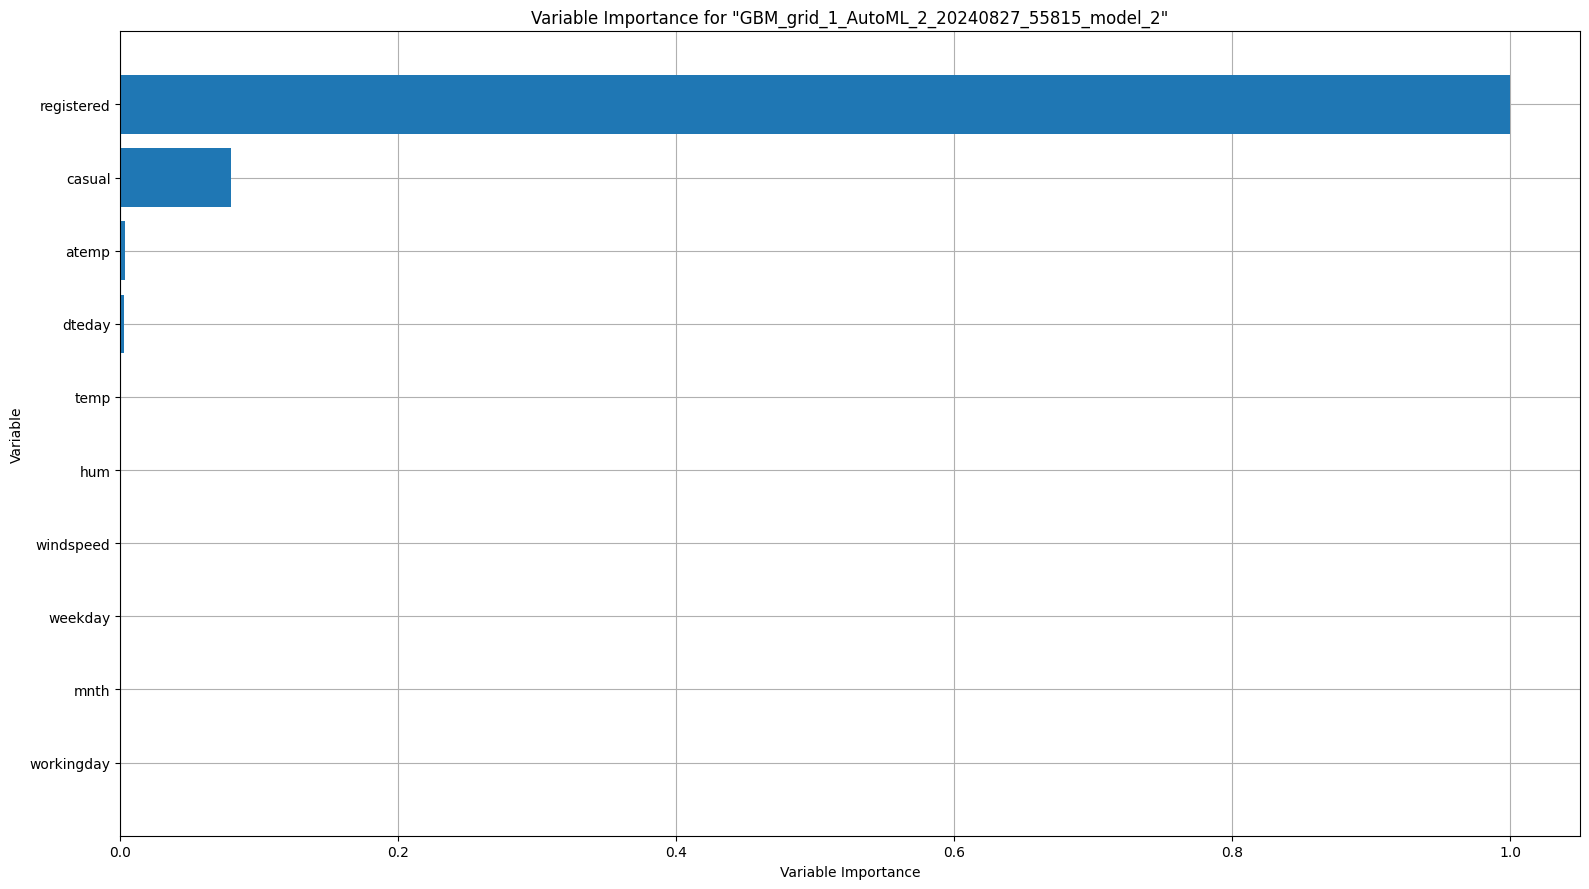

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

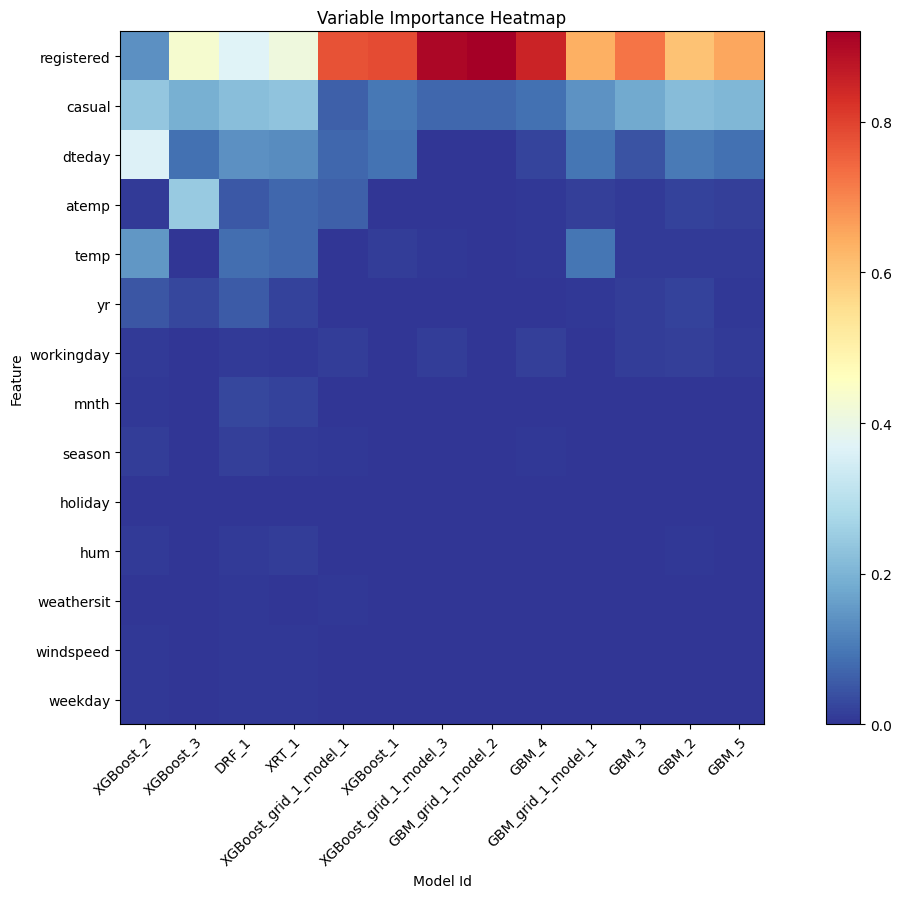

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

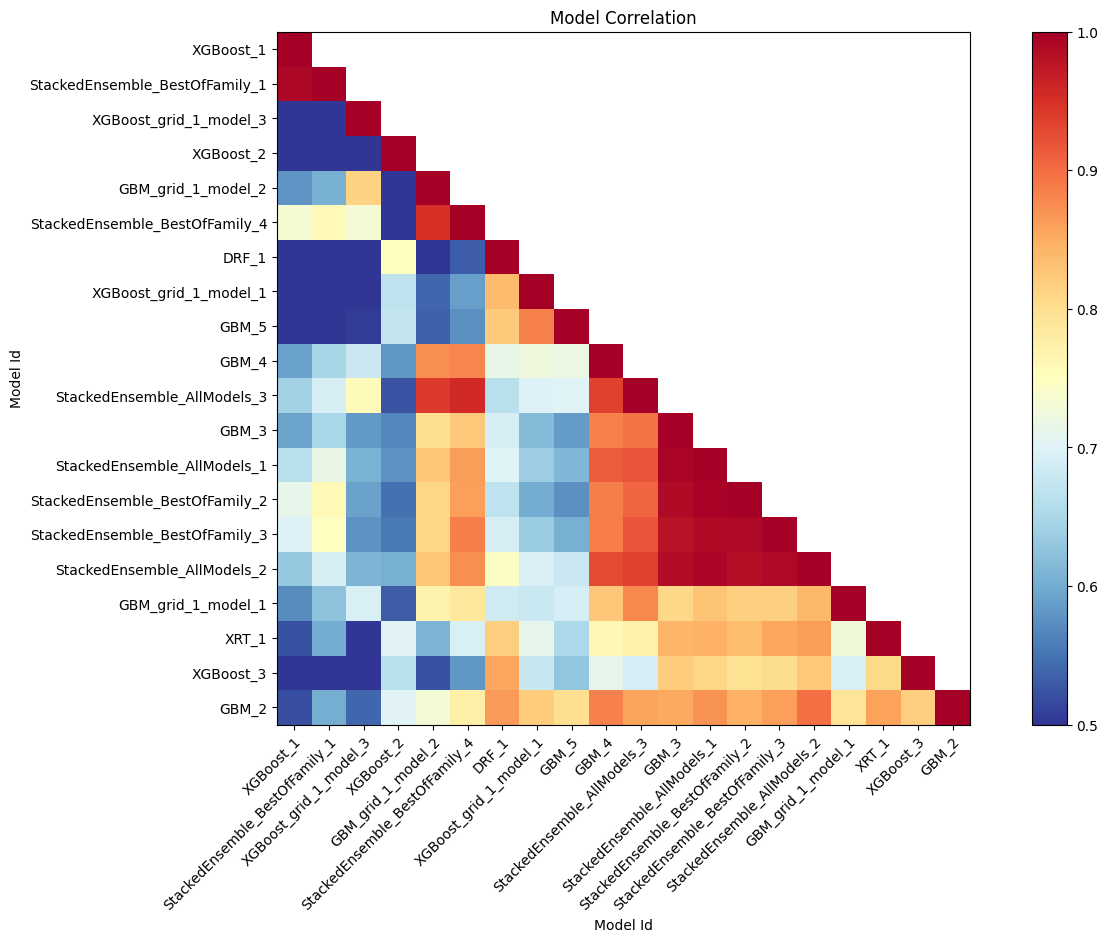

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

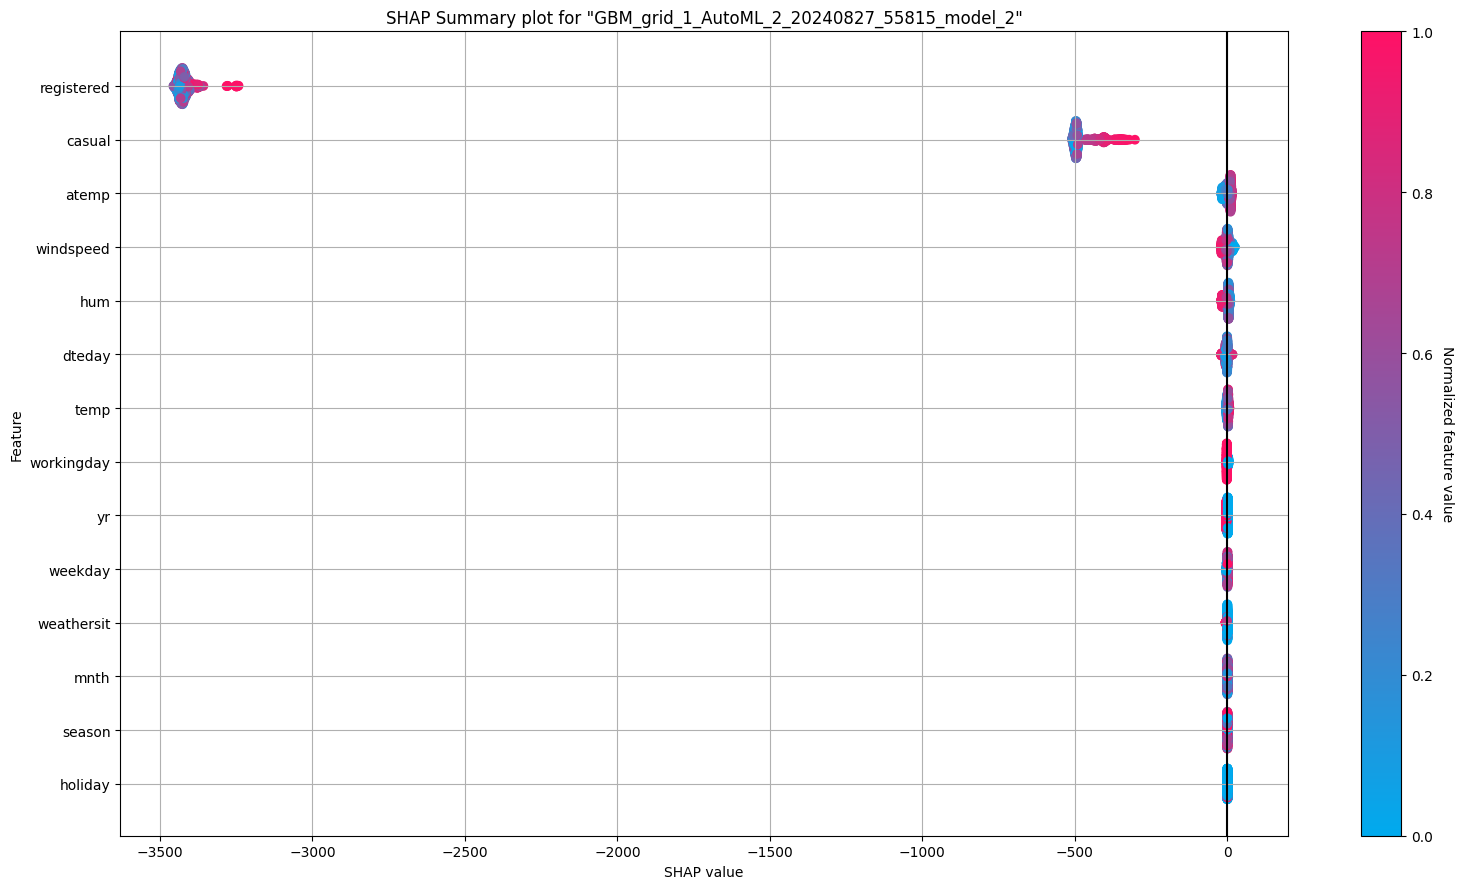

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

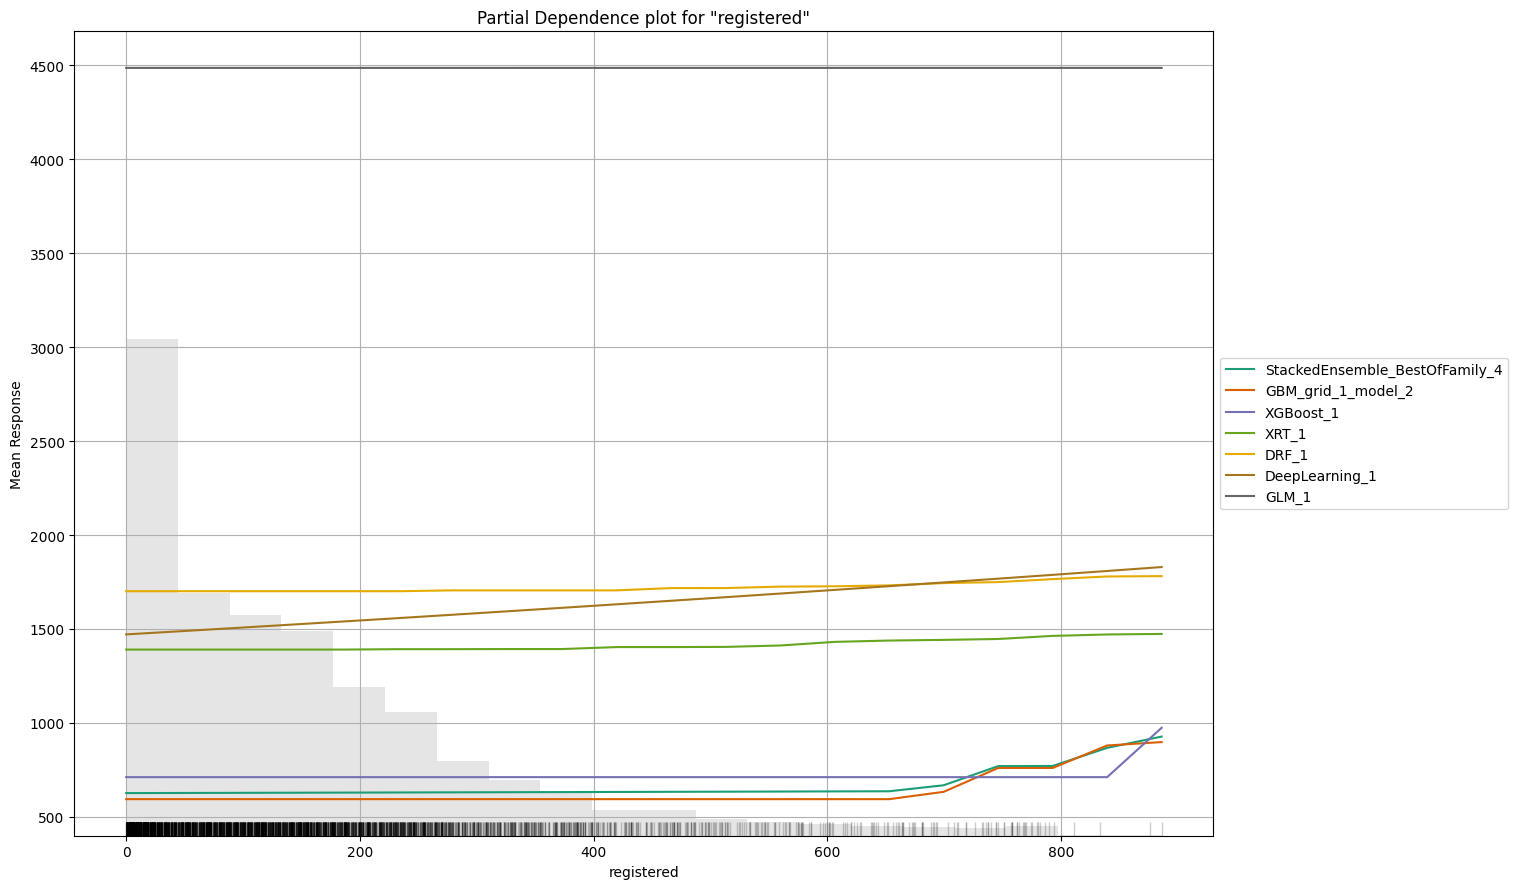

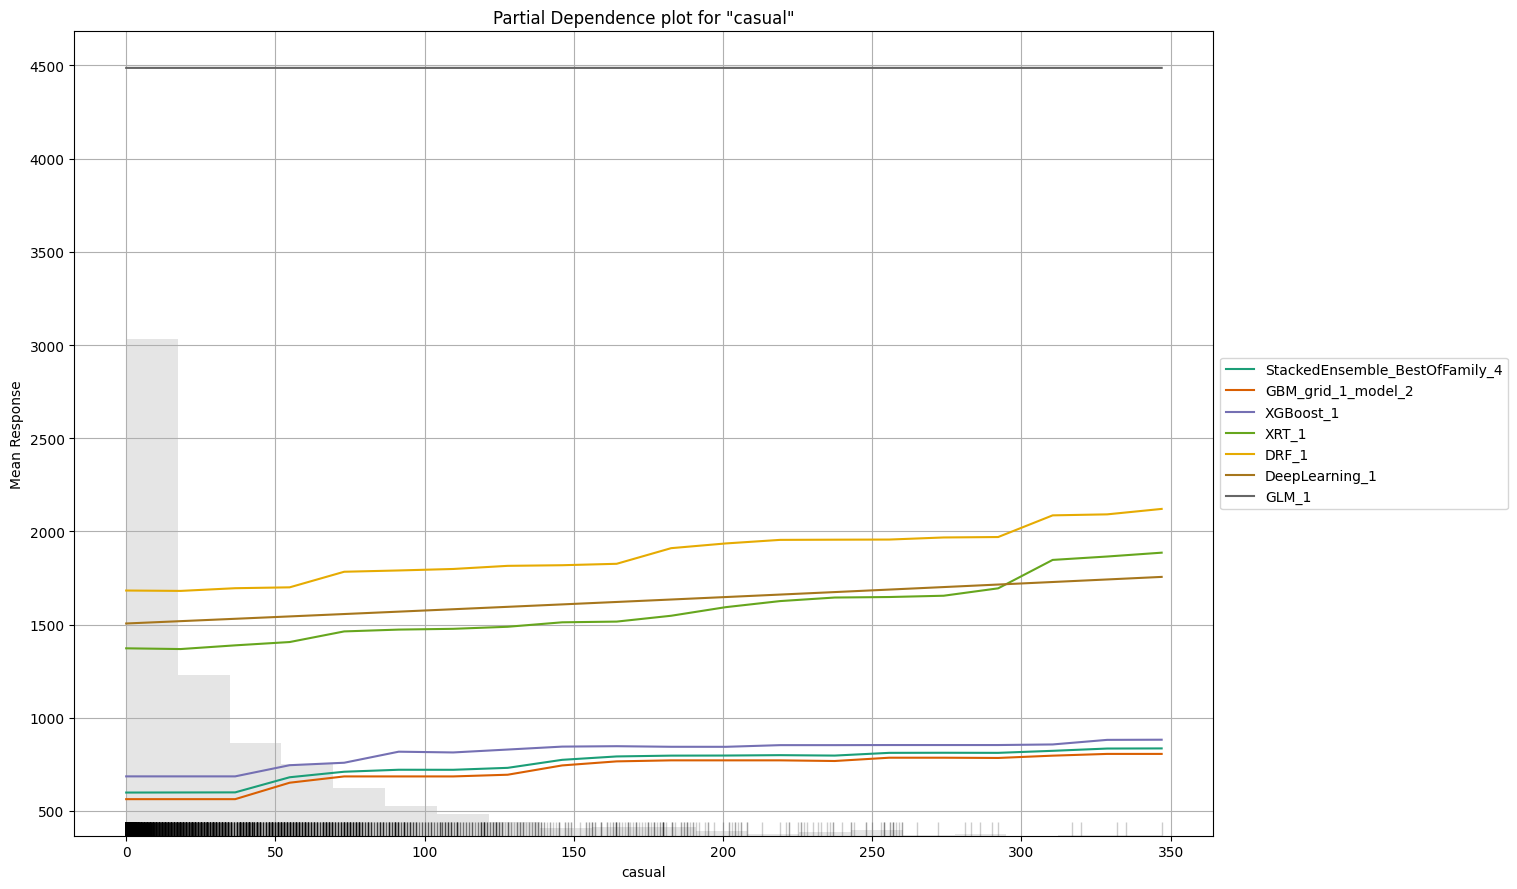

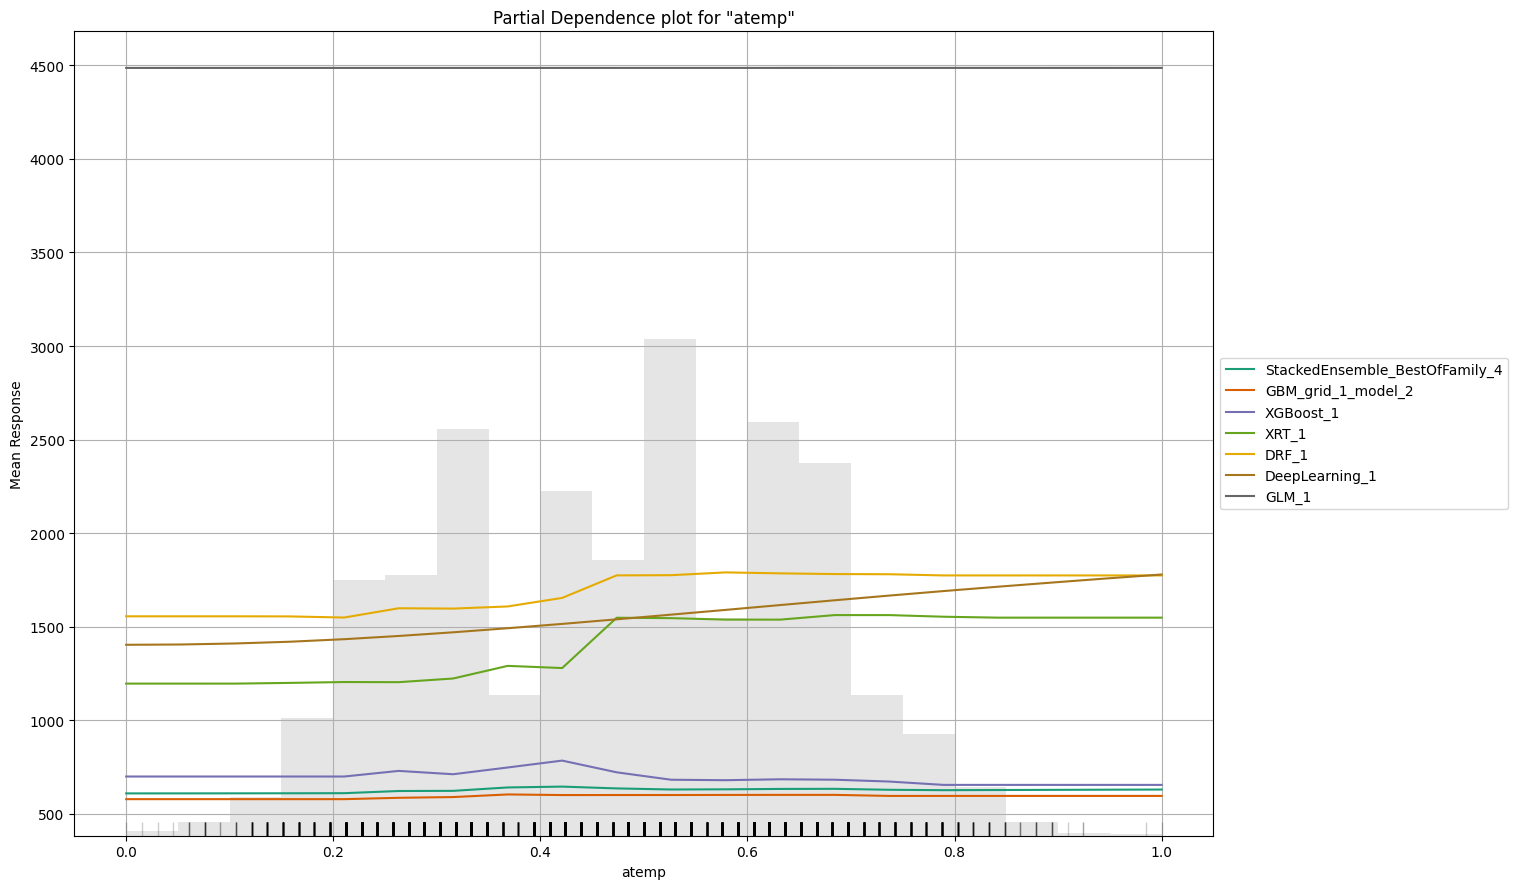

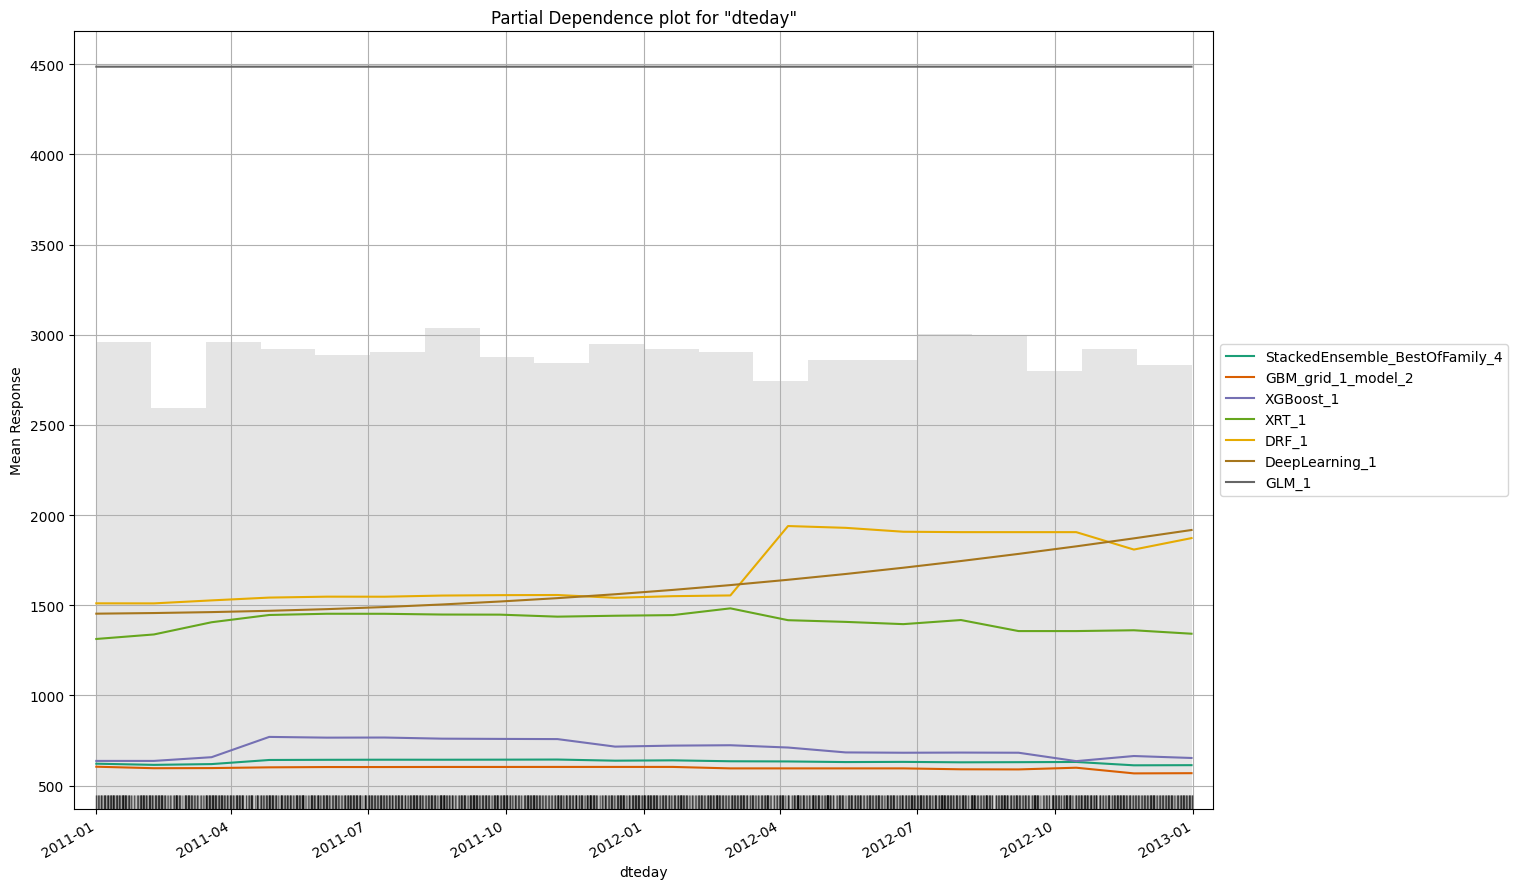

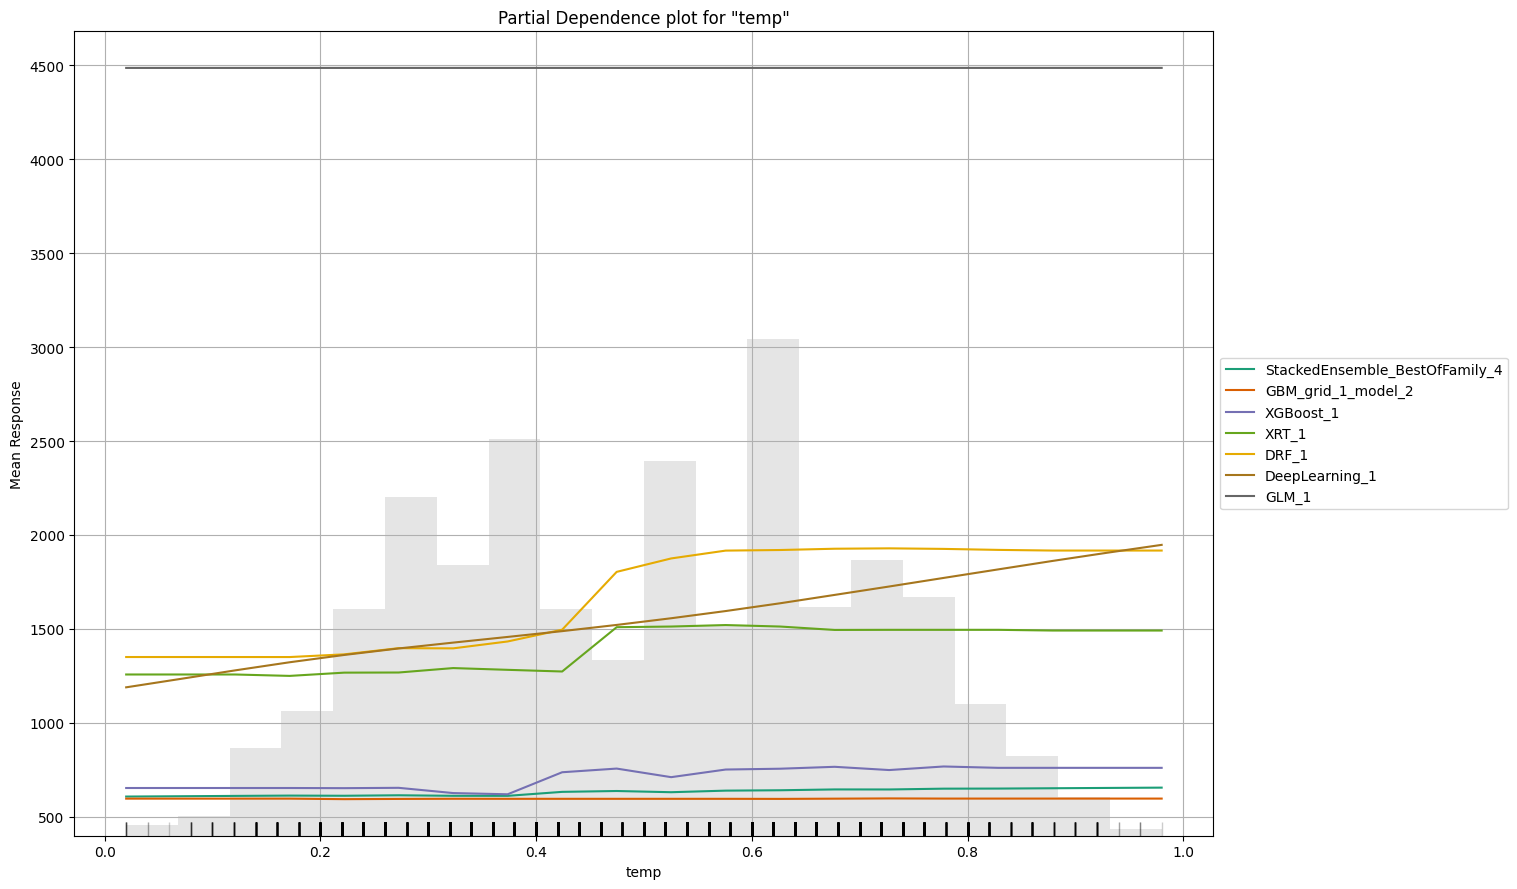

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

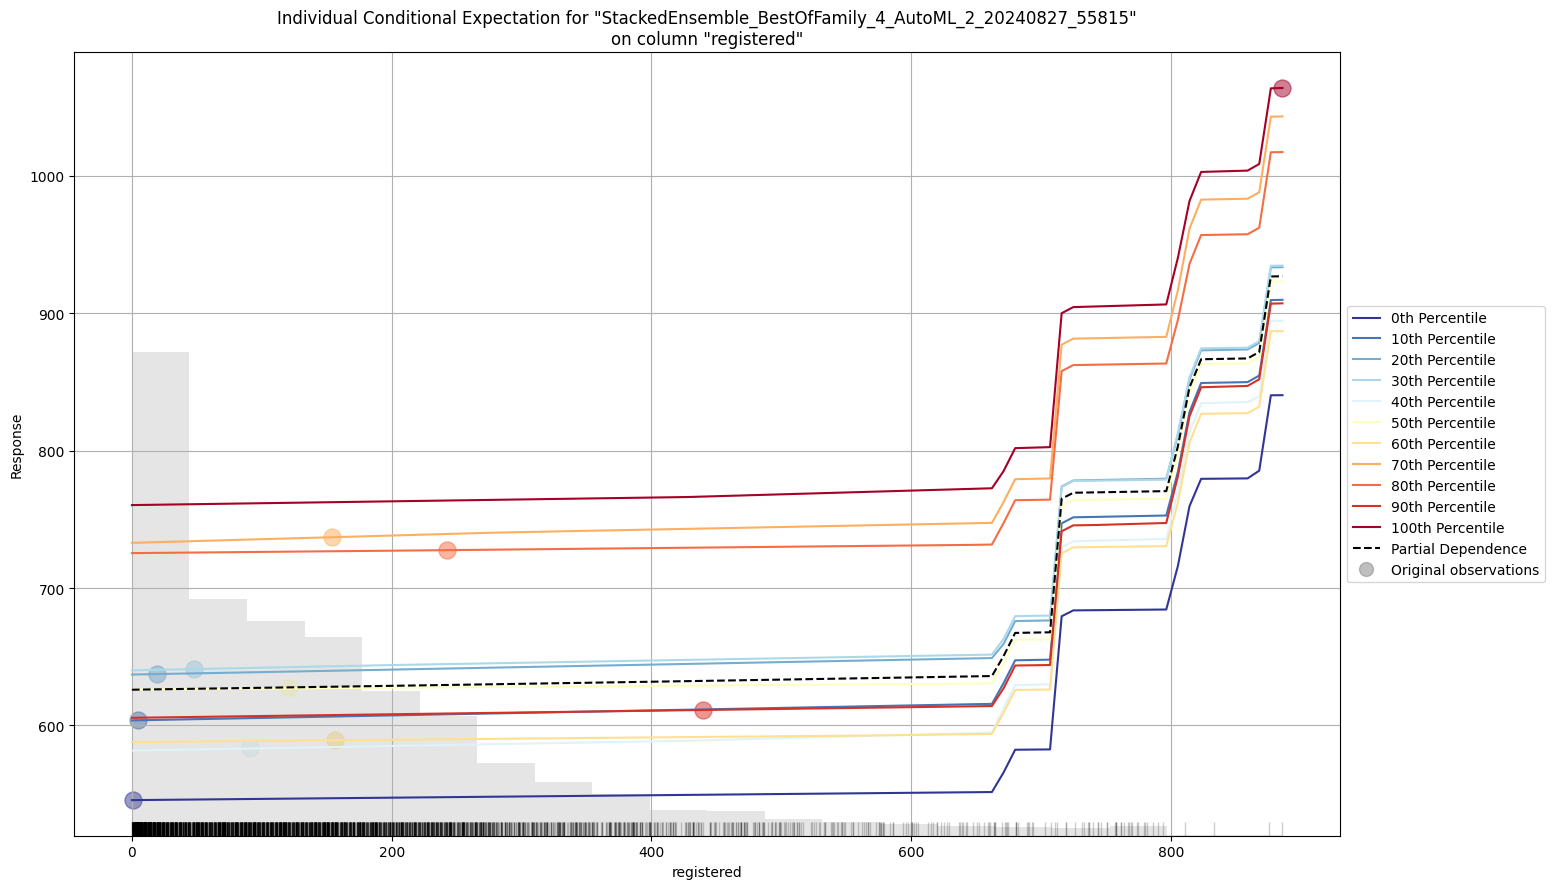

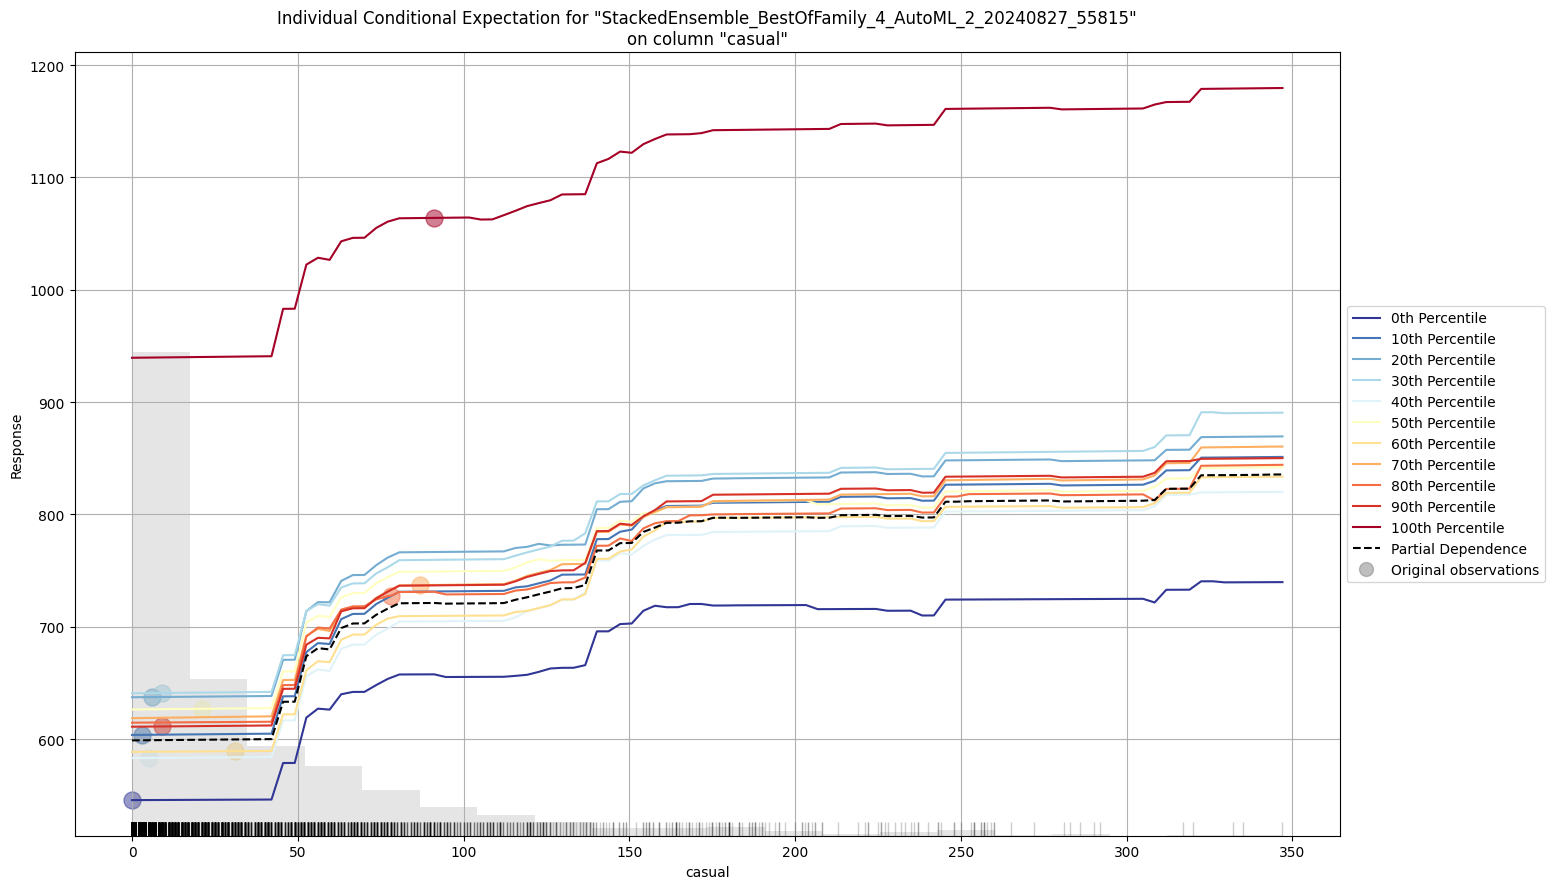

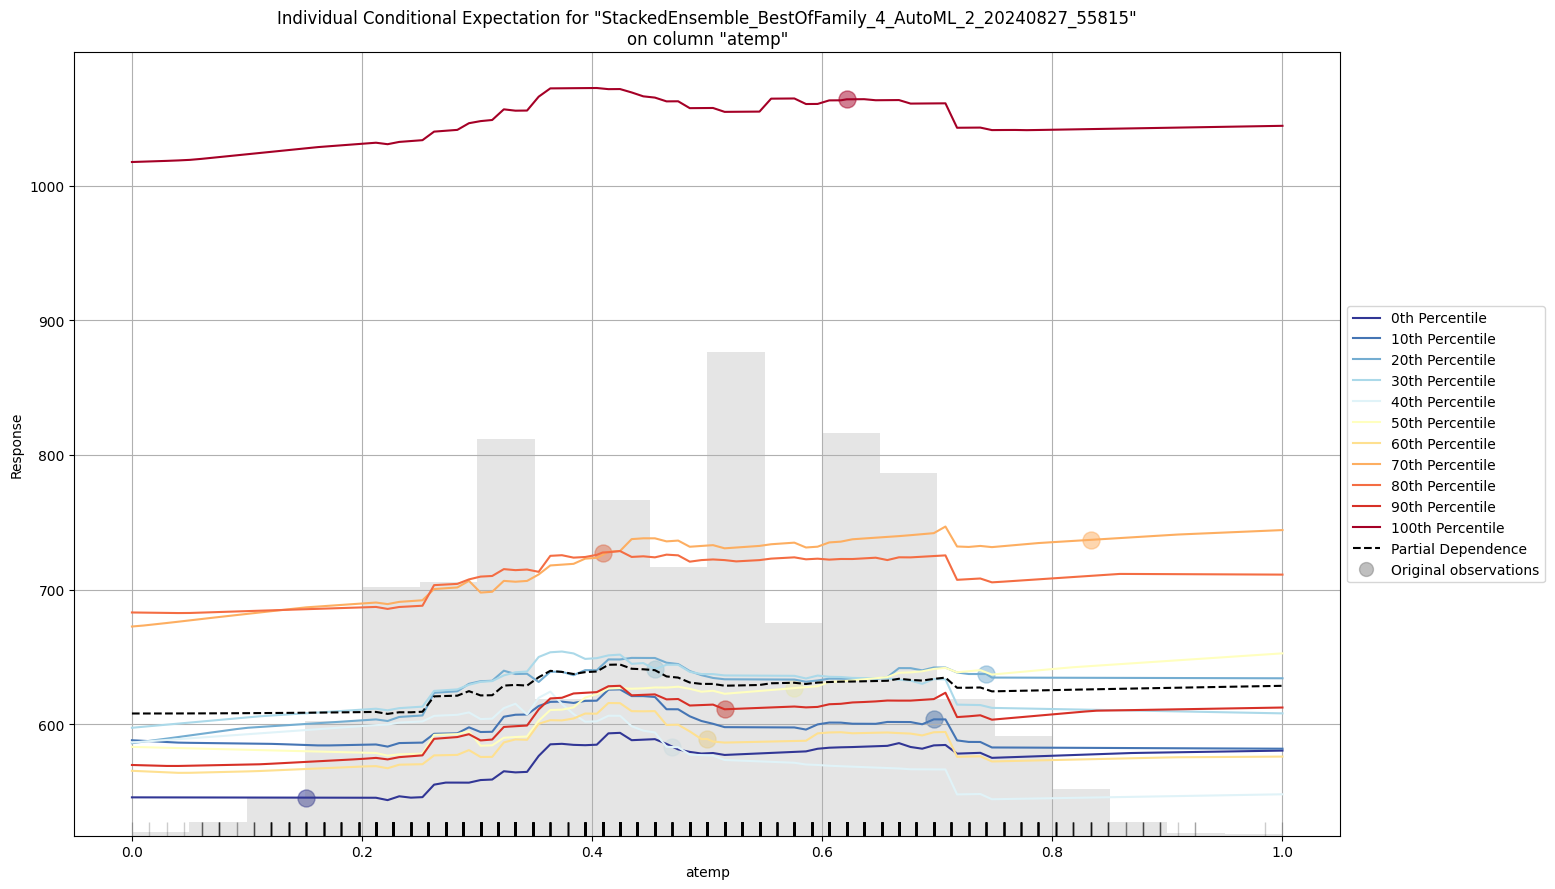

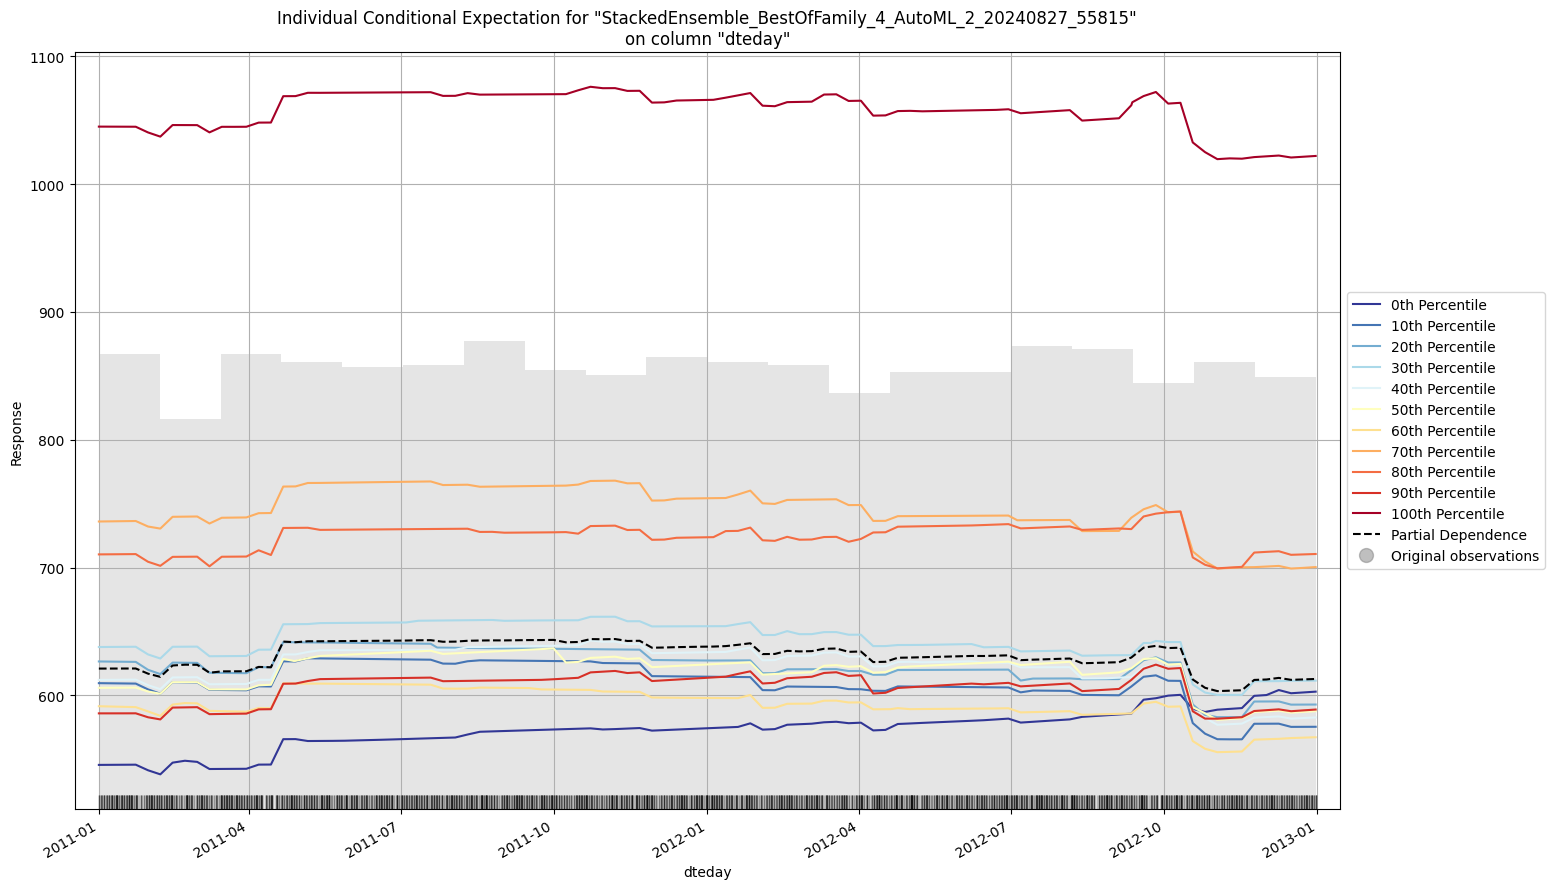

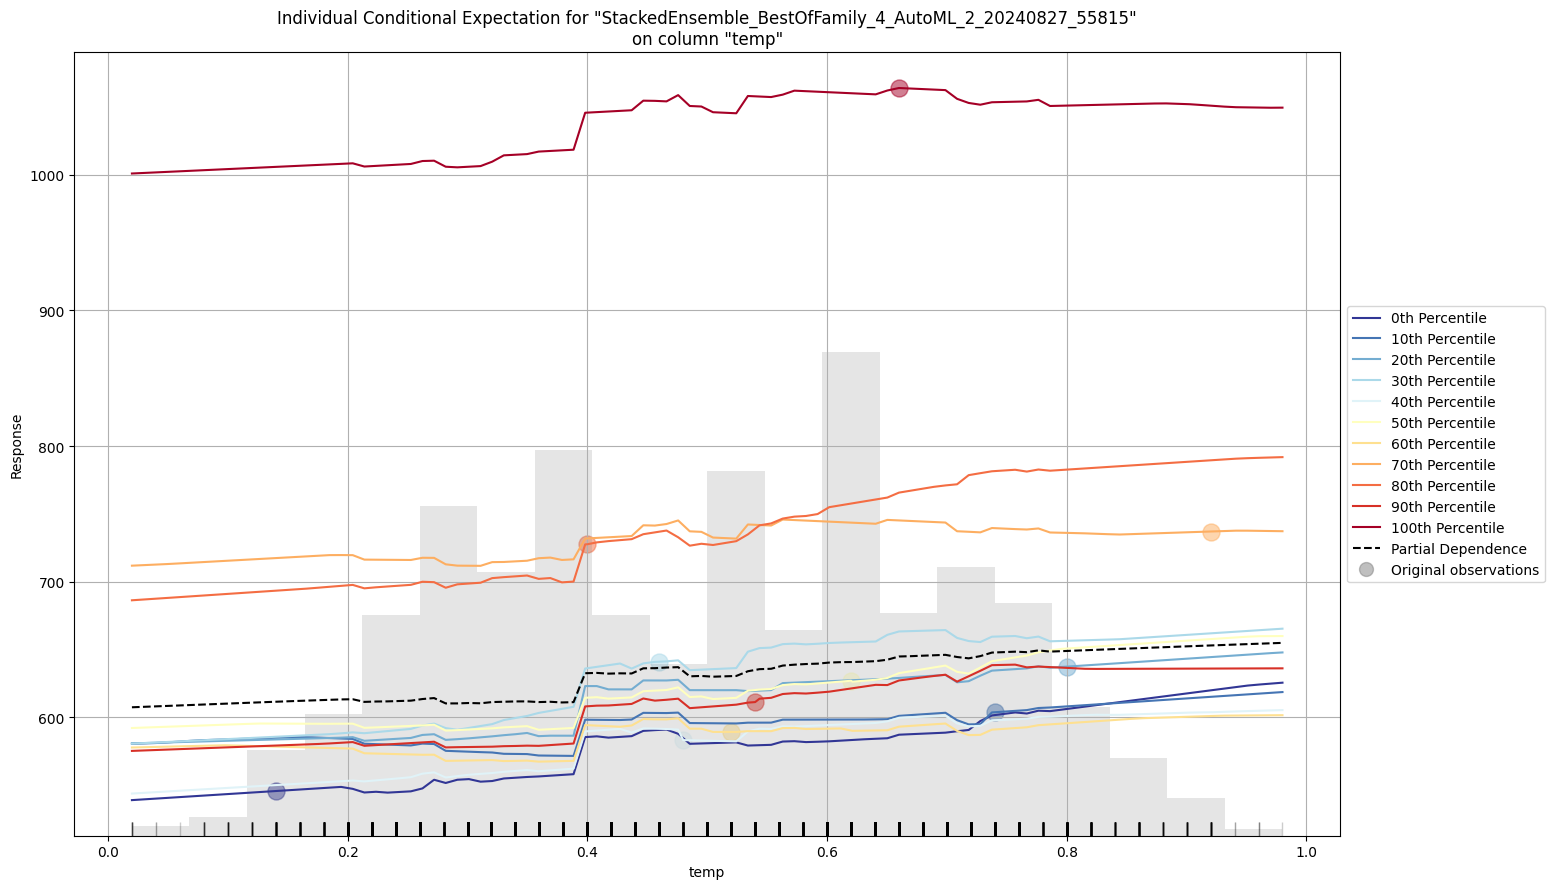

In [33]:
# Explain leader model and compare it with all models
exa = aml.explain(test)

**6. Interpretation on Day dataset**
1. GBM grid model gave good result
2. Registered users are using bike rent more than casual users on daily basis
3. DateDay is having significant effect on bike rental users
4. Windspeed, Humidity are showing slighter impact on bike rental user counts
5. All other features are having no significant effect on bike rental user counts
6. Residual analysis shows all are behaving random with slight linearly downward trend
7. Model parameters should be tuned for better results